<div style="background-color:#2b0000; color:white; padding:25px; border-radius:10px; 
            text-align:center; font-family:'Segoe UI', sans-serif;">

  <h1 style="margin-bottom:8px;"> Cars 4 You 🏎️💨</h1>
  <h3 style="margin-top:0; font-style:italic; font-weight:normal; color:#f05a5a;">
    Auxiliary Notebook – Visualizations
  </h3>

  <hr style="width:60%; border:1px solid #700000; margin:15px auto;">

  <p style="margin:5px 0; font-size:15px;">
    <b>Group 4</b> - Machine Learning Project (2025/2026)
  </p>
  <p style="margin:0; font-size:13px; color:#e3bdbd;">
    Master in Data Science and Advanced Analytics - Nova Information Management School
  </p>
</div>

<br>

<div style="background-color:#3a0808; color:#f4eaea; padding:15px 20px; border-left:5px solid #700000; 
            border-radius:6px; font-family:'Segoe UI', sans-serif; font-size:14px;">

  <b>Notebook Context</b><br>
  Due to the large extent of this subchapter, we will address EDA Visualizations in the notebook.
</div>

<br>

<div style="text-align:center; margin-top:10px;">
  <a href="../main.ipynb" 
     style="display:inline-block; background-color:#700000; color:#fff; 
            padding:8px 16px; text-decoration:none; border-radius:6px; 
            font-family:'Segoe UI', sans-serif; font-size:13px;">
     <- Back to Main Notebook
  </a>
</div>

<br>

<div style="text-align:right; font-size:12px; color:#d8bfbf;">
  Last updated: November 2025
</div>


# 0. Importing the needed Libraries and Datasets

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from math import ceil

sns.set_theme(style="darkgrid")

# for better resolution plots
%config InlineBackend.figure_format = 'retina'

In [2]:
df = pd.read_csv("../data/datatovisualization.csv")
df.head()

carID   Brand     model    year  price transmission  mileage fuelType  \
0  69512      VW      golf  2016.0  22290    Semi-Auto  28421.0   Petrol   
1  53000  Toyota     yaris  2019.0  13790       Manual   4589.0   Petrol   
2   6366    Audi        q2  2019.0  24990    Semi-Auto   3624.0   Petrol   
3  29021    Ford    fiesta  2018.0  12500       Manual   9102.0   Petrol   
4  10062     BMW  2 series  2019.0  22995       Manual   1000.0   Petrol   

     tax        mpg  engineSize  paintQuality%  previousOwners  hasDamage  
0    NaN  11.417268         2.0           63.0        4.000000        0.0  
1  145.0  47.900000         1.5           50.0        1.000000        0.0  
2  145.0  40.900000         1.5           56.0        4.000000        0.0  
3  145.0  65.700000         1.0           50.0       -2.340306        0.0  
4  145.0  42.800000         1.5           97.0        3.000000        0.0

# 1. Numeric Data Visualization

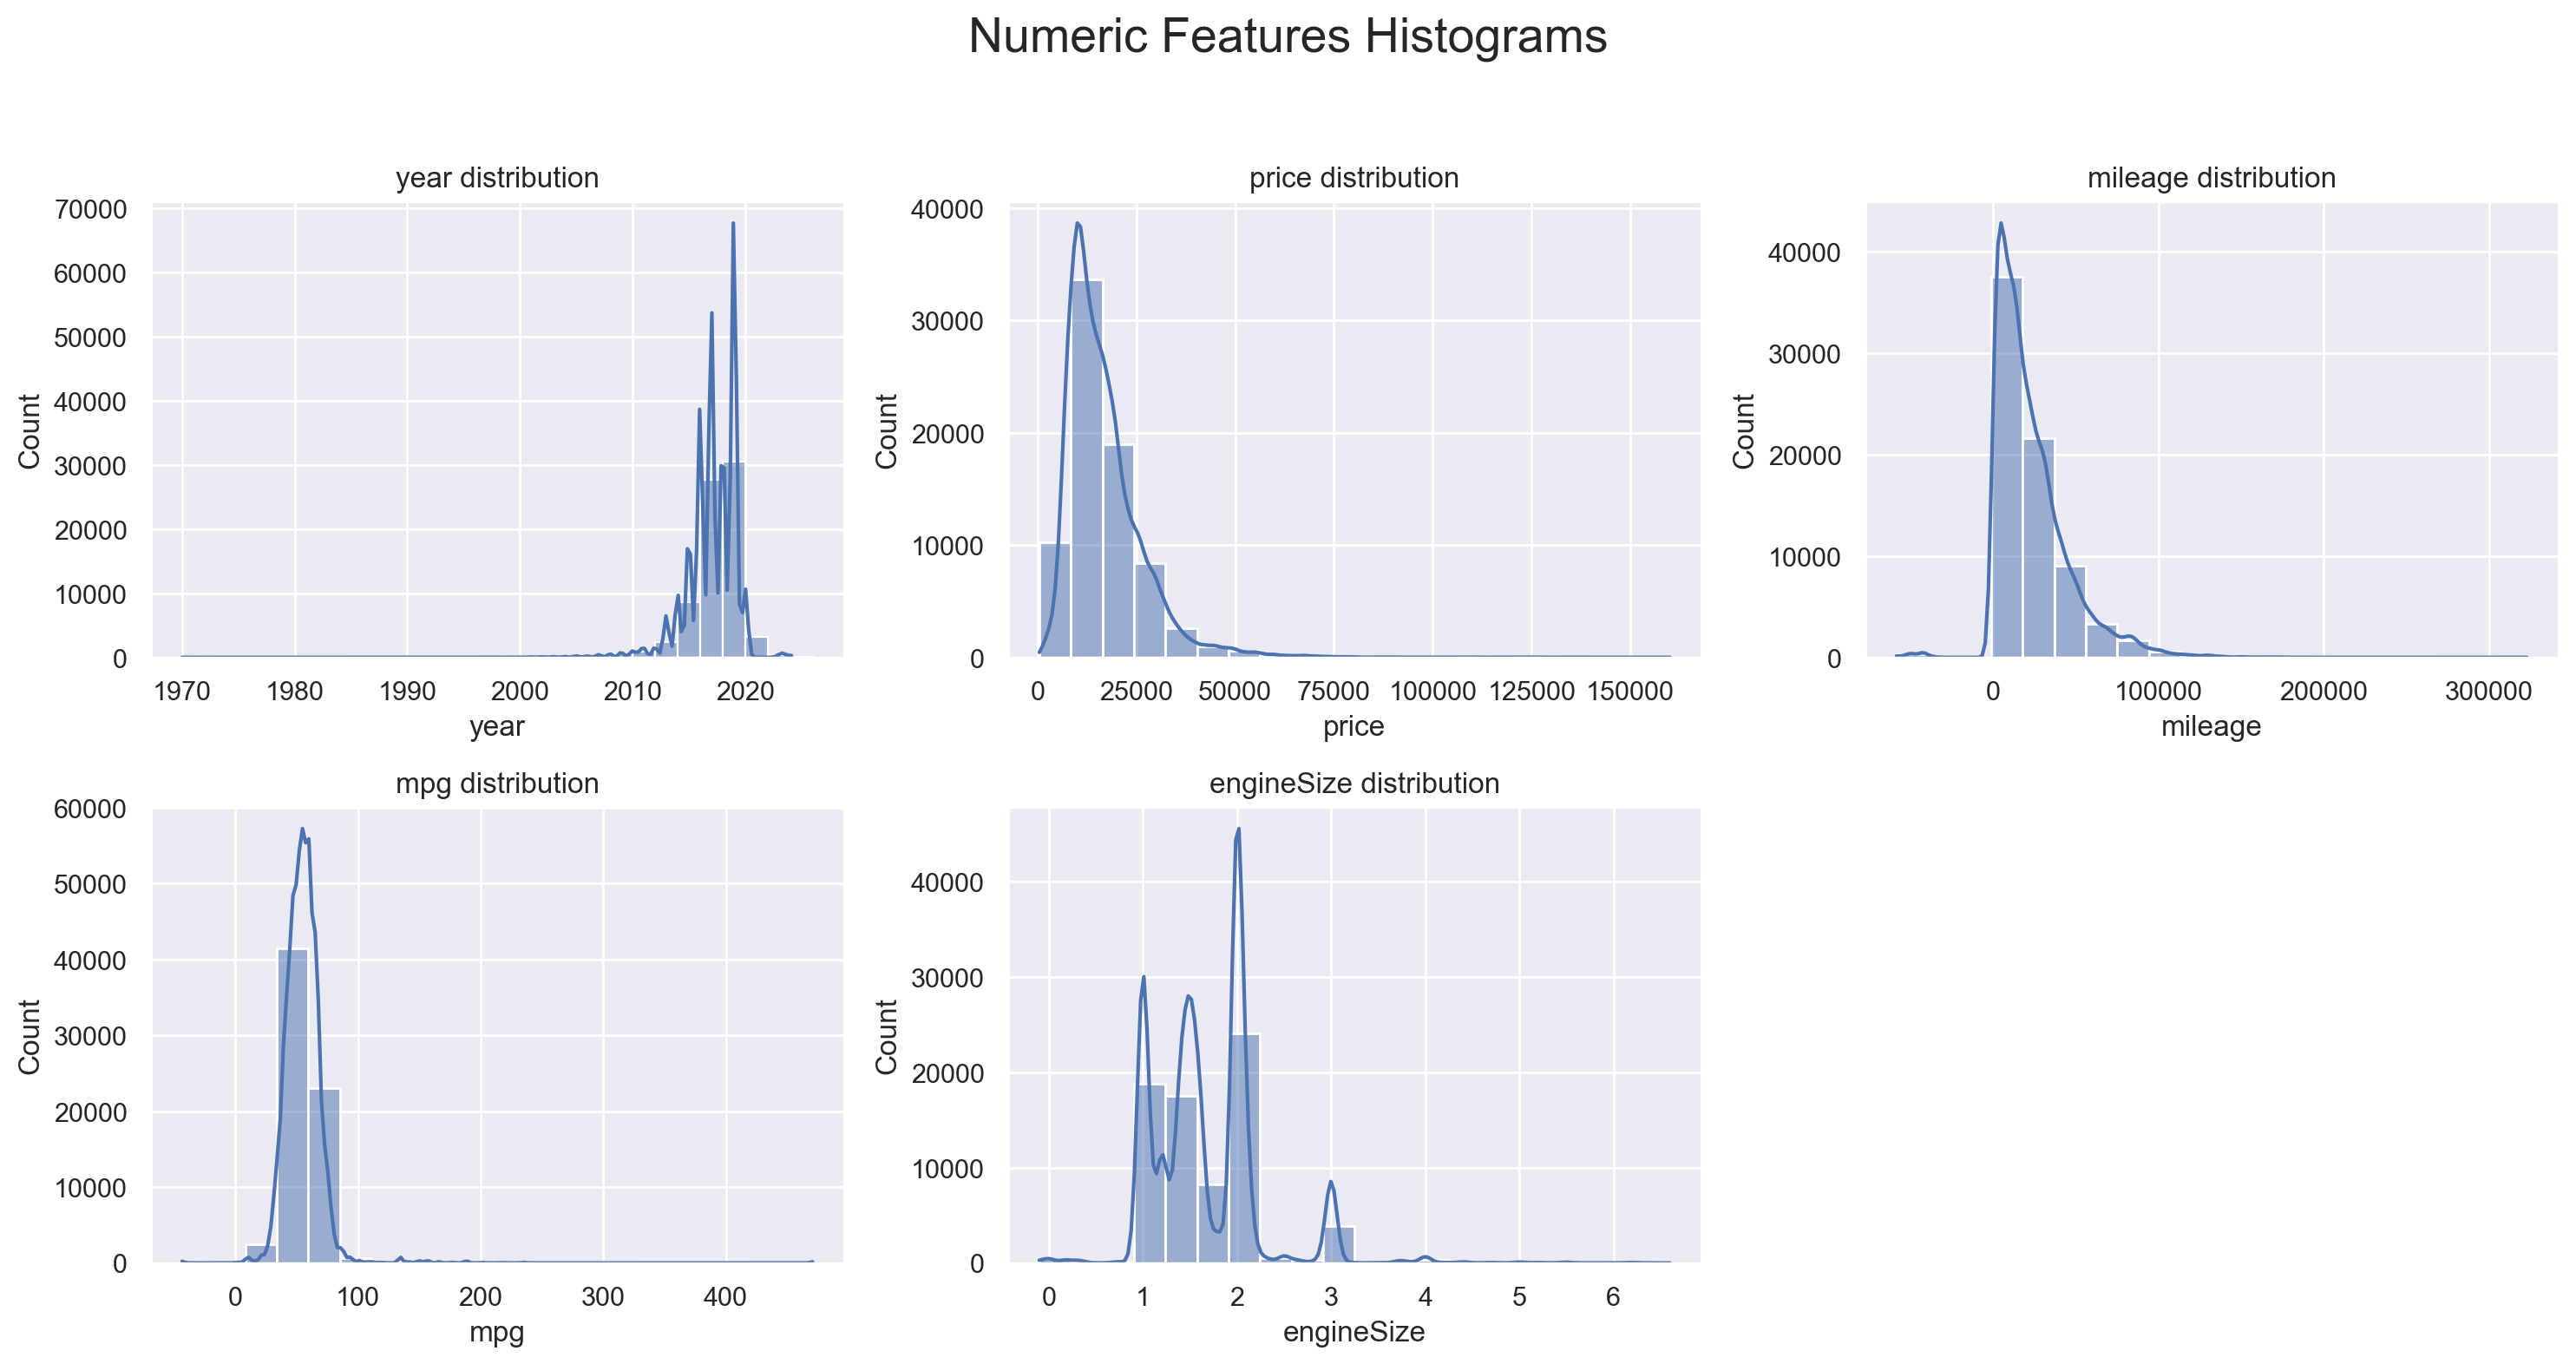

In [3]:
features_bins = {
    "year": np.arange(df["year"].min(), df["year"].max() + 2, 2),  # 2-year bins
    "price": 20,
    "mileage": 20,
    "mpg": 20,
    "engineSize": 20,
}

n_features = len(features_bins)
sp_cols = 3
sp_rows = 2  

fig, axes = plt.subplots(sp_rows, sp_cols, figsize=(15, 8))
axes = axes.flatten()

# Plot histograms
for ax, (feat, bins) in zip(axes, features_bins.items()):
    sns.histplot(data=df, x=feat, bins=bins, kde=True, ax=ax)
    ax.set_title(f"{feat} distribution")

for ax in axes[n_features:]:
    ax.set_visible(False)

plt.suptitle("Numeric Features Histograms", fontsize=20)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


- The **year distribution** shows that most vehicles were registered between **2010 and 2022**, with a sharp peak around **2018–2021**. This indicates that the dataset mainly consists of **modern cars**, while **older vehicles are underrepresented**, which could reduce the model’s generalization for **older cars**.

- The **price distribution** is **right-skewed**, with the majority of cars priced below **£30,000** and a long tail of **higher-value vehicles**. This skewness suggests the need for potential **log transformation** of the target variable to **stabilize variance** and **improve model performance**.

- The **mileage distribution** is also **right-skewed**, with most cars having less than **100,000 miles**, while a few exceed **200,000 miles**. This aligns with expectations: **newer cars dominate** the dataset and thus typically have **lower mileage**.

- The **mpg (miles per gallon) distribution** likely reflects different **fuel types** (e.g., **petrol vs. diesel or hybrid**). This indicates that **fuel efficiency** may play a key role in **differentiating vehicle segments**.

- The **engine size distribution** displays several peaks, with dominant clusters around **1.0L**, **1.5L**, and **2.0L**, suggesting a prevalence of **small to mid-sized engines**. Cars with very large engines (**>3.0L**) are rare, potentially making **predictions for those cases less stable**.

As the features show strong positive skewness (a long tail to the right) and highly dispersed values, we will apply the log transformation, so it is easier to analyse the distributions

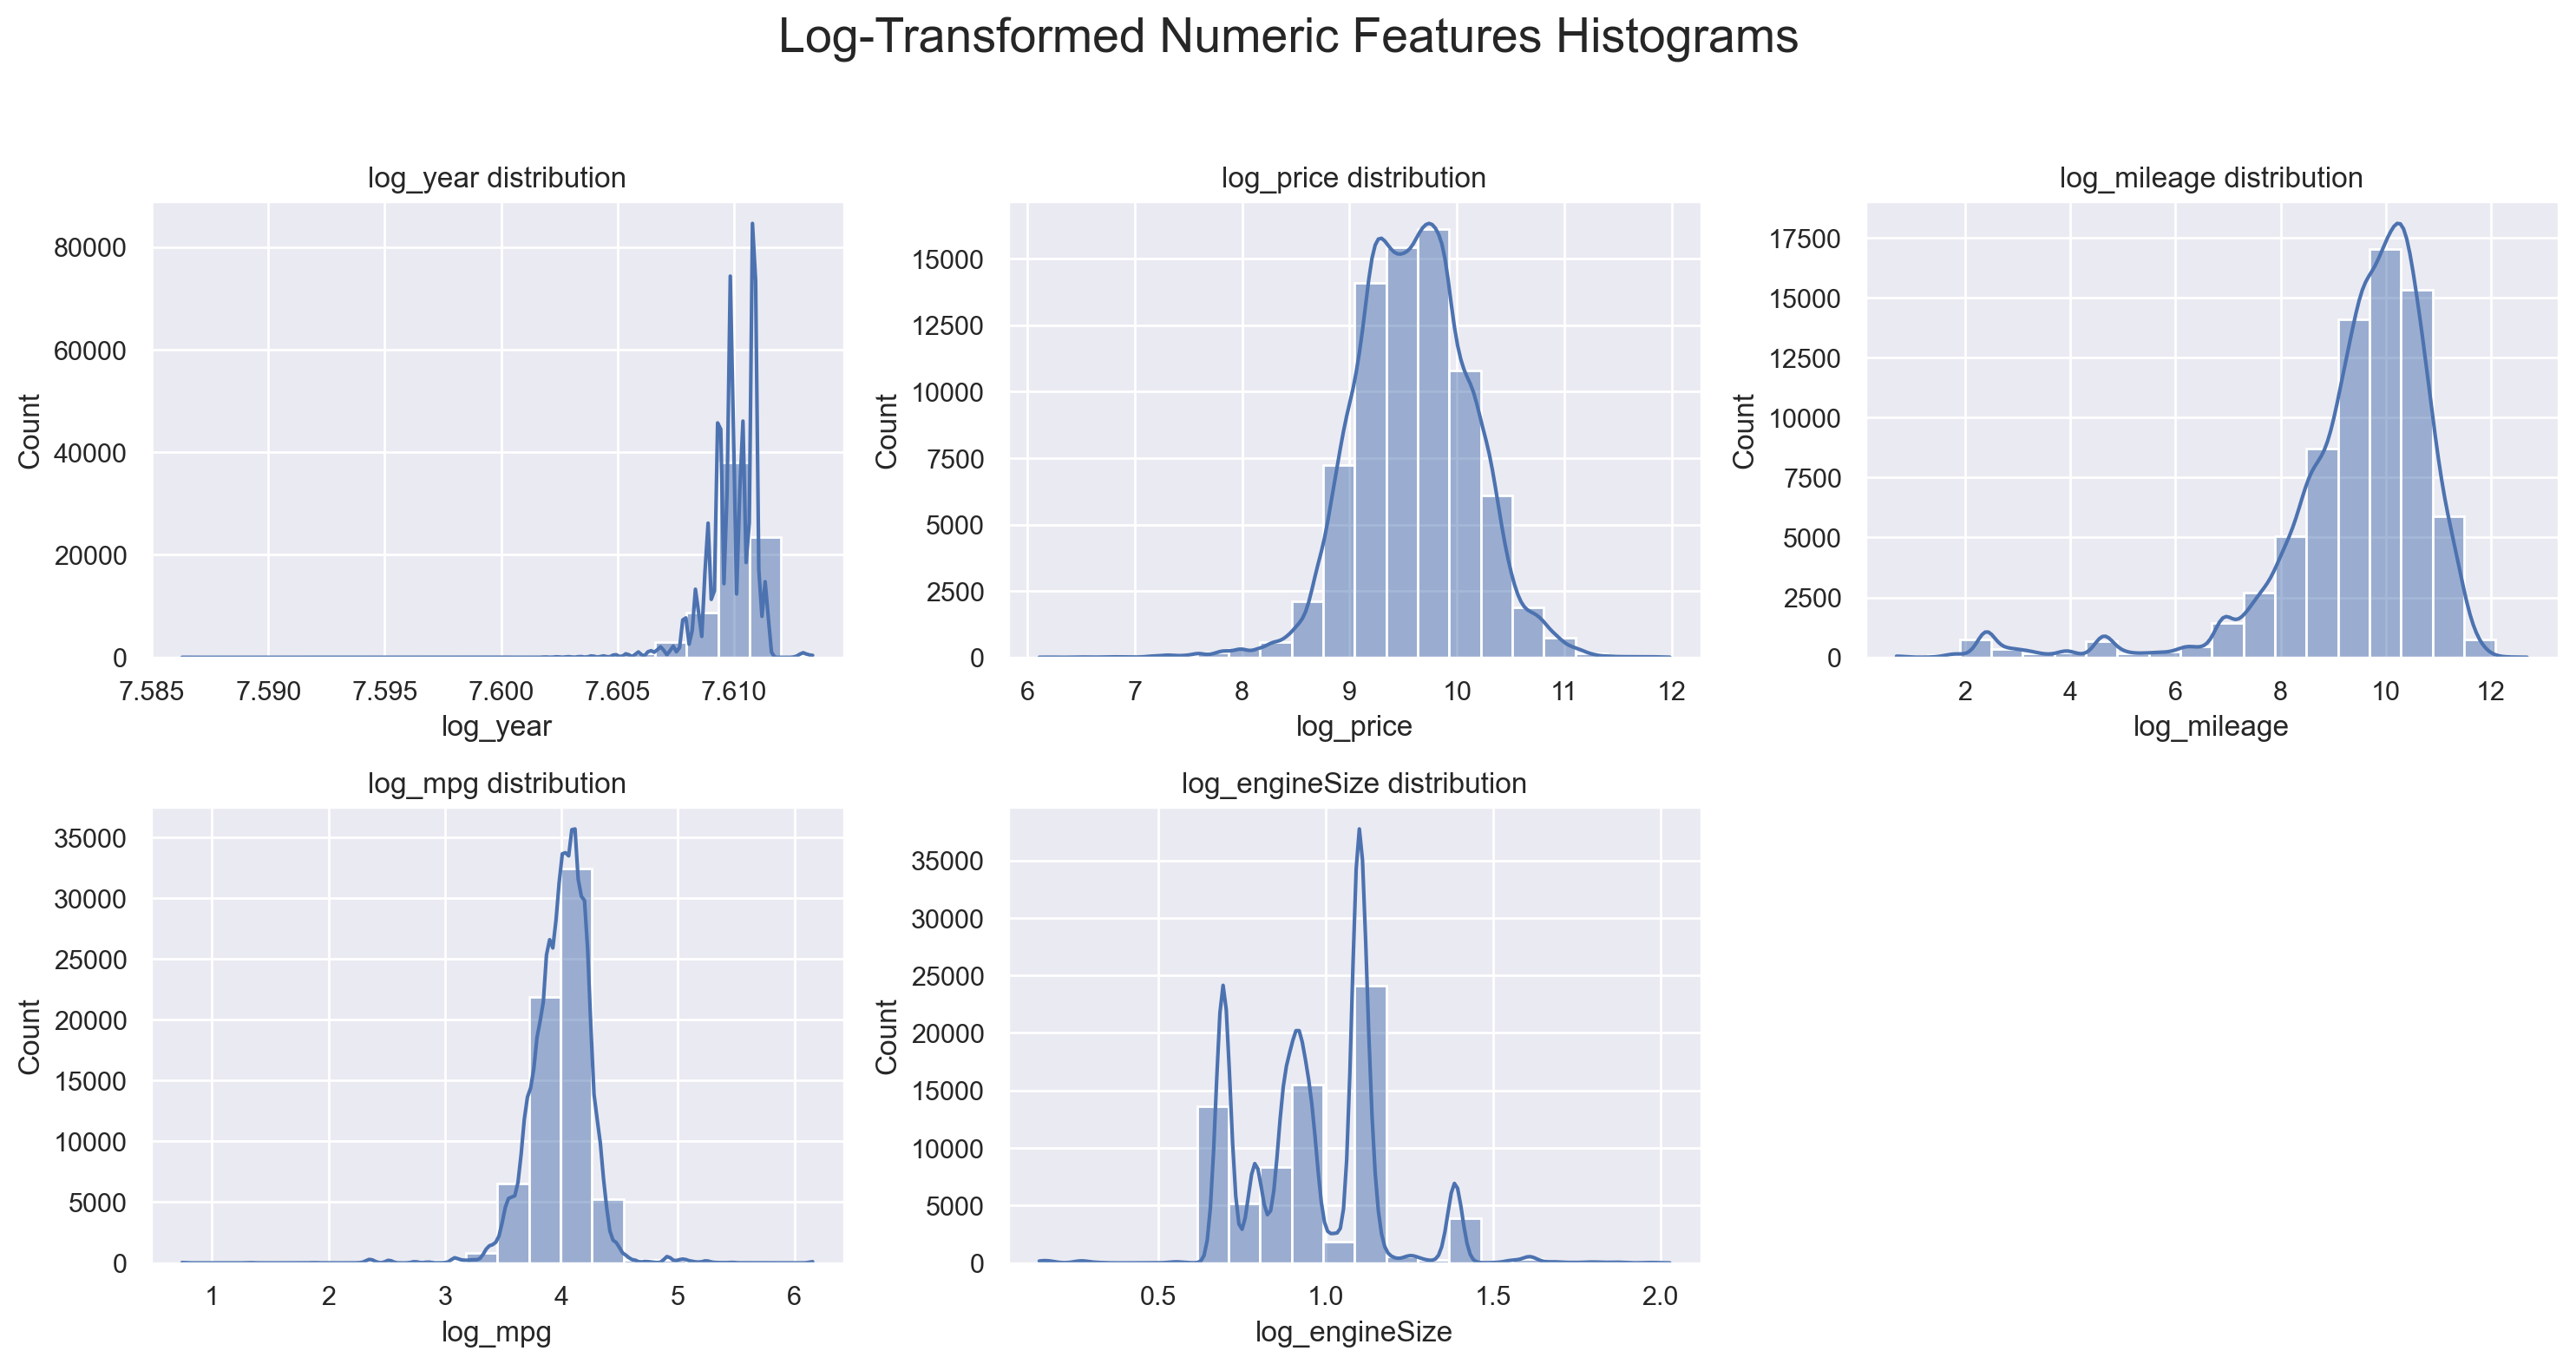

In [4]:
log_features = ["year", "price", "mileage", "mpg", "engineSize"]

df_log = df.copy()
for feat in log_features:
    df_log.loc[df_log[feat] <= 0, feat] = np.nan  # avoid invalid logs
    df_log[f"log_{feat}"] = np.log1p(df_log[feat])

log_features_bins = {
    "log_year": 20,
    "log_price": 20,
    "log_mileage": 20,
    "log_mpg": 20,
    "log_engineSize": 20,
}

n_features = len(log_features_bins)
sp_cols = 3
sp_rows = int(np.ceil(n_features / sp_cols))

fig, axes = plt.subplots(sp_rows, sp_cols, figsize=(15, 8))
axes = axes.flatten()

for ax, (feat, bins) in zip(axes, log_features_bins.items()):
    sns.histplot(data=df_log, x=feat, bins=bins, kde=True, ax=ax)
    ax.set_title(f"{feat} distribution")

for k in range(len(log_features_bins), len(axes)):
    axes[k].axis("off")

plt.suptitle("Log-Transformed Numeric Features Histograms", fontsize=20)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


- The **log_year** distribution shows a concentrated and nearly symmetric shape, as expected, since car registrations are naturally limited to recent years. This confirms that year information is already stable and does not require further normalization.

- The log transformation clearly improved the **price** distribution, making it more symmetric and bell-shaped.

- The **mileage** distribution also became more balanced, reducing the dominance of extreme high-mileage values.

- The **mpg** feature now shows a tighter central concentration, with fewer extreme values affecting the distribution.

- The **engine** size distribution kept its multimodal pattern but is now more compressed, which benefits models sensitive to feature scale.

Overall, the logarithmic scaling **reduced skewness** and made the variables more suitable for linear regression models.

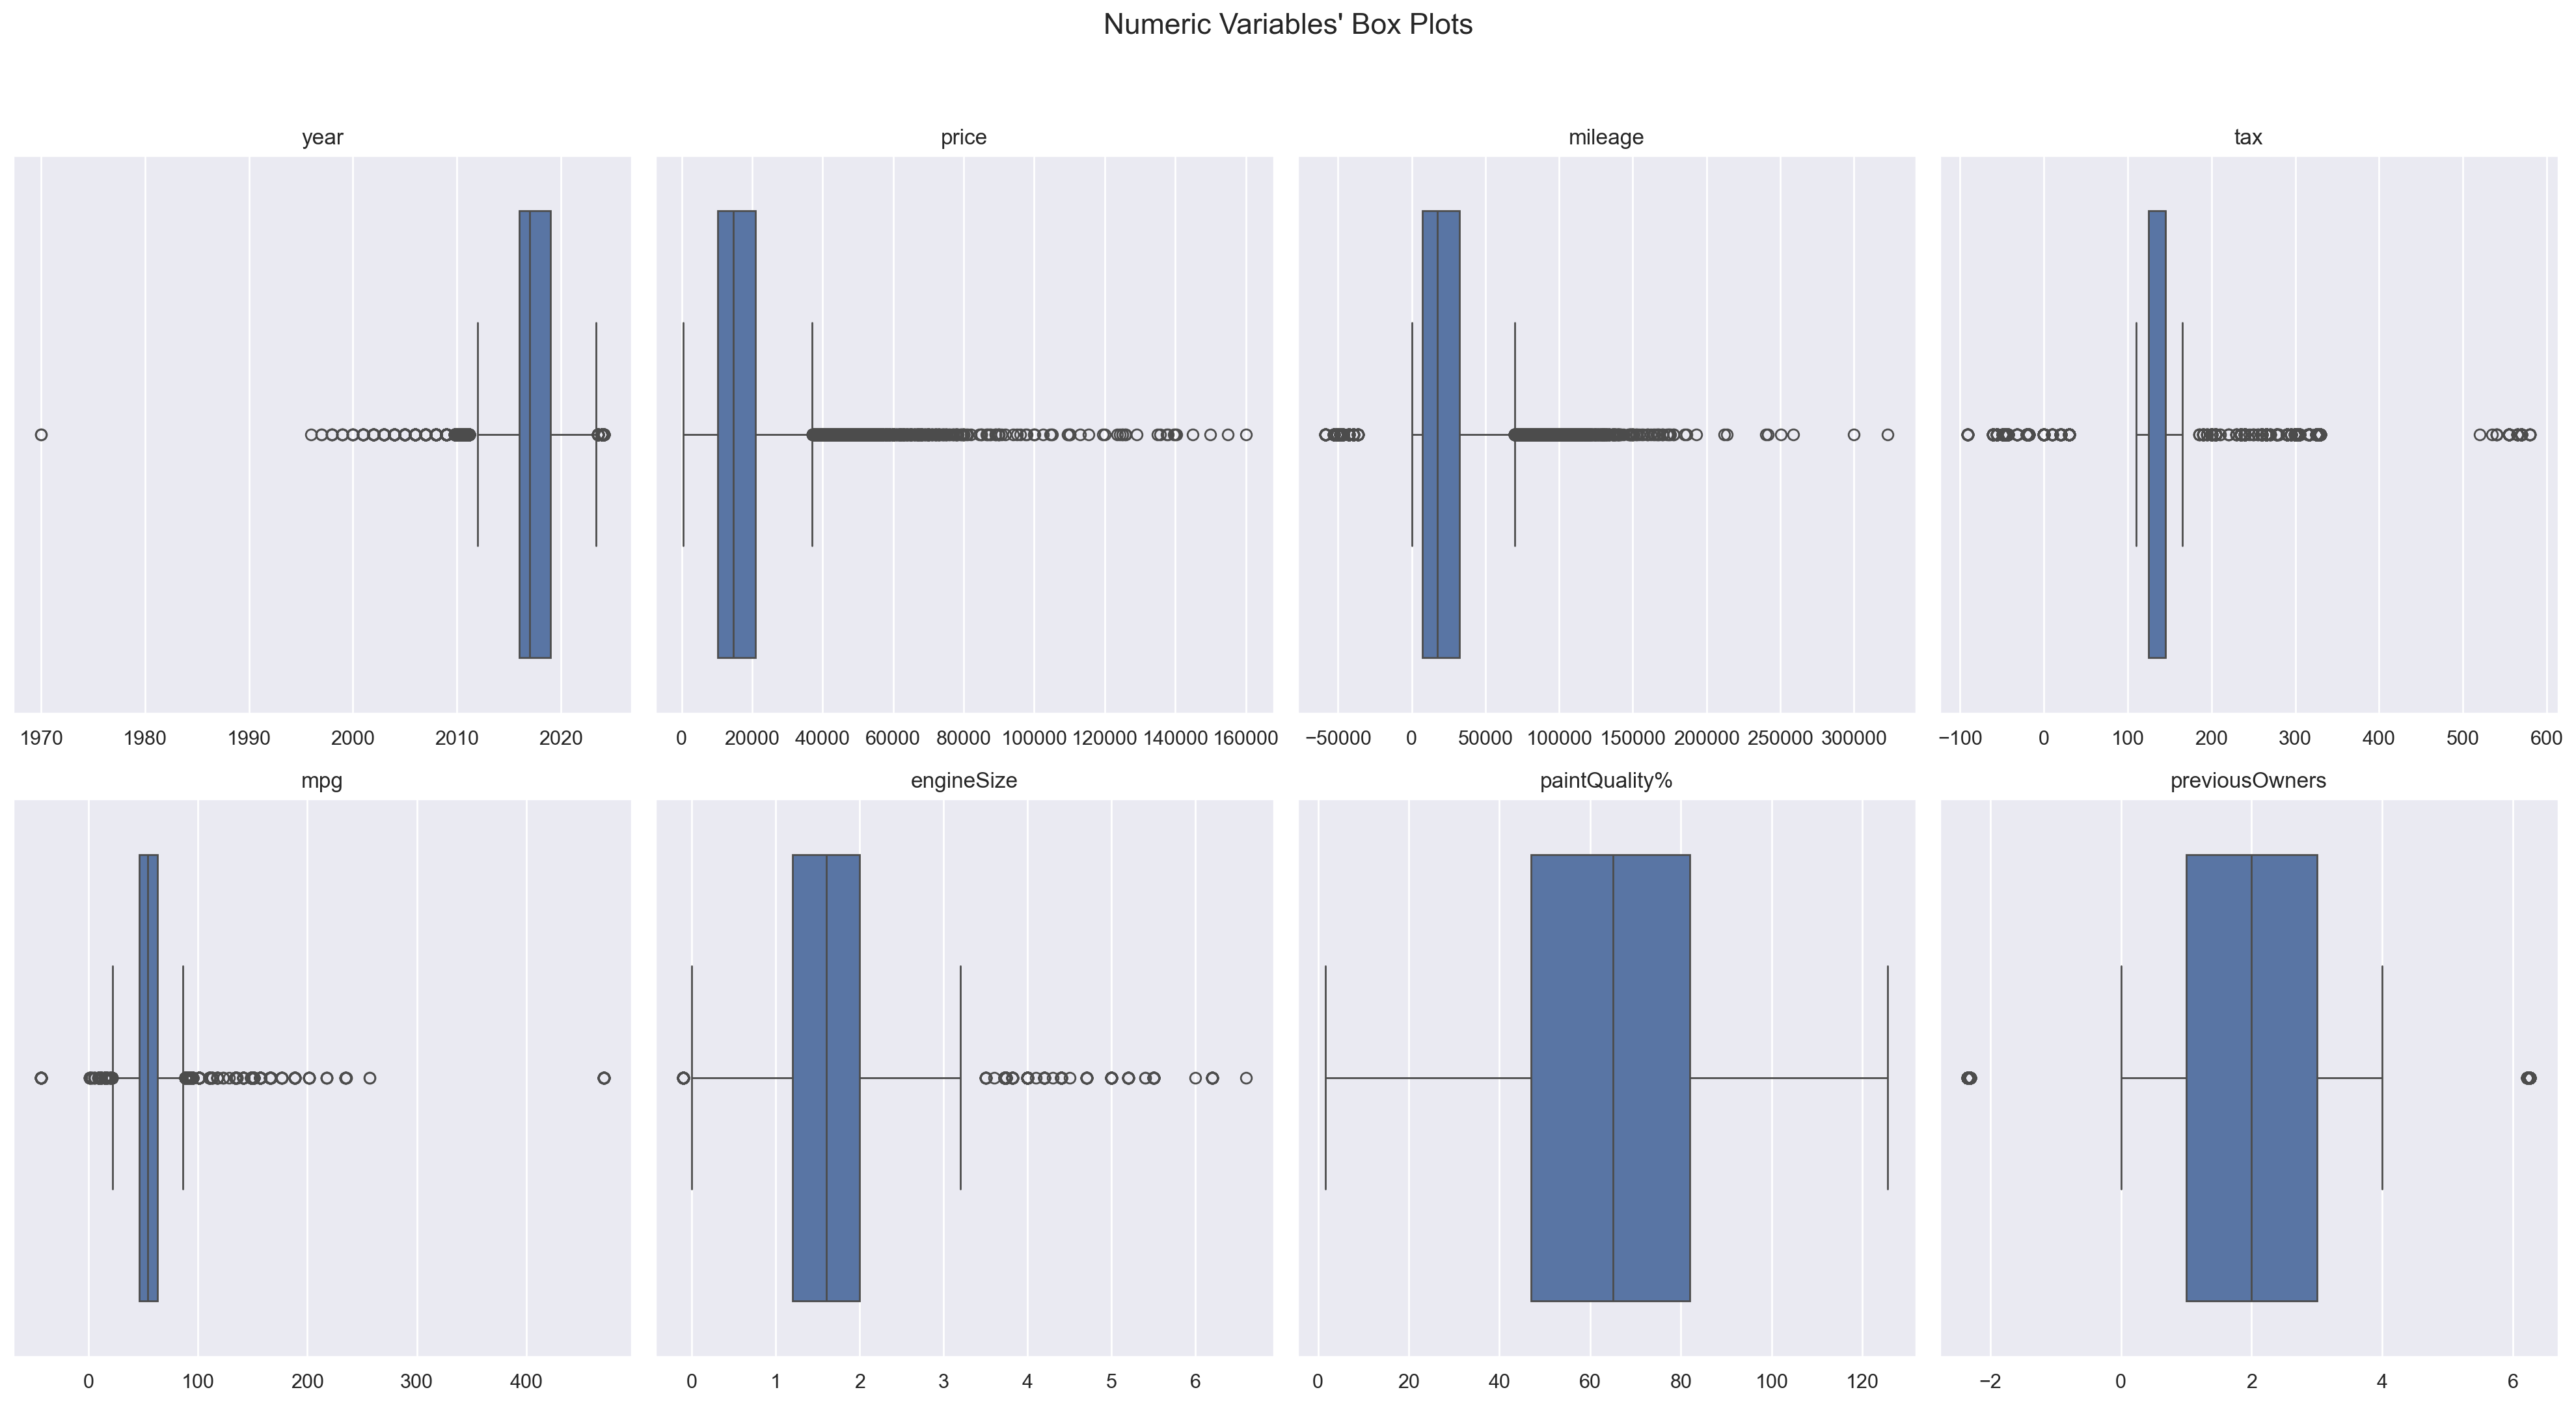

In [5]:
metric_features = df.select_dtypes(include=['number']).columns.tolist()
metric_features.remove('carID')
metric_features.remove( "hasDamage")

sp_rows = 2
sp_cols = math.ceil(len(metric_features) / sp_rows)

fig, axes = plt.subplots(
    sp_rows,
    sp_cols,
    figsize=(20, 11),
    tight_layout=True
)

# se vier 1D, normaliza para array
axes = axes.flatten() if hasattr(axes, "flatten") else [axes]

# --- box plots ---
for ax, feat in zip(axes, metric_features):
    sns.boxplot(x=df[feat], ax=ax)   # horizontal
    ax.set_title(feat)
    ax.set_xlabel("")  # opcional: deixa o xlabel limpo para caber melhor

# apaga eixos sobrantes (se houver)
for i in range(len(metric_features), len(axes)):
    fig.delaxes(axes[i])

# --- título e layout ---
plt.suptitle("Numeric Variables' Box Plots", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])

plt.show()


- The **year** feature shows a few clear outliers before 2005, representing old cars that are not common in the dataset. These outliers **are not "extreme measurement errors"**, they represent real older vehicles that may be in the market. That said, it must be studied what to do in this case.

- The **price** feature displays many high-value outliers, with several cars priced above £100,000. These extreme points likely correspond to **luxury or sports models** and can heavily skew regression models if not handled carefully.

- The **mileage** feature has multiple high-mileage outliers, some above 250,000 miles, and a few negative values, which are invalid and **must be cleaned**.

- The **tax** feature contains some **negative** or abnormally high values, which indicate data entry errors or inconsistencies that require treatment.

- The **mpg** feature reveals outliers well above 100 mpg, which is unrealistic for most cars.

- The **engine size** distribution includes outliers above 4L, corresponding to high-performance or luxury engines, but these are rare and may bias models if not scaled or trimmed.

- The **paintQuality%** feature appears roughly uniform, though it shows a few cases above 100%, which are physically impossible and must be capped at 100%.

- The **previousOwners** feature includes negative values, which are clearly fake values and should be corrected to 0 or NaN, as ownership count cannot be negative.

It will now be analysed each variable alone and the conclusions associated with each one.

## 1.1 Year

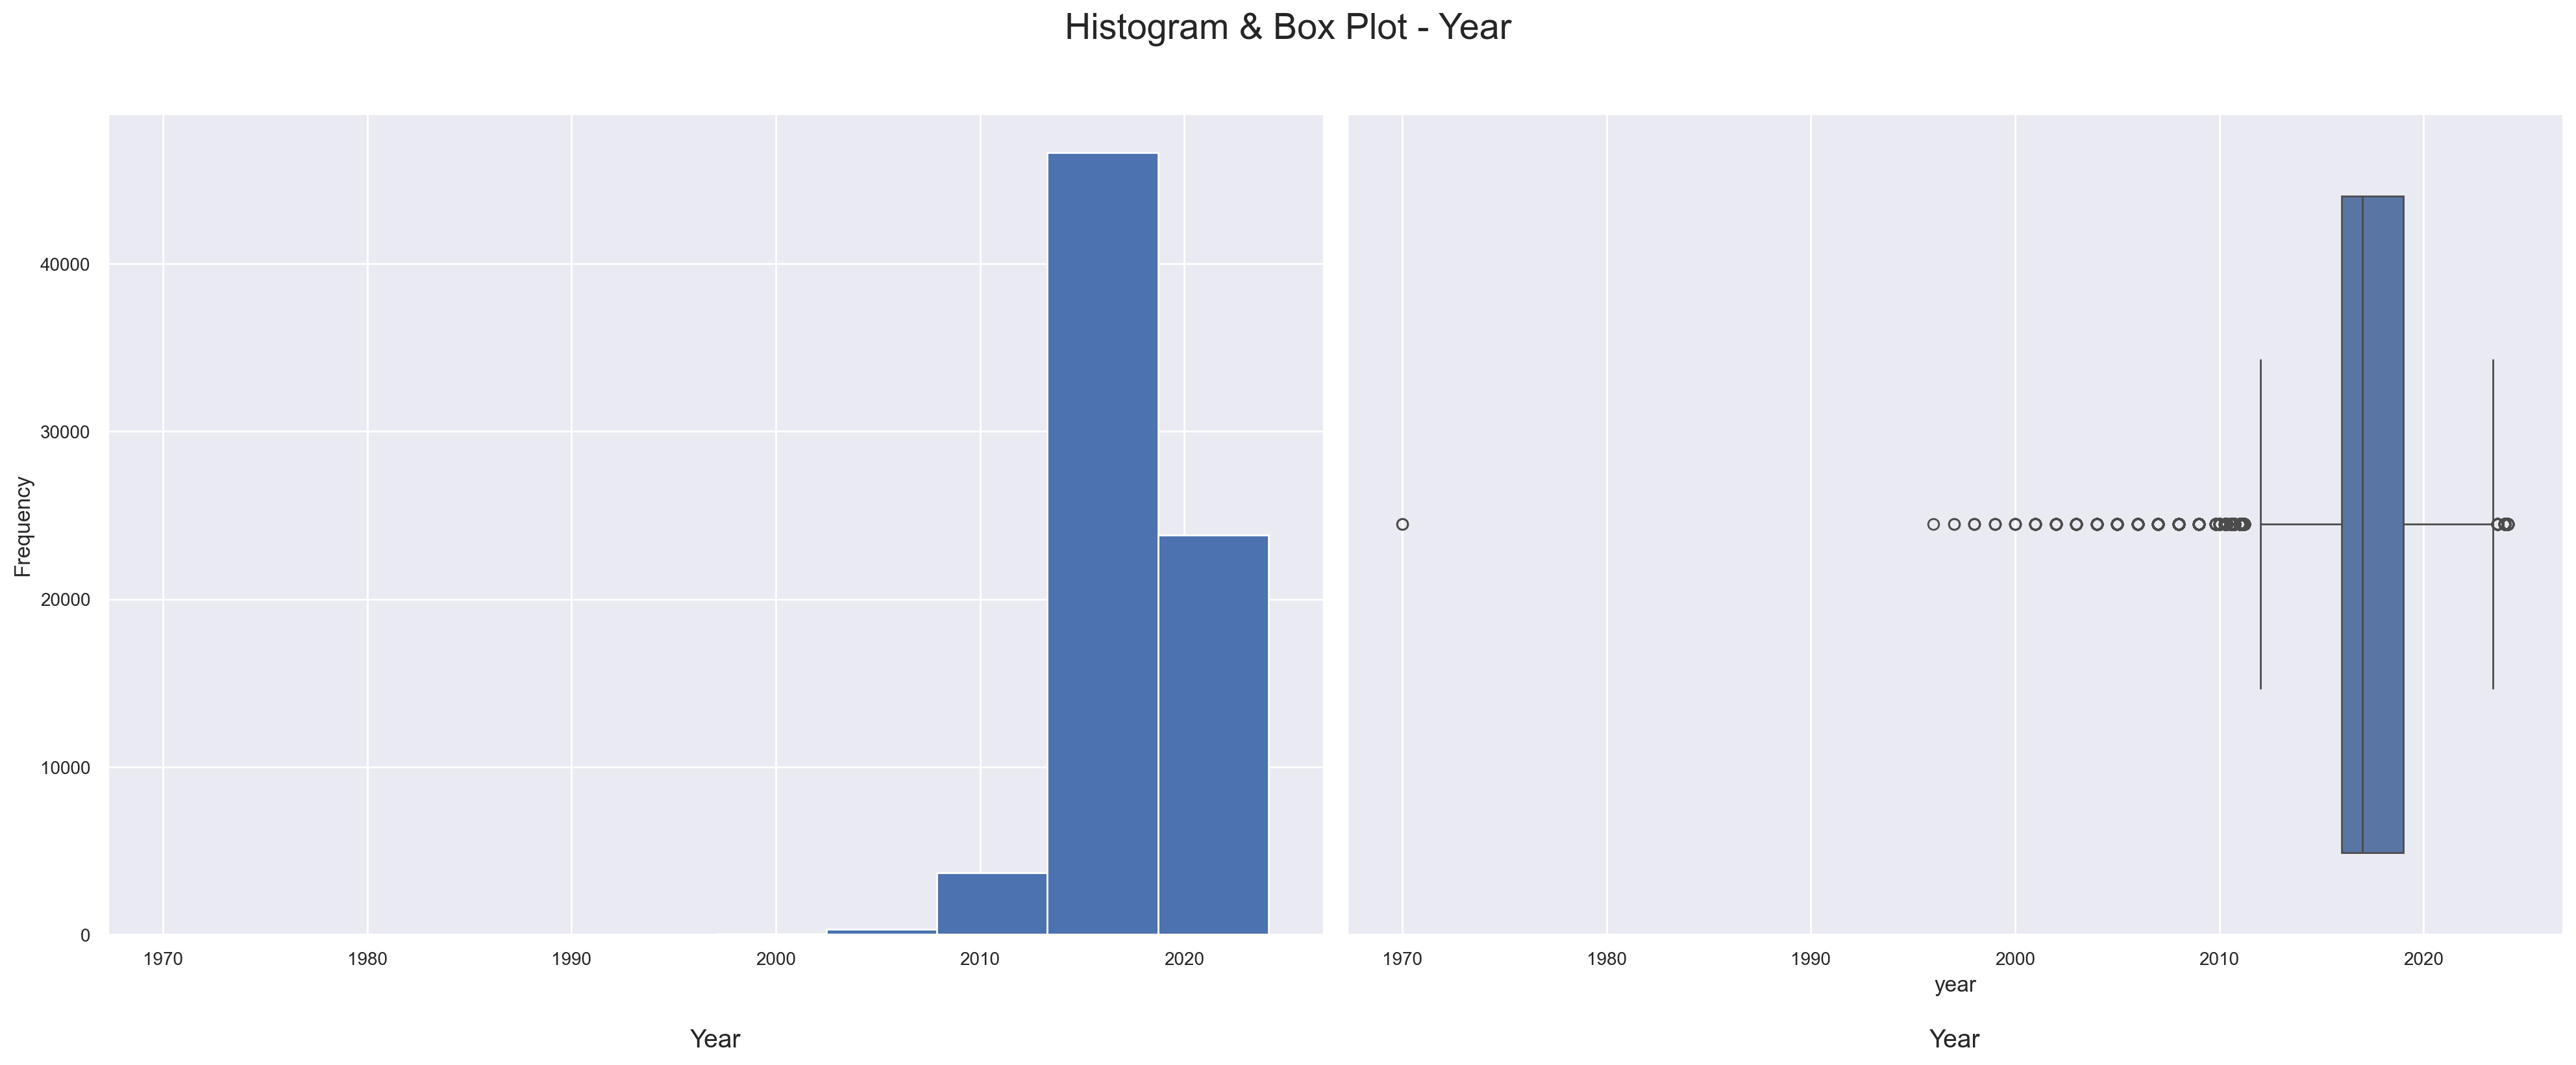

In [6]:
data = pd.to_numeric(df["year"], errors='coerce').dropna()

fig, axes = plt.subplots(1, 2, figsize=(20, 8), tight_layout=True)

axes[0].hist(data)
axes[0].set_title("Year", fontsize=14, y=-0.15)
axes[0].set_ylabel("Frequency", fontsize=12)
axes[0].tick_params(axis='both', which='major', labelsize=10)

sns.boxplot(x=data, ax=axes[1])
axes[1].set_title("Year", fontsize=14, y=-0.15)
axes[1].tick_params(axis='both', which='major', labelsize=10)

plt.suptitle("Histogram & Box Plot - Year", fontsize=20, y=1.02)

plt.show()

- The year feature shows that most cars are relatively new, mainly from 2010 to 2022, confirming a strong dominance of recent models in the dataset.

- A few older vehicles appear before 2005, representing genuine but rare cases rather than data errors.

Overall, the variable is clean and stable, and no transformation or scaling is required beyond possibly deriving car age for modeling purposes.

## 1.2 Price

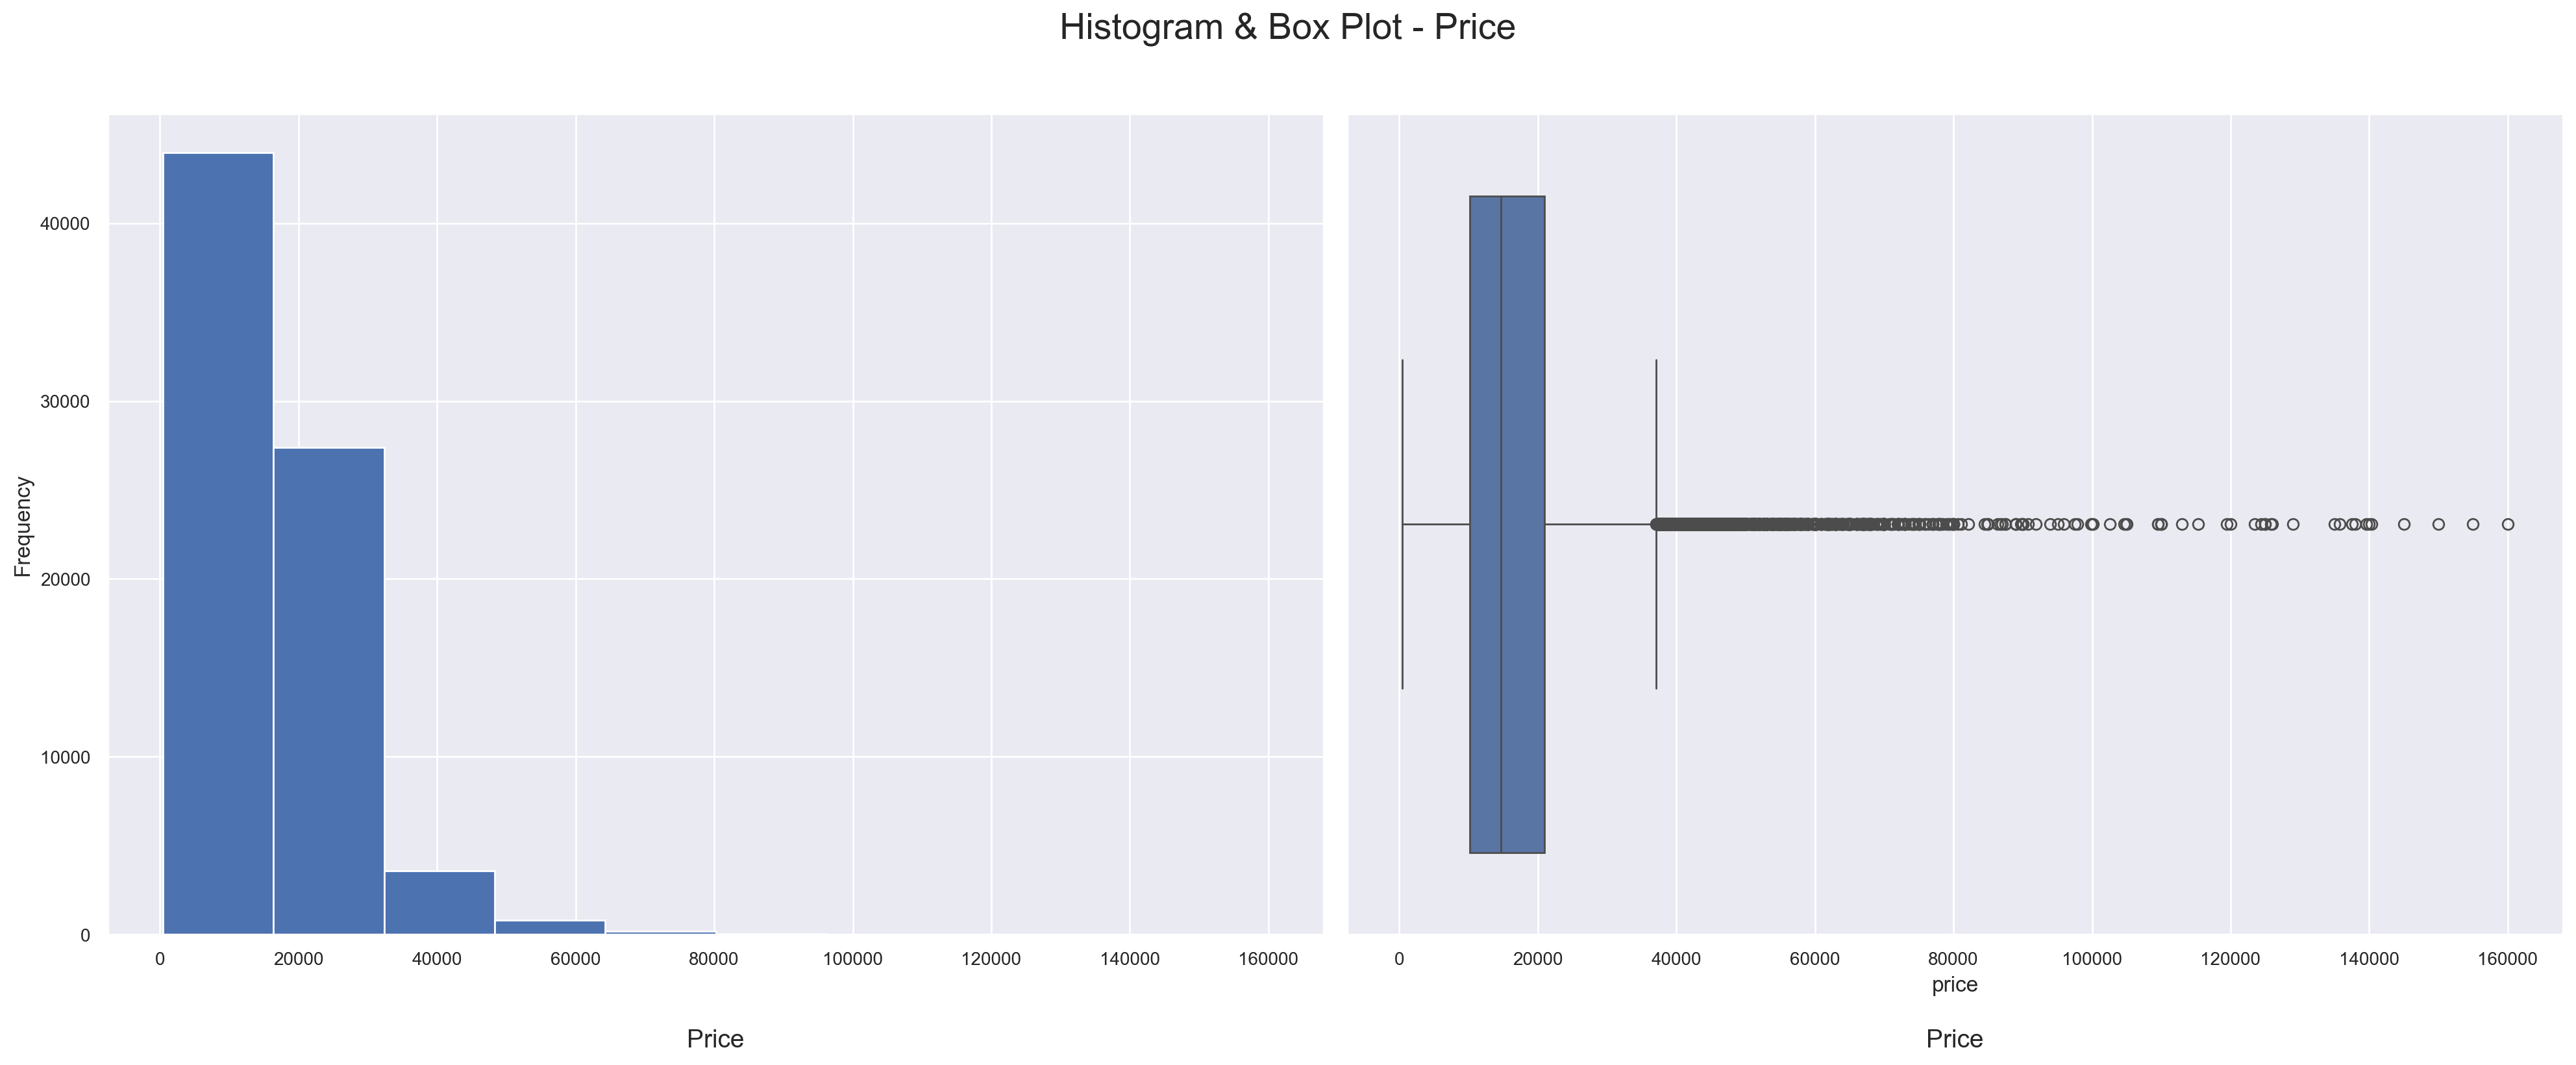

In [7]:
data = pd.to_numeric(df["price"], errors='coerce').dropna()

fig, axes = plt.subplots(1, 2, figsize=(20, 8), tight_layout=True)

axes[0].hist(data)
axes[0].set_title("Price", fontsize=14, y=-0.15)
axes[0].set_ylabel("Frequency", fontsize=12)
axes[0].tick_params(axis='both', which='major', labelsize=10)

sns.boxplot(x=data, ax=axes[1])
axes[1].set_title("Price", fontsize=14, y=-0.15)
axes[1].tick_params(axis='both', which='major', labelsize=10)

plt.suptitle("Histogram & Box Plot - Price", fontsize=20, y=1.02)

plt.show()

For the variable price, the distribution is highly right-skewed, with most cars priced below £30,000, indicating that the dataset mainly contains mainstream vehicles.

- A smaller number of observations correspond to high-end or luxury cars, which naturally appear as outliers in the upper tail of the distribution.

- The presence of these extreme values is expected and valid, but they may impact model performance if not handled properly.

Overall, the variable shows a realistic market pattern, though its skewness suggests that a log transformation may be beneficial during modeling to stabilize variance and improve prediction accuracy.

## 1.3 Mileage

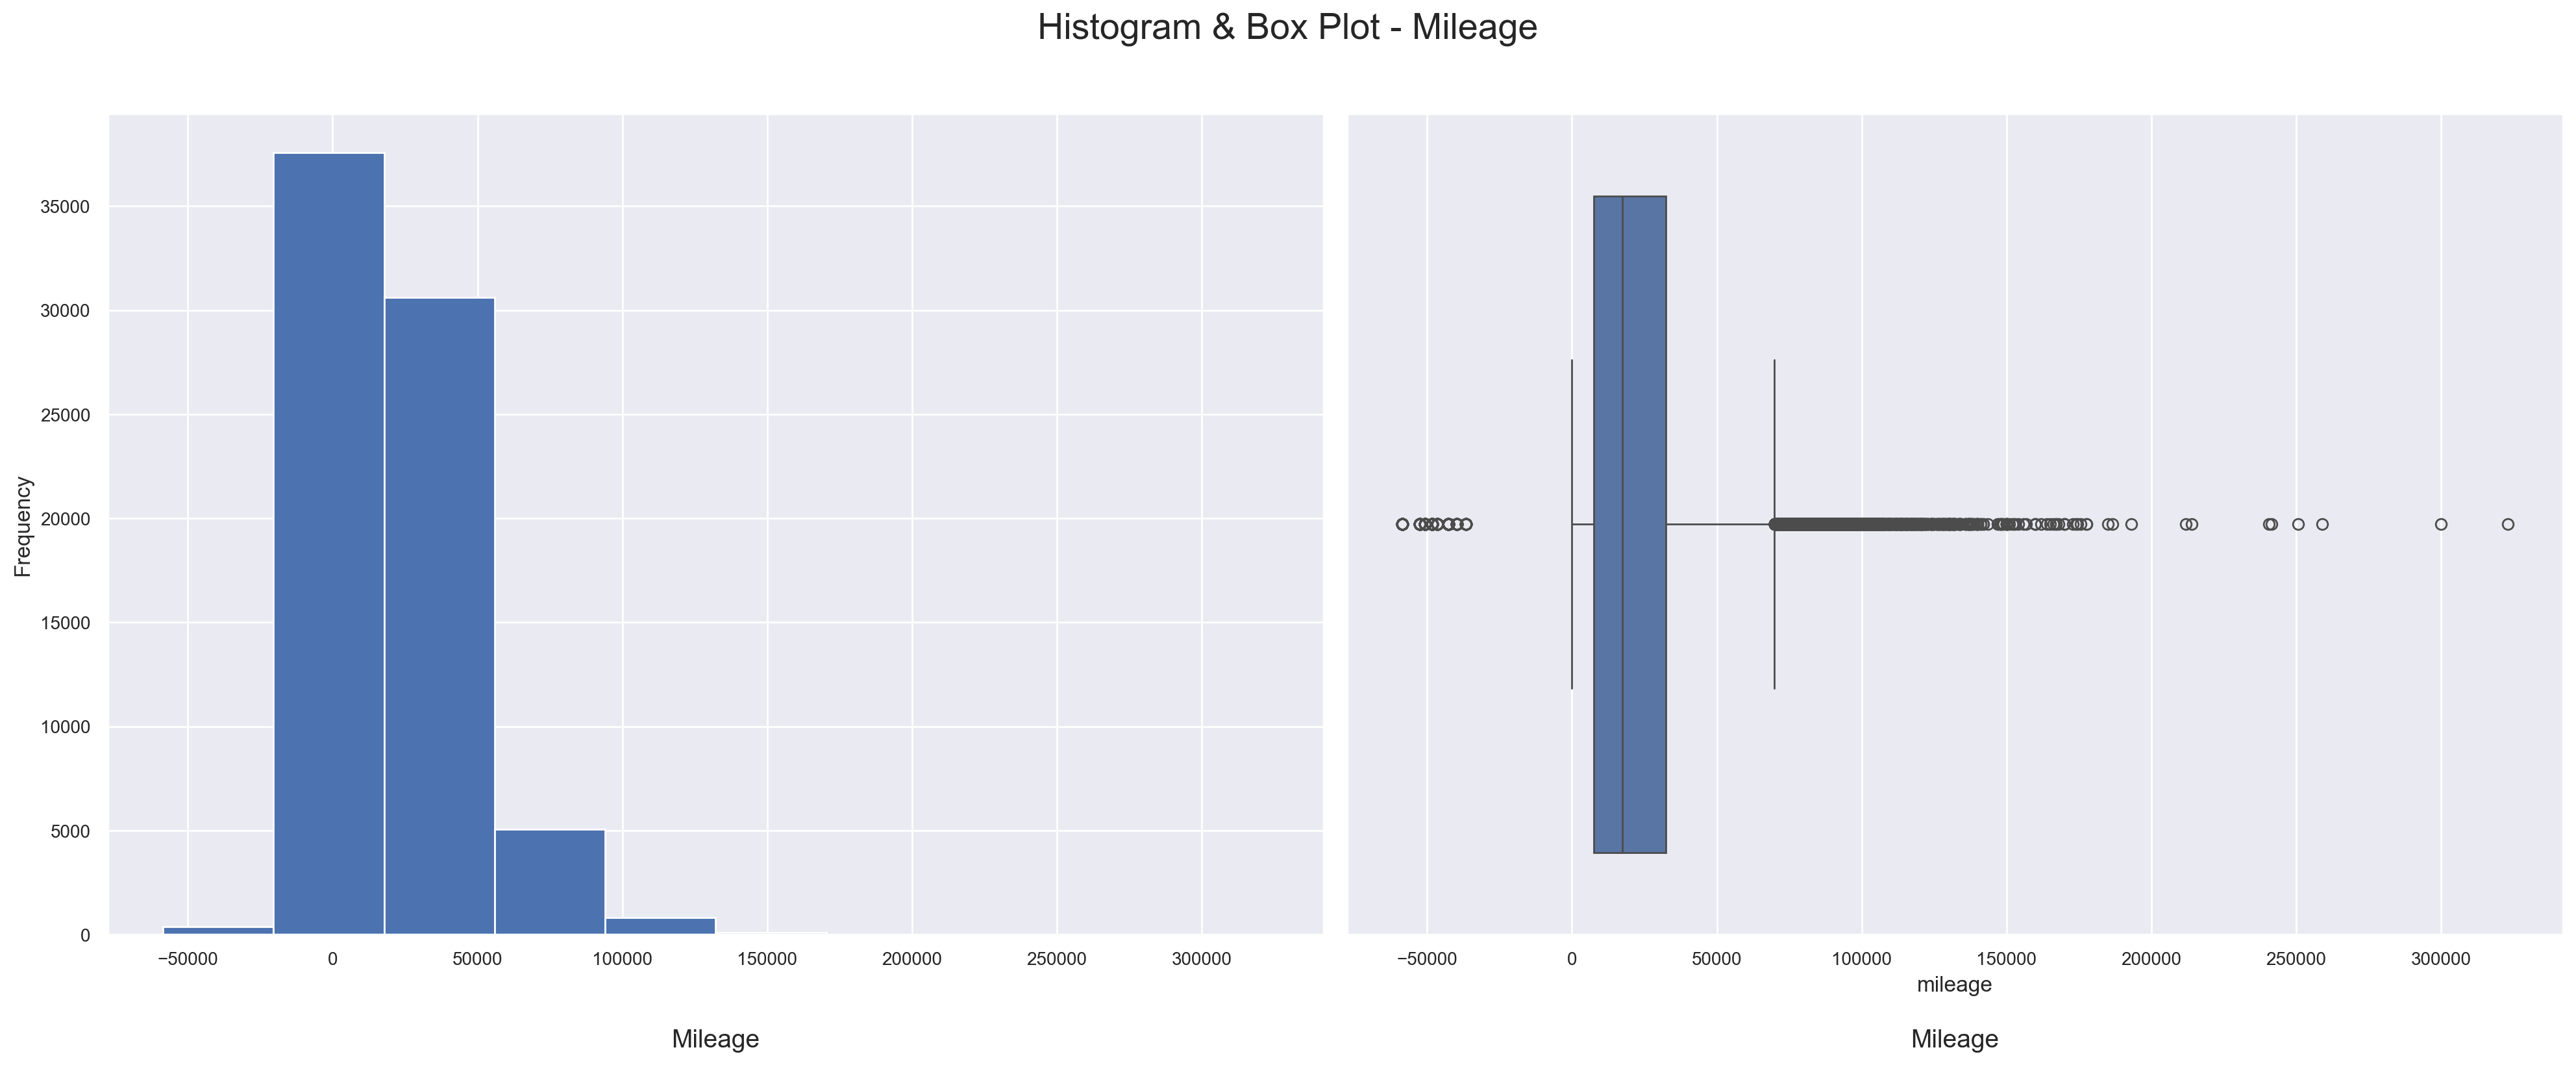

In [8]:
data = pd.to_numeric(df["mileage"], errors='coerce').dropna()

fig, axes = plt.subplots(1, 2, figsize=(20, 8), tight_layout=True)

axes[0].hist(data)
axes[0].set_title("Mileage", fontsize=14, y=-0.15)
axes[0].set_ylabel("Frequency", fontsize=12)
axes[0].tick_params(axis='both', which='major', labelsize=10)

sns.boxplot(x=data, ax=axes[1])
axes[1].set_title("Mileage", fontsize=14, y=-0.15)
axes[1].tick_params(axis='both', which='major', labelsize=10)

plt.suptitle("Histogram & Box Plot - Mileage", fontsize=20, y=1.02)

plt.show()


For the variable mileage, the distribution is strongly right-skewed, with most vehicles having less than 100,000 miles, consistent with a dataset dominated by relatively new cars.

- A few records show negative mileage values, which are invalid and must be corrected or removed, as mileage cannot decrease or be negative.

- The variable also contains some very high values, representing older or heavily used cars, which appear as outliers in the boxplot.

Overall, the variable displays a realistic pattern but requires data cleaning to address the negative entries. Once corrected, we need to study in depth to analyse this feature, and see the correlation(or not) with variables like year and price.

## 1.4 MPG

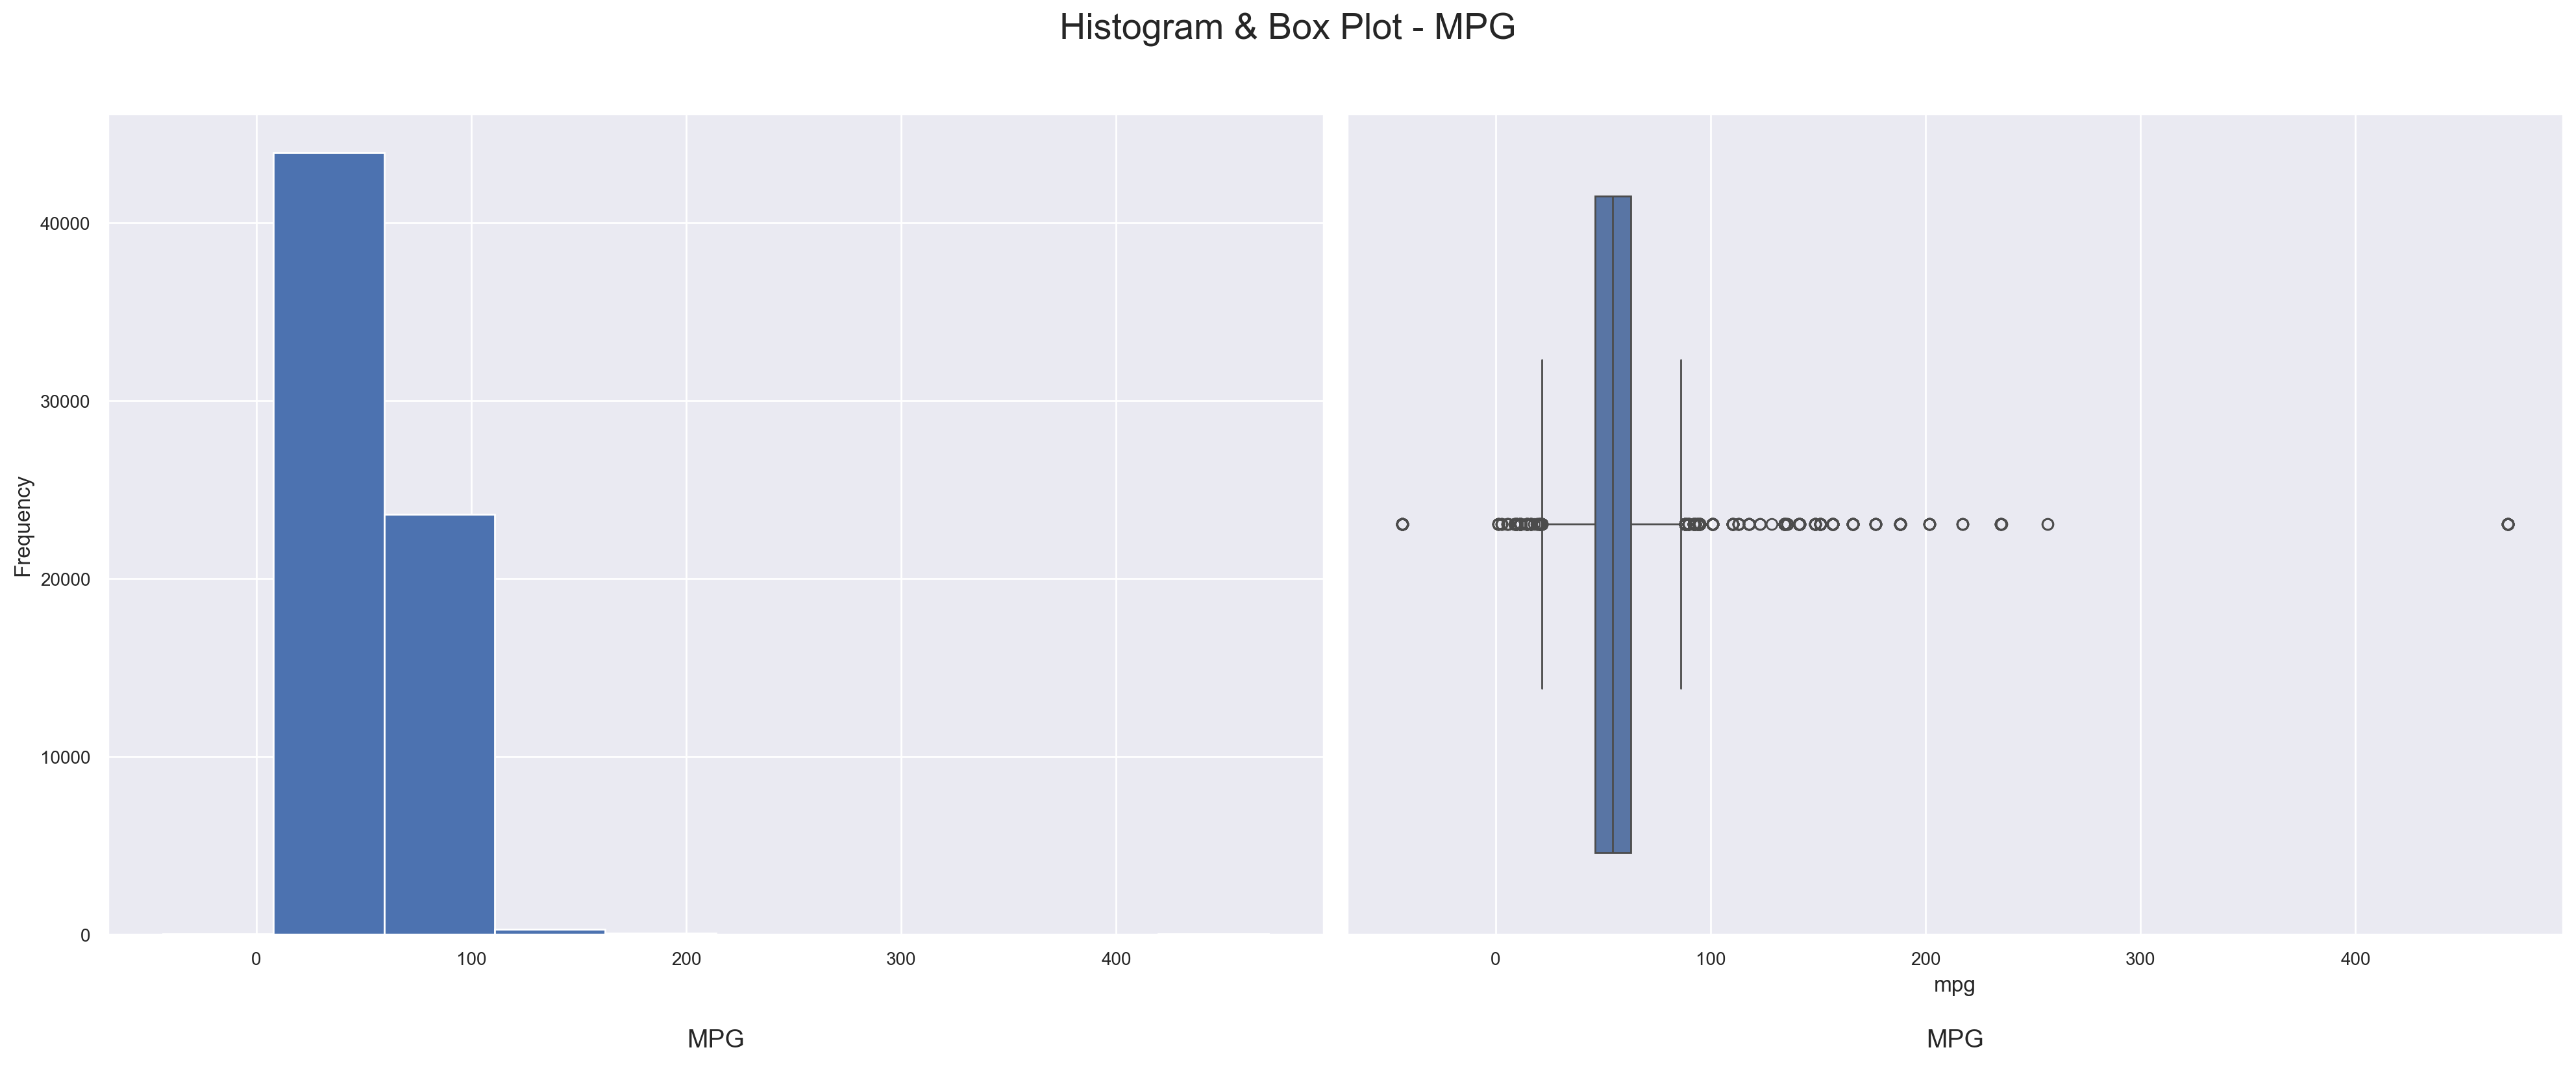

In [9]:
data = pd.to_numeric(df["mpg"], errors='coerce').dropna()

fig, axes = plt.subplots(1, 2, figsize=(20, 8), tight_layout=True)

axes[0].hist(data)
axes[0].set_title("MPG", fontsize=14, y=-0.15)
axes[0].set_ylabel("Frequency", fontsize=12)
axes[0].tick_params(axis='both', which='major', labelsize=10)

sns.boxplot(x=data, ax=axes[1])
axes[1].set_title("MPG", fontsize=14, y=-0.15)
axes[1].tick_params(axis='both', which='major', labelsize=10)

plt.suptitle("Histogram & Box Plot - MPG", fontsize=20, y=1.02)

plt.show()

For the variable mpg (miles per gallon), the distribution is right-skewed, with most cars showing fuel efficiency values between 40 and 80 mpg, which is typical for modern petrol and diesel vehicles.

- A few extreme outliers are visible above 150 mpg, which are unrealistic for conventional cars and may correspond to data entry errors or hybrid/electric models reported incorrectly (this will be checked).

- There are also some low or near-zero mpg values, which are physically inconsistent and should be investigated or removed during data cleaning.

Overall, the variable reflects a reasonable fuel efficiency pattern, but the presence of implausible outliers suggests that data validation and cleaning are necessary before modeling.

## 1.5 Engine Size

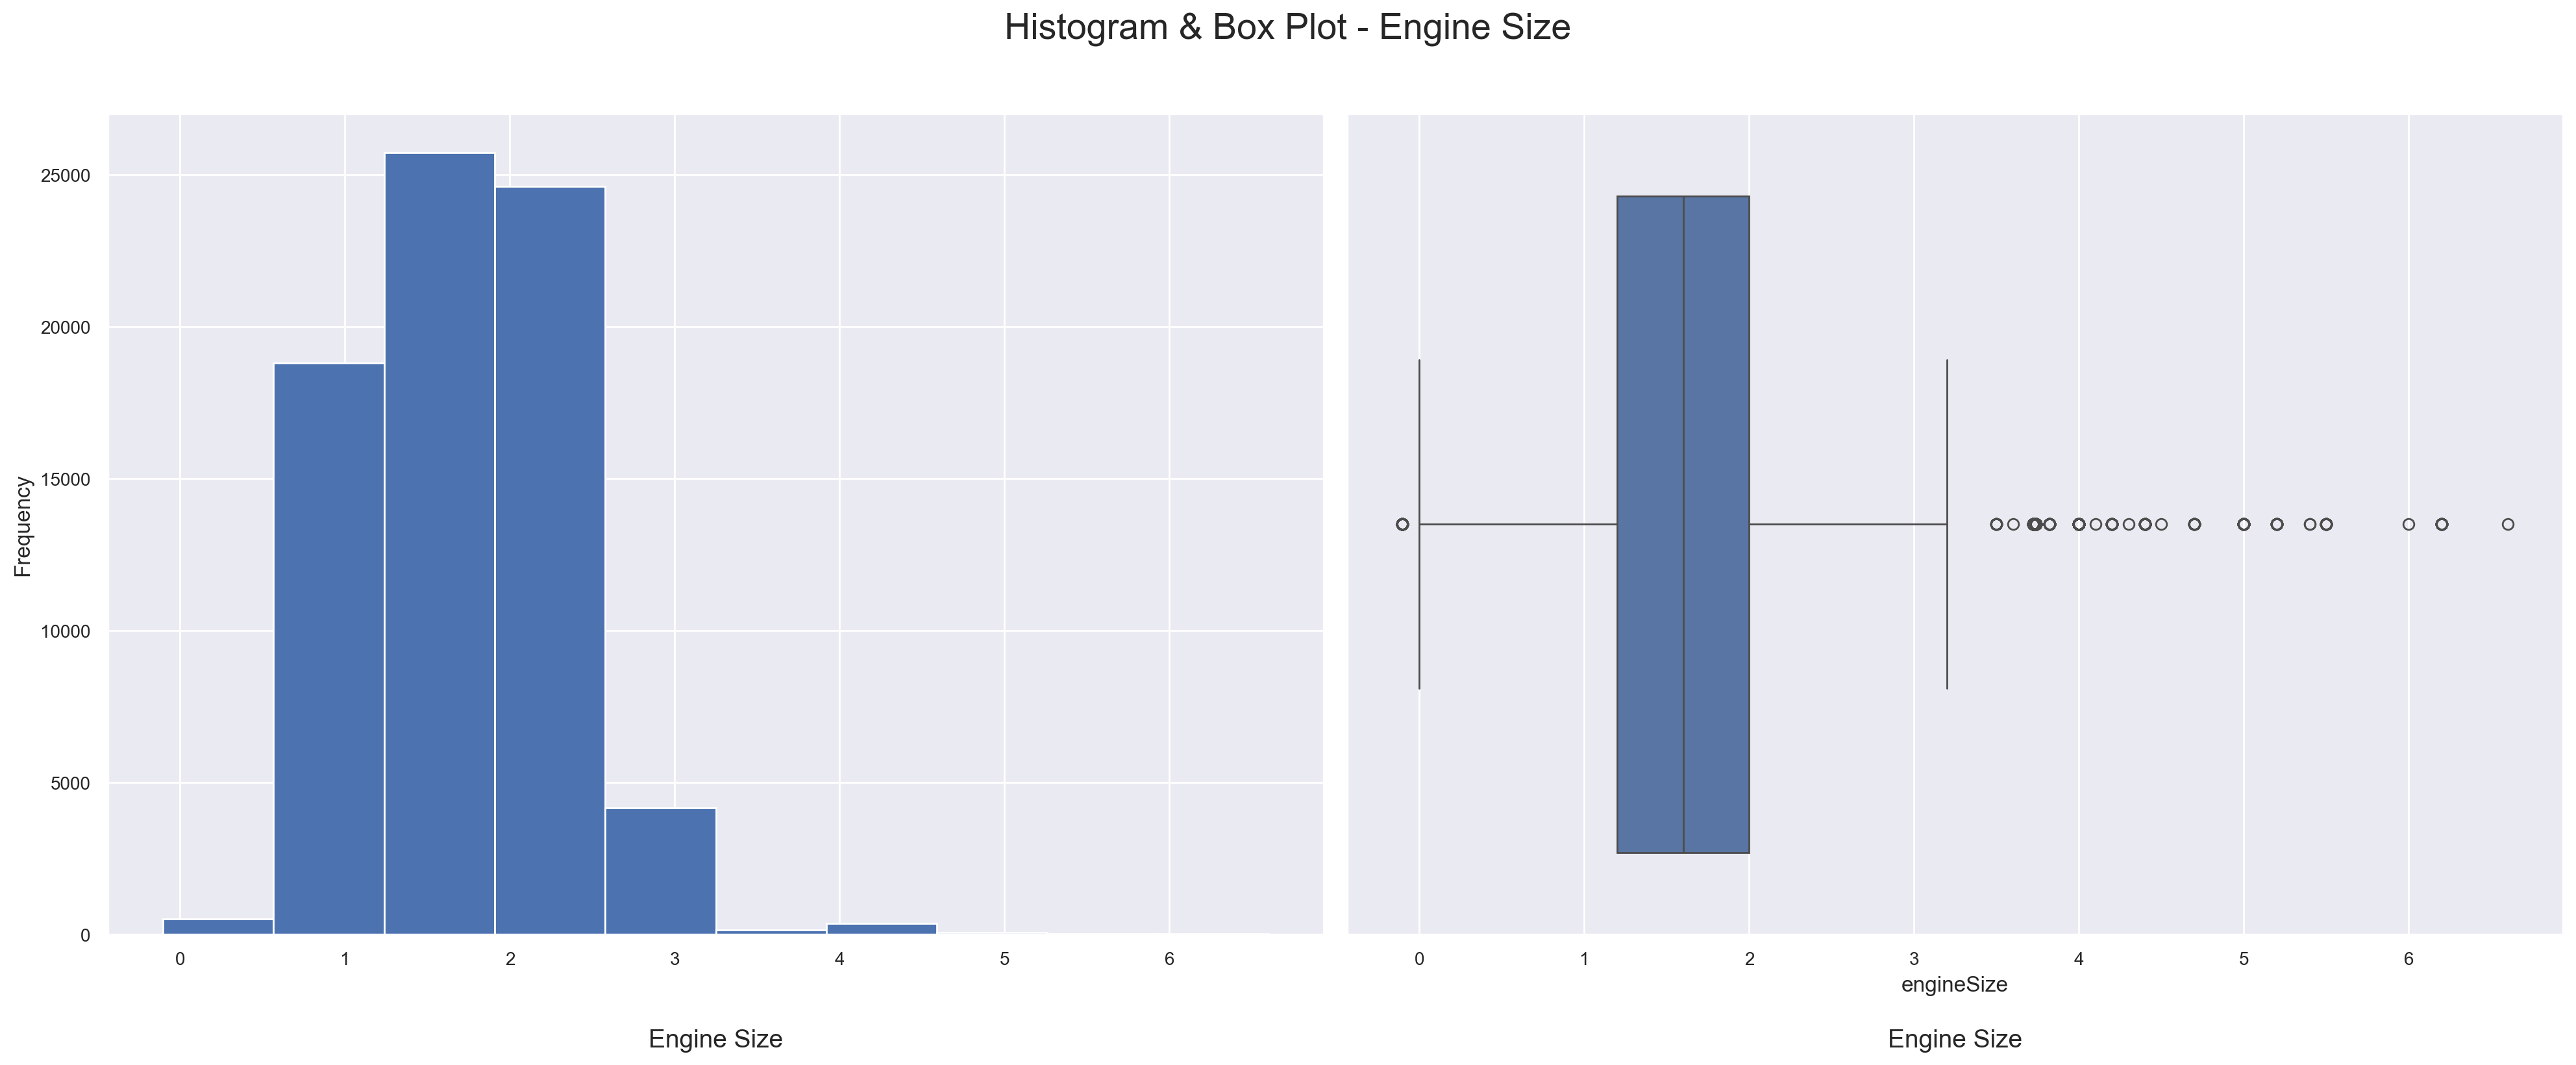

In [10]:
data = pd.to_numeric(df["engineSize"], errors='coerce').dropna()

fig, axes = plt.subplots(1, 2, figsize=(20, 8), tight_layout=True)

axes[0].hist(data)
axes[0].set_title("Engine Size", fontsize=14, y=-0.15)
axes[0].set_ylabel("Frequency", fontsize=12)
axes[0].tick_params(axis='both', which='major', labelsize=10)

sns.boxplot(x=data, ax=axes[1])
axes[1].set_title("Engine Size", fontsize=14, y=-0.15)
axes[1].tick_params(axis='both', which='major', labelsize=10)

plt.suptitle("Histogram & Box Plot - Engine Size", fontsize=20, y=1.02)

plt.show()

The engine size feature is concentrated between 1.0L and 2.5L, showing that the dataset mostly includes compact and mid-range vehicles.

- A few cars exceed 4.0L, which are legitimate but uncommon cases linked to high-performance engines.

Overall, the variable appears clean and well-distributed, with only minor outliers that can be handled during preprocessing if necessary.

## 1.6 Paint Quality

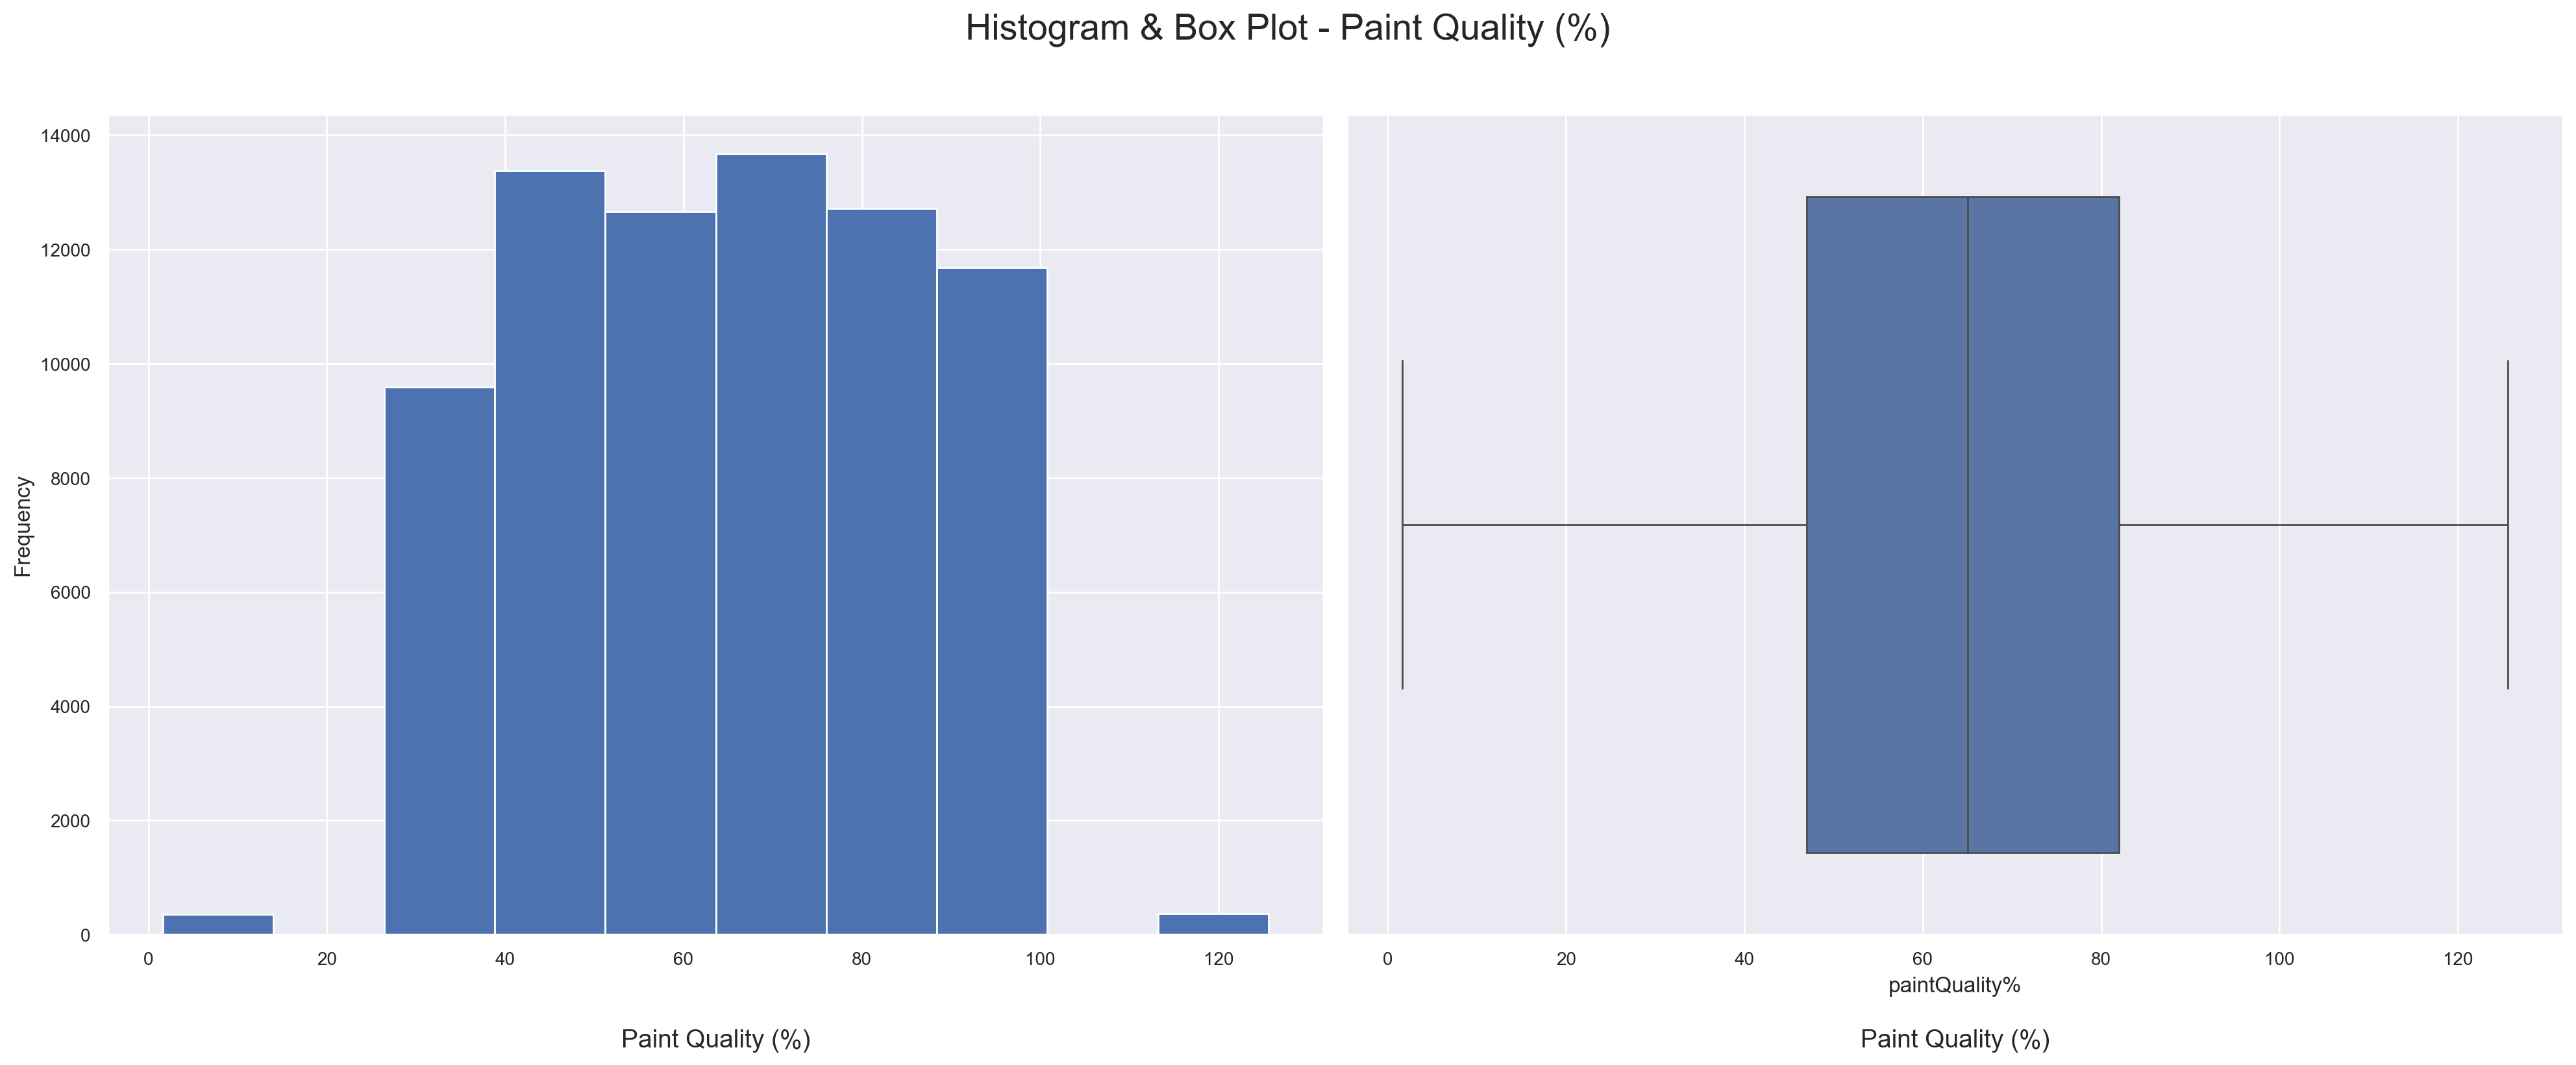

In [11]:
data = pd.to_numeric(df["paintQuality%"], errors='coerce').dropna()

fig, axes = plt.subplots(1, 2, figsize=(20, 8), tight_layout=True)

axes[0].hist(data)
axes[0].set_title("Paint Quality (%)", fontsize=14, y=-0.15)
axes[0].set_ylabel("Frequency", fontsize=12)
axes[0].tick_params(axis='both', which='major', labelsize=10)

sns.boxplot(x=data, ax=axes[1])
axes[1].set_title("Paint Quality (%)", fontsize=14, y=-0.15)
axes[1].tick_params(axis='both', which='major', labelsize=10)

plt.suptitle("Histogram & Box Plot - Paint Quality (%)", fontsize=20, y=1.02)

plt.show()

# 2. Categorical Data Visualization

In [12]:
non_metric_features = ["Brand", "model", "transmission", "fuelType"]

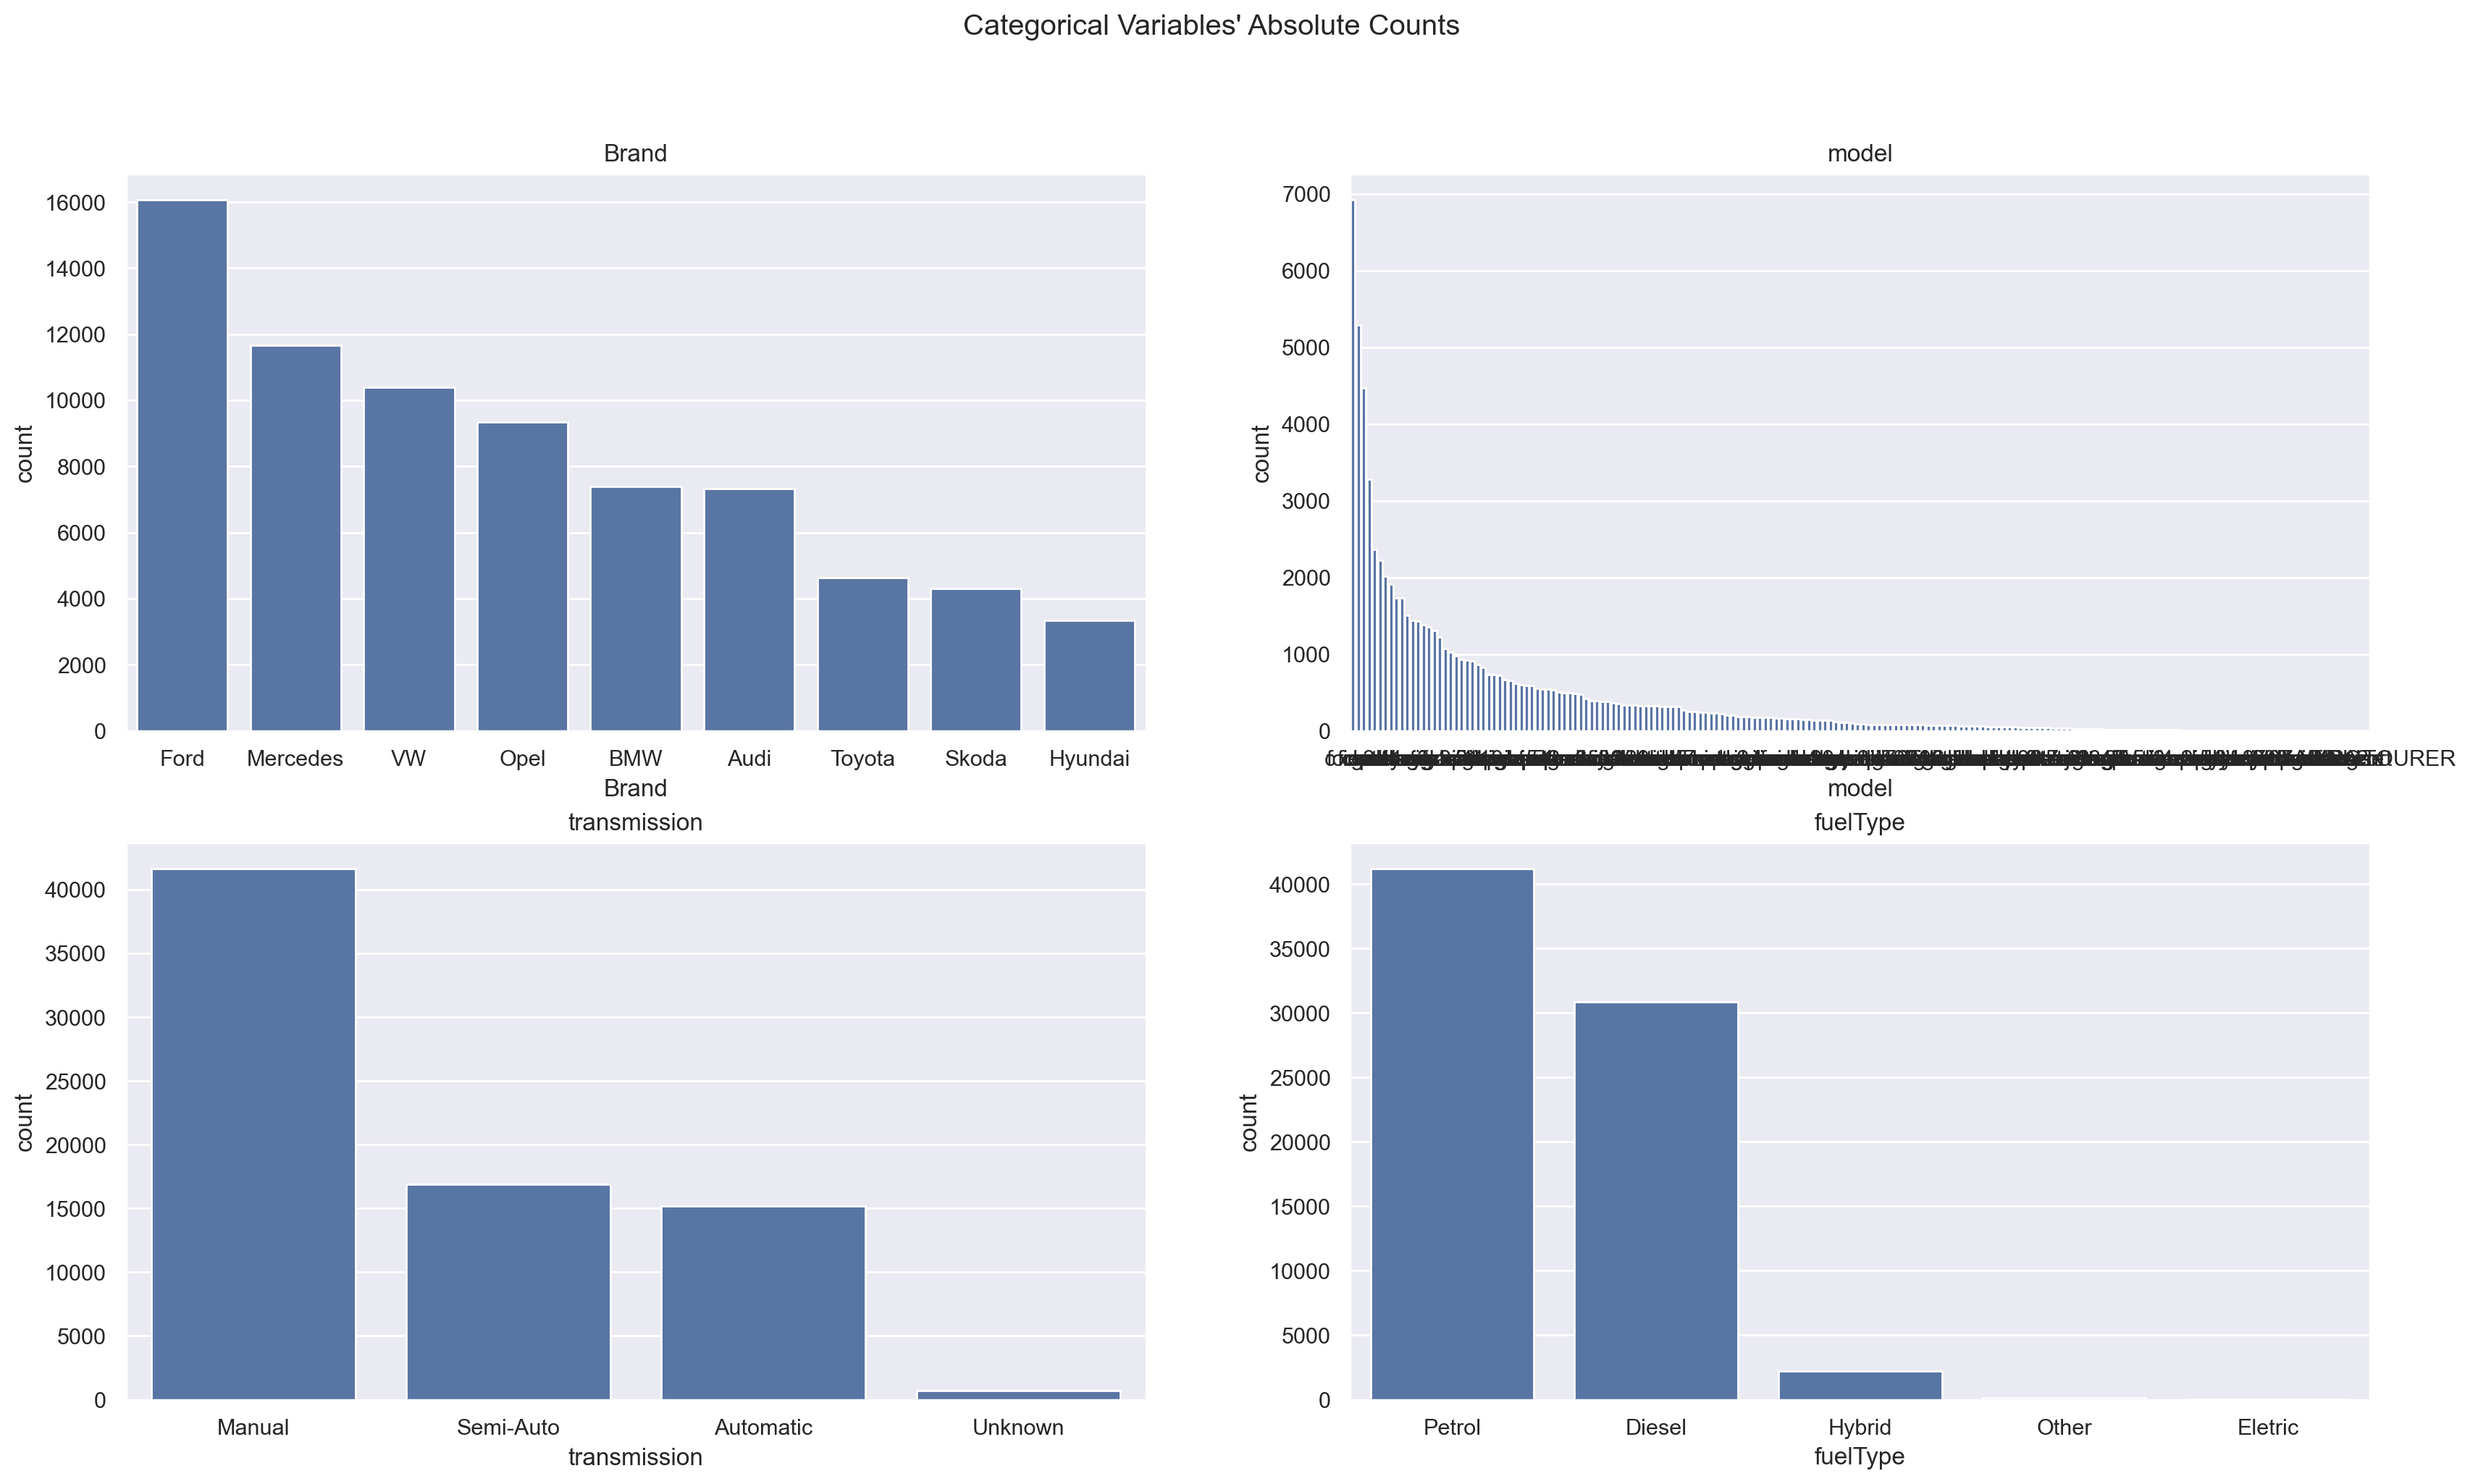

In [13]:
fig, axes = plt.subplots(
    2, 
    ceil(len(non_metric_features) / 2), 
    figsize=(20, 11)
    )

for ax, feat in zip(axes.flatten(), non_metric_features):
    # use df_deps
    sns.countplot(x=df[feat], ax=ax, 
                  order=df[feat].value_counts().index) 
    ax.set_title(feat)


plt.suptitle("Categorical Variables' Absolute Counts")
plt.show()

## 2.1 Brand

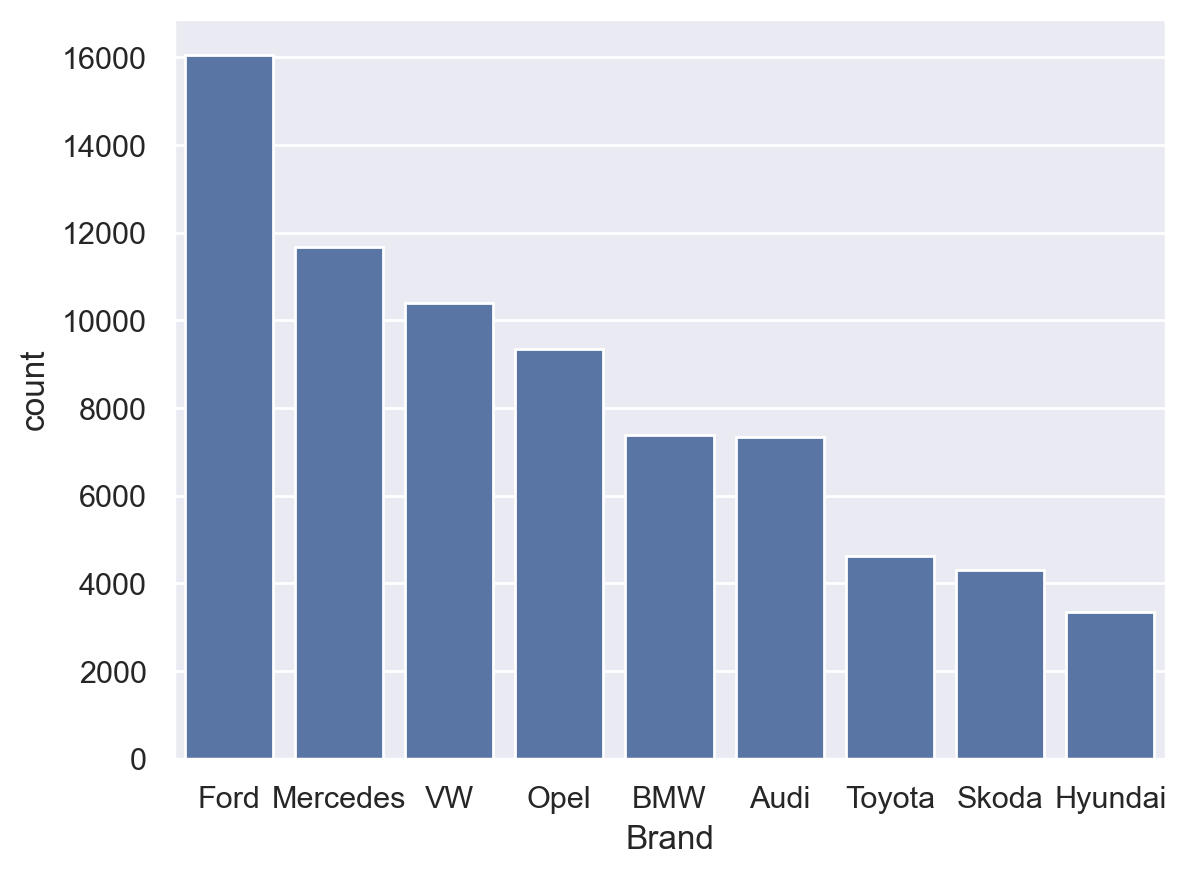

In [14]:
sns.countplot(x=df["Brand"], order=df["Brand"].value_counts().index)
plt.show()

- The most represented brand by far is **Ford**, followed by **Mercedes**, **Volkswagen**, and **Opel** in nearer distance and **BMW** and **Audi** in similar proportions.  
  
- At the other end of the distribution, we find relatively few **Hyundai**, **Skoda**, and **Toyota** vehicles.  
- This imbalance may affect the model's ability to accurately predict prices for less represented brands such as **Hyundai**,**Skoda**, and **Toyota**, while making it much easier to predict prices for **Ford** vehicles.  
- Consequently, the model could become **biased or overfitted** towards Ford, potentially leading to **poorer generalization** for brands with limited data.

## 2.2 Transmission

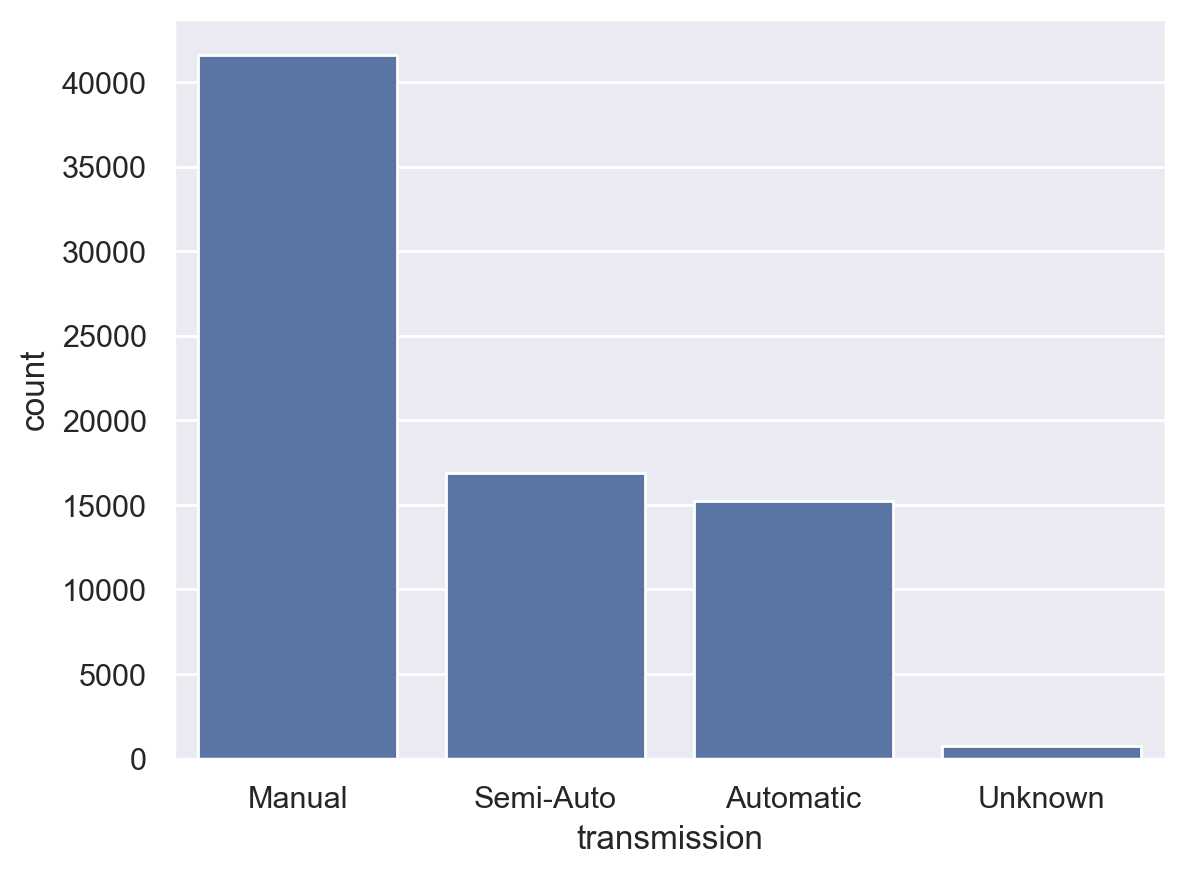

In [15]:
sns.countplot(x=df["transmission"], order=df["transmission"].value_counts().index)
plt.show()

- More than half of the dataset consists of **manual transmission** vehicles.  
  
- They are followed by **semi-automatic** and **automatic** transmissions, which appear in similar proportions.  
- A very small number of records have **unknown transmission types**, which should be either **dropped** from the dataset or, if aplicable, replaced with the correct one.  
- This indicates a **highly imbalanced distribution**, which may lead to issues of **poor generalization** towards manual transmission vehicles.

## 2.3 Fuel Type

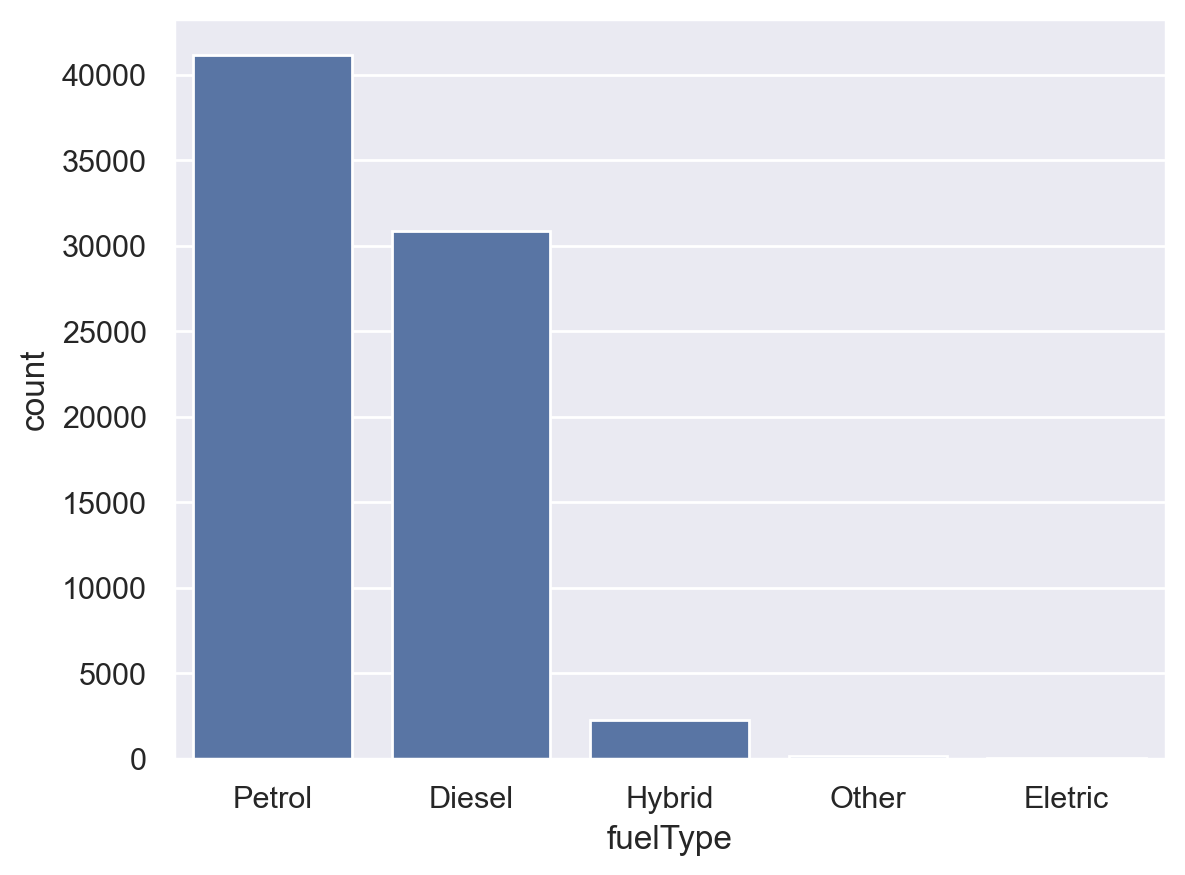

In [16]:
sns.countplot(x=df["fuelType"], order=df["fuelType"].value_counts().index)
plt.show()


- Most of the dataset consists of **Petrol** and **Diesel** vehicles, with a clear dominance of **Petrol**.  
  
- **Hybrid** cars are still relevant in the dataset, but their proportion is much lower compared to Petrol and Diesel. The number of **Electric** cars is extremely small. 
 
- Records with other `fuelType` values should be **dropped**, as they add little to no information and their quantity is not statistically significant. 
  
- This distribution indicates that it will be much easier for the prediction model to learn and generalize for **Petrol** and **Diesel** vehicles, while struggling with **Hybrid** and especially **Electric** cars.  
  - This raises **concerns regarding model robustness and generalization**. It is expected that, in the future of this online resale company, the number of **Hybrid** and **Electric** vehicle sellings will increase, while **Petrol** and **Diesel** will decline.
  - This might lead, potentially, to a model that becomes **less aligned with future market trends**.
  
- There is also an **inverse correlation** between price and frequency in the dataset: the cheaper the fuel type, the larger the number of cars available.  
  
- This relationship is consistent with market reality, where more affordable vehicles tend to dominate the dataset.

## 2.4 Models


It was revealed in the initial overview visualization that it was very difficult to observe the distribution of models due to their high cardinality.

To address this issue, we decided to plot separate graphs showing the number of models per brand.

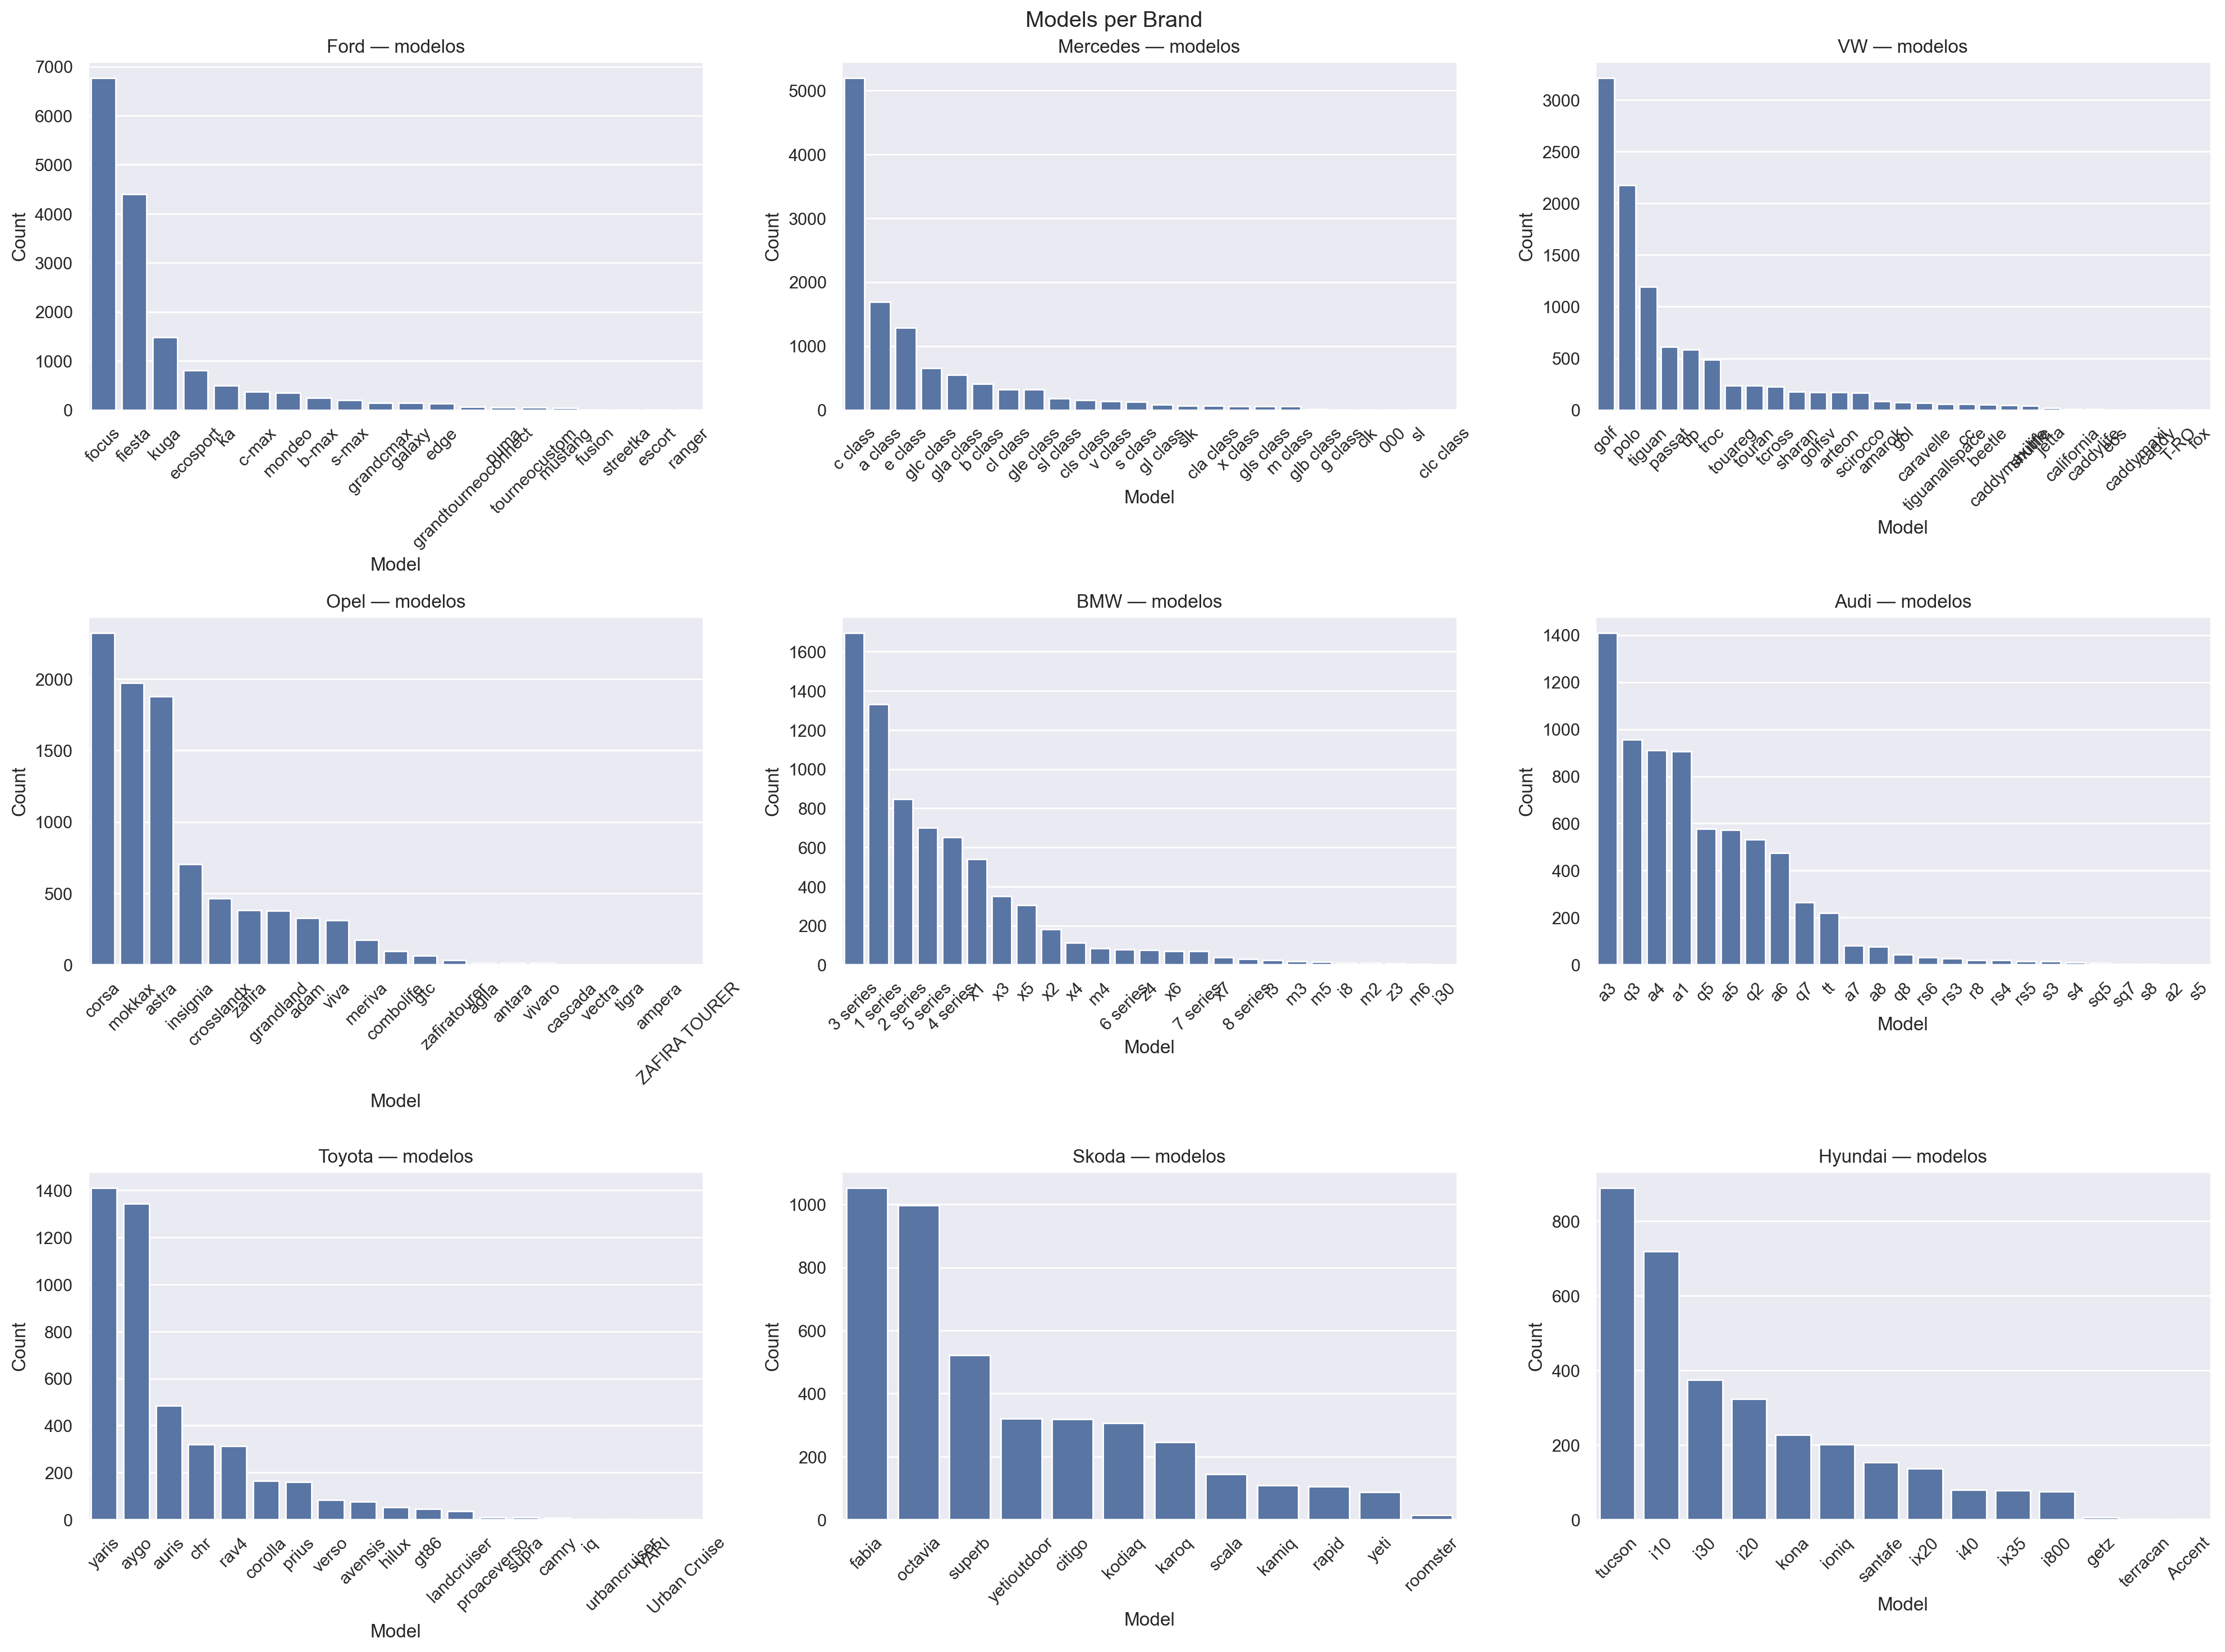

In [17]:
brands = df["Brand"].value_counts().index

cols = 3
rows = ceil(len(brands) / cols)

fig, axes = plt.subplots(
    rows,
    cols,
    figsize=(20, 5 * rows)  
)

axes = axes.flatten()

for i, (ax, brand) in enumerate(zip(axes, brands)):
    sub_models = df.loc[df["Brand"] == brand, "model"].dropna()
    order = sub_models.value_counts().index  

    sns.countplot(x=sub_models, ax=ax, order=order)
    ax.set_title(f"{brand} — modelos")
    ax.set_xlabel("Model")
    ax.set_ylabel("Count")
    ax.tick_params(axis="x", rotation=45)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle("Models per Brand")
plt.tight_layout()
plt.show()


- For most brands (such as **Ford**, **Volkswagen**, **BMW**, **Opel**, **Toyota**, and **Hyundai**), there are typically two or three models that dominate the dataset.  

- In the case of **Mercedes**, it is mainly the **C-Class** that stands out, while **Audi** presents the most balanced distribution among its models.  

- We expect that the greater the representation of a brand and its models in the dataset, the better the prediction model will perform in estimating their prices.  
  
- A **strong correlation** is also expected between different models and their respective price ranges, reflecting the various **market segments** or **tiers** that exist within each brand.


# 3. Numerical Bivariate Analysis

## 3.1 Correlation Matrix

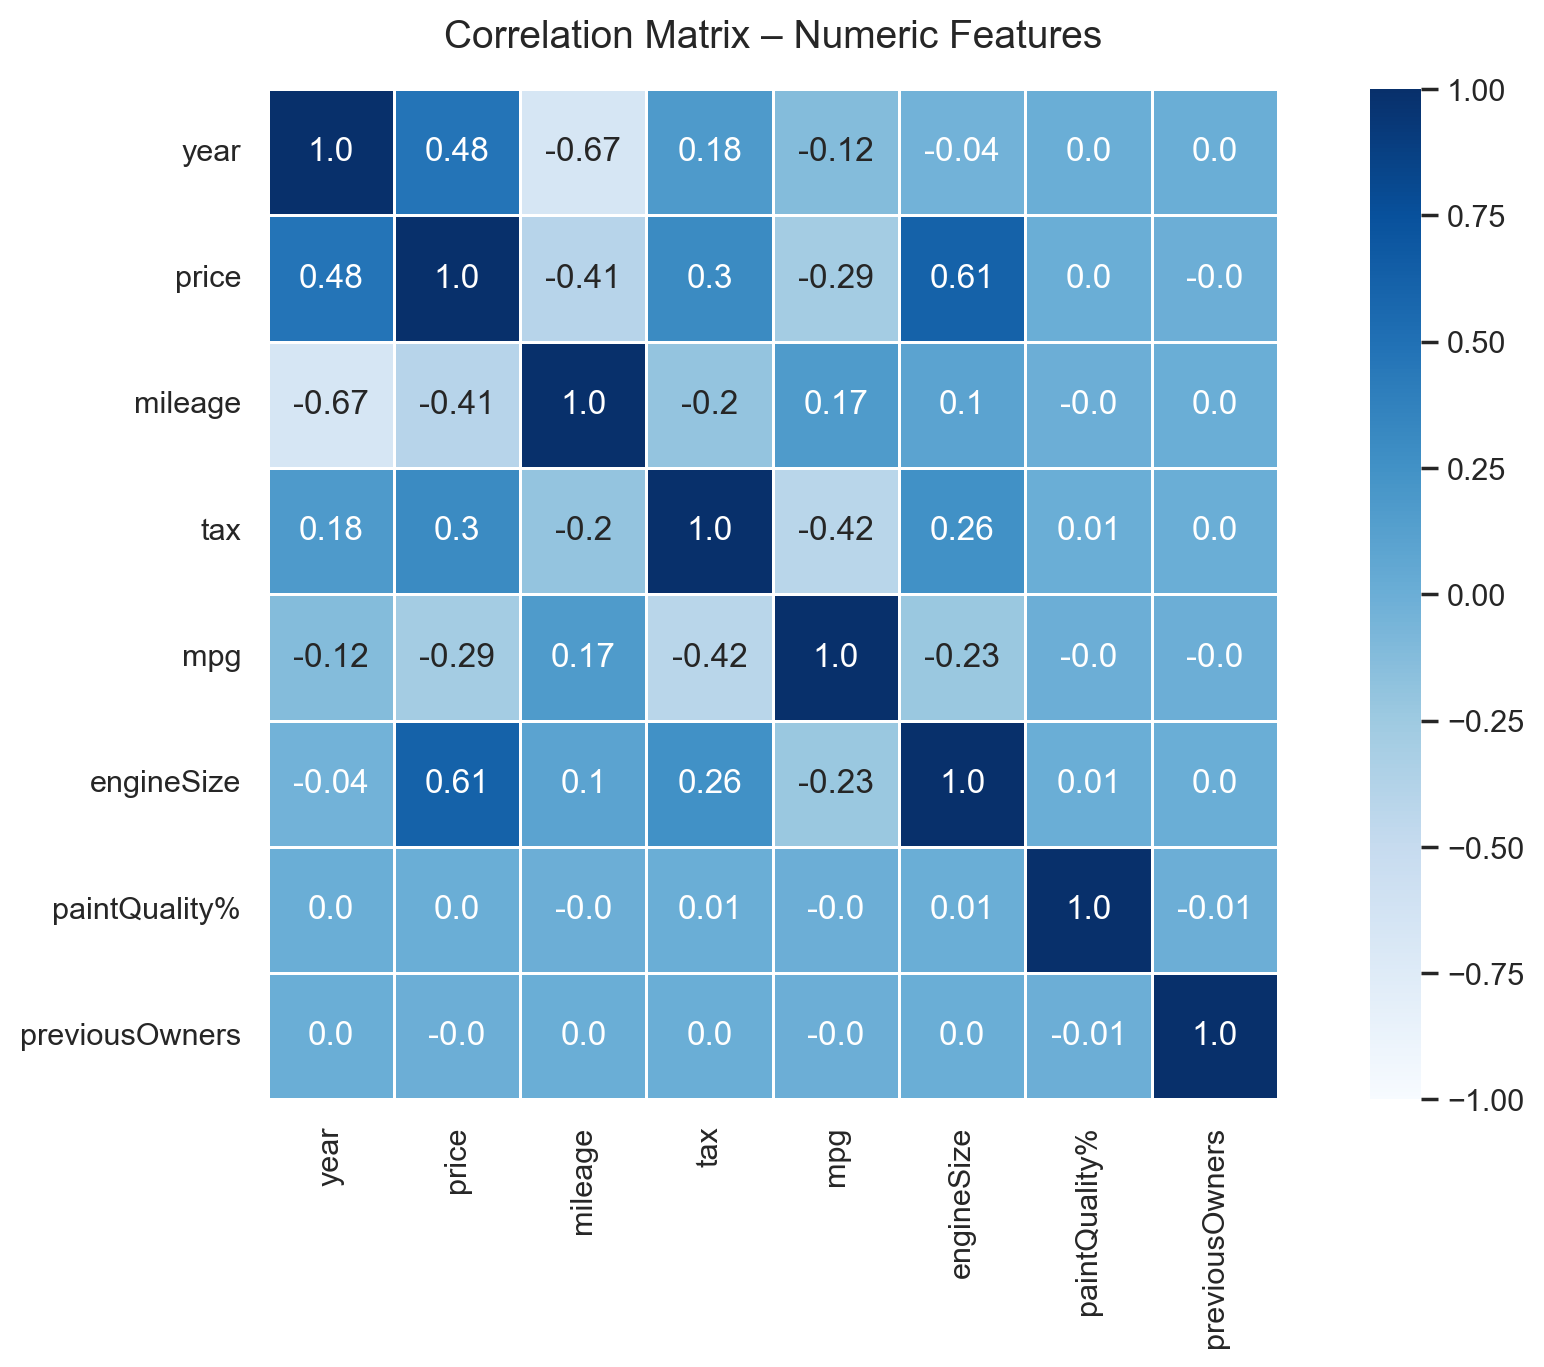

In [18]:
num_df = df.select_dtypes(include=[np.number])

num_df = num_df.drop(columns=["carID", "hasDamage"], errors="ignore")

corr = num_df.corr(method='pearson')

annot = corr.round(2).astype(str)

plt.figure(figsize=(10, 7))

sns.heatmap(data=corr,
            annot=annot,
            fmt='s',
            vmin=-1, vmax=1,
            center=0,
            square=True,
            linewidths=.5,
            cmap='Blues')

plt.title('Correlation Matrix – Numeric Features', fontsize=14, pad=15)
plt.tight_layout()

# Show plot
plt.show()


- The **price variable** remains **moderately correlated** with **engineSize (0.61)** and **year (0.48)**, confirming that **newer cars with larger engines** tend to be **more expensive**.
- **Mileage** maintains a **strong negative correlation** with both **price (-0.41)** and **year (-0.67)**, reflecting the expected market pattern where **older, higher-mileage cars lose value**.
- **Tax** shows a **positive correlation** with **price (0.30)** and **engineSize (0.26)**, indicating that **more powerful and costly cars** generally fall into **higher tax brackets**. These, however, are **not very high values** for a correlation.
- **MPG** correlates **negatively** with **tax (-0.42)** and **engineSize (-0.23)**, as **larger engines consume more fuel** and tend to produce **higher emissions**. Like the above one, these values are **not very high**, however.
  
**Overall, the variables year, mileage, and engineSize emerge as the most relevant predictors for car price, while the remaining features display weaker relationships.**

## 3.2 MPG vs Engine Size 

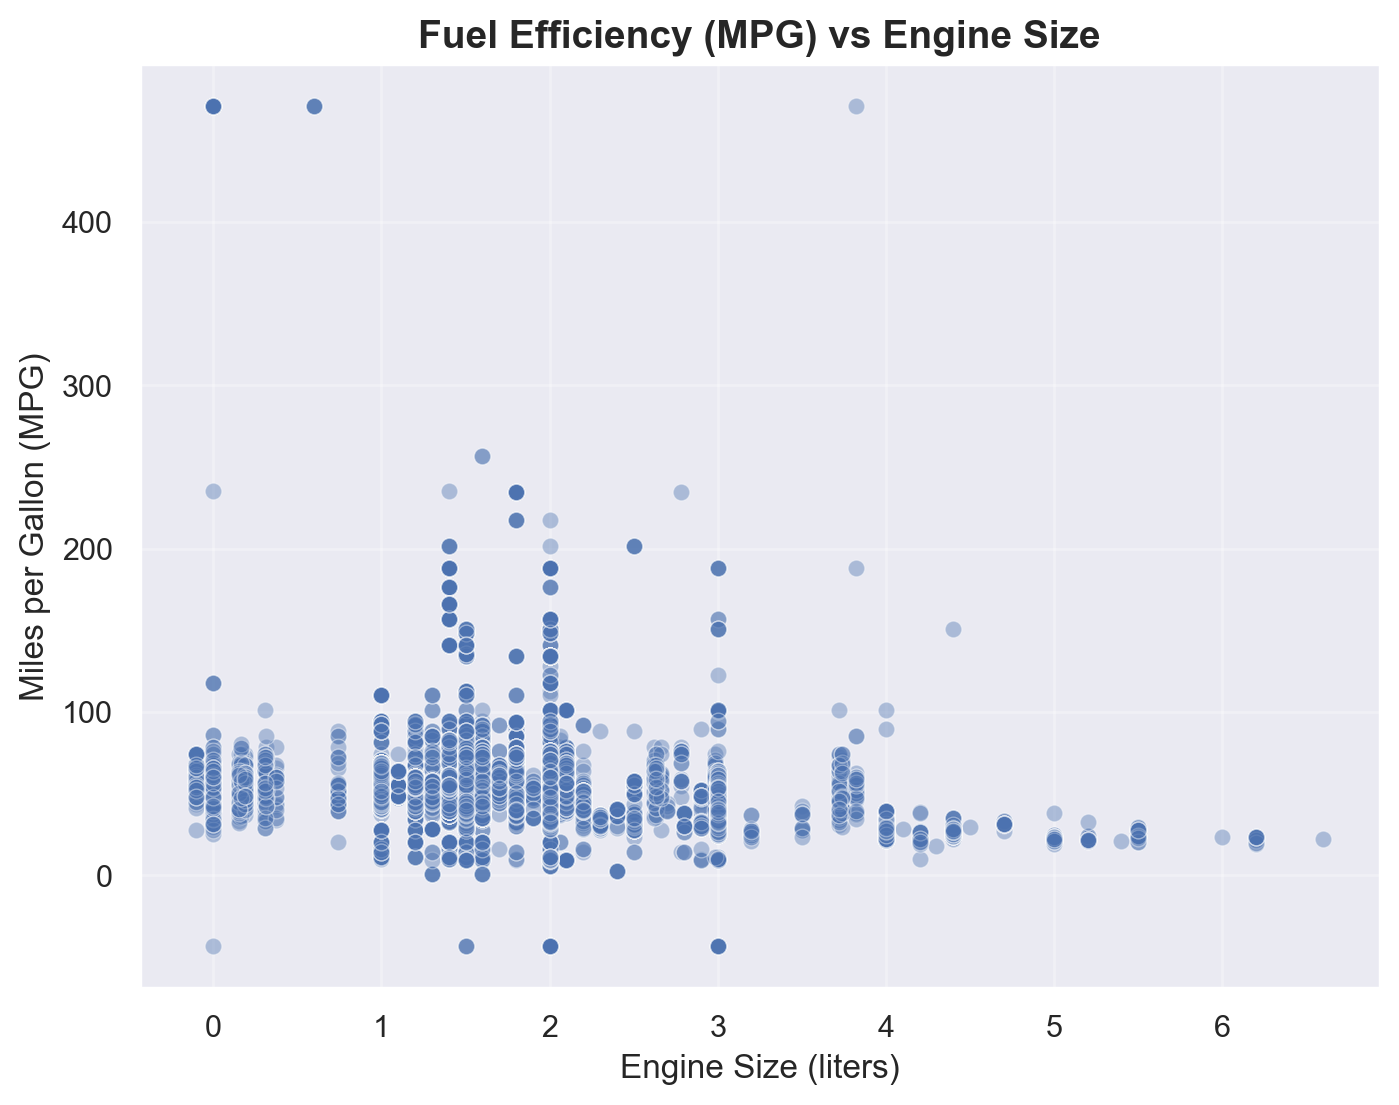

In [19]:
plt.figure(figsize=(8,6))

sns.scatterplot(
    x="engineSize",
    y="mpg",
    data=df,
    alpha=0.4
)

plt.title("Fuel Efficiency (MPG) vs Engine Size", fontsize=14, fontweight="bold")
plt.xlabel("Engine Size (liters)", fontsize=12)
plt.ylabel("Miles per Gallon (MPG)", fontsize=12)
plt.grid(alpha=0.3)

plt.show()


- The plot confirms a clear inverse relationship between engine size and fuel efficiency: cars with larger engines generally achieve lower MPG, reflecting higher fuel consumption.

- Most vehicles cluster between 1.0 L and 2.0 L, where MPG values are relatively high and stable, indicating this range represents the most common and efficient engine sizes.

- Outliers are visible at both extremes - very small engines (< 1 L) or large engines (> 4 L) show unusually low or high MPG values, which could correspond to data inconsistencies or different models (hybrids(?)).

Overall, the relationship aligns with automotive efficiency principles: smaller engines prioritize economy, while larger engines trade MPG for performance and power.

## 3.2 Previous Ownners vs Mileage

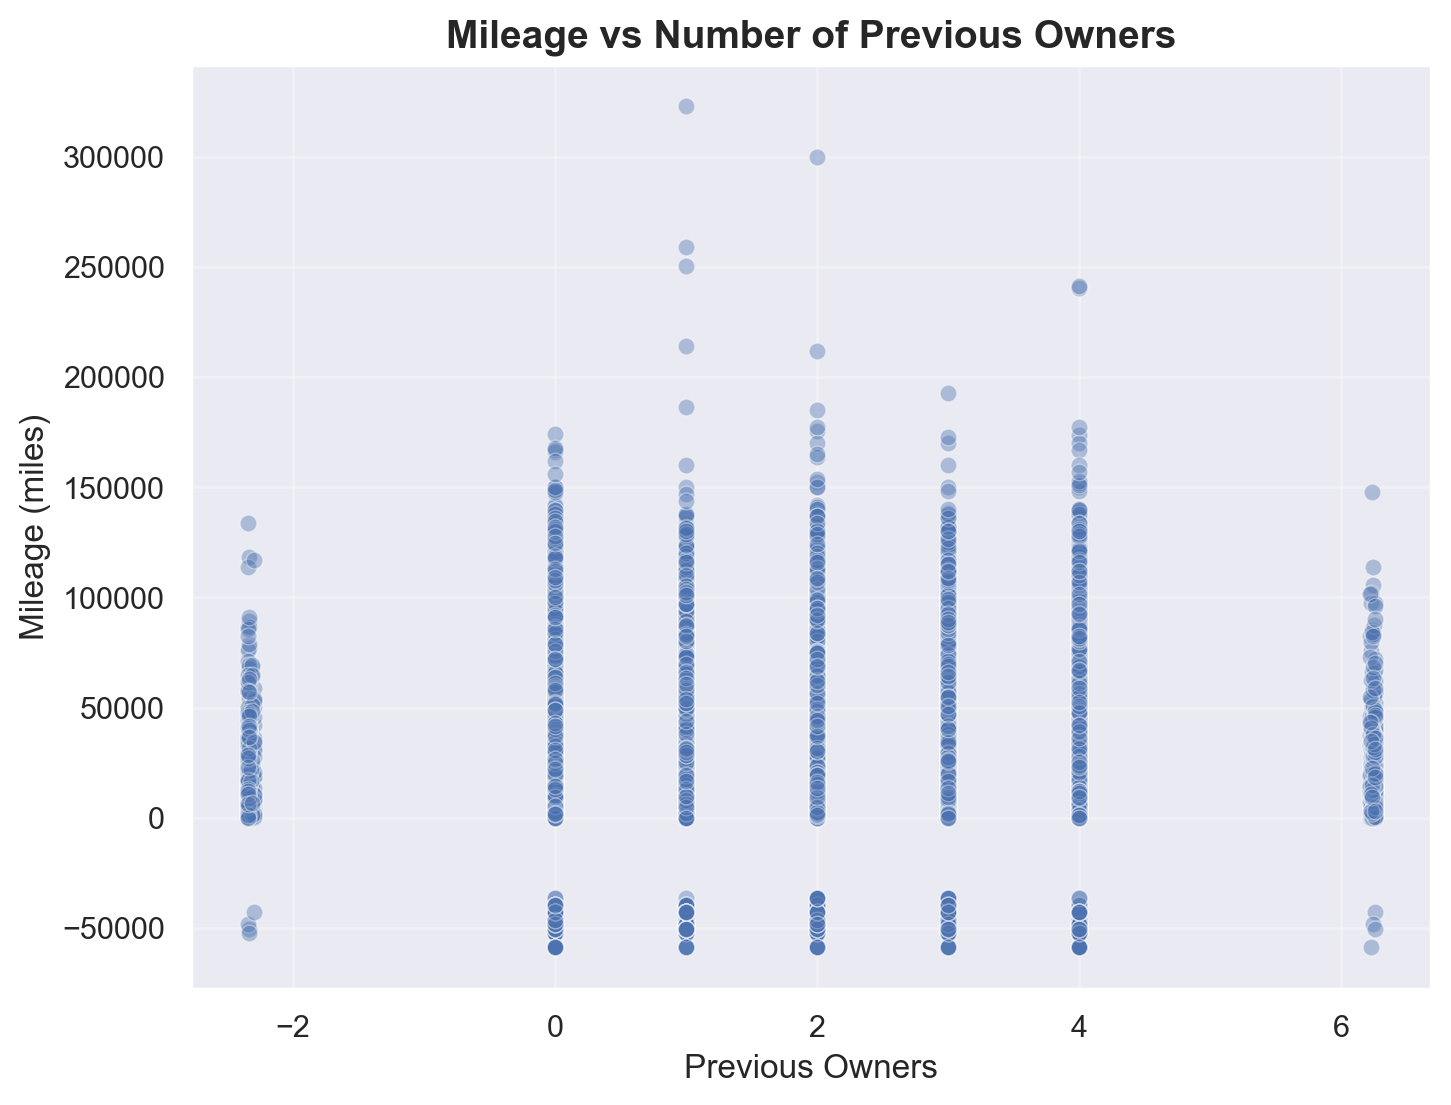

In [20]:
plt.figure(figsize=(8,6))

sns.scatterplot(
    x="previousOwners",
    y="mileage",
    data=df,
    alpha=0.4
)

plt.title("Mileage vs Number of Previous Owners", fontsize=14, fontweight="bold")
plt.xlabel("Previous Owners", fontsize=12)
plt.ylabel("Mileage (miles)", fontsize=12)
plt.grid(alpha=0.3)

plt.show()


- The plot shows a slight positive trend: more previous owners generally mean higher mileage.

- Negative values for mileage and owners indicate data errors that must be corrected.

- The wide spread suggests mileage depends on other factors too, not just ownership count.

# 4. Categorical Bivariate Analysis

## 4.1 Brand vs Transmission

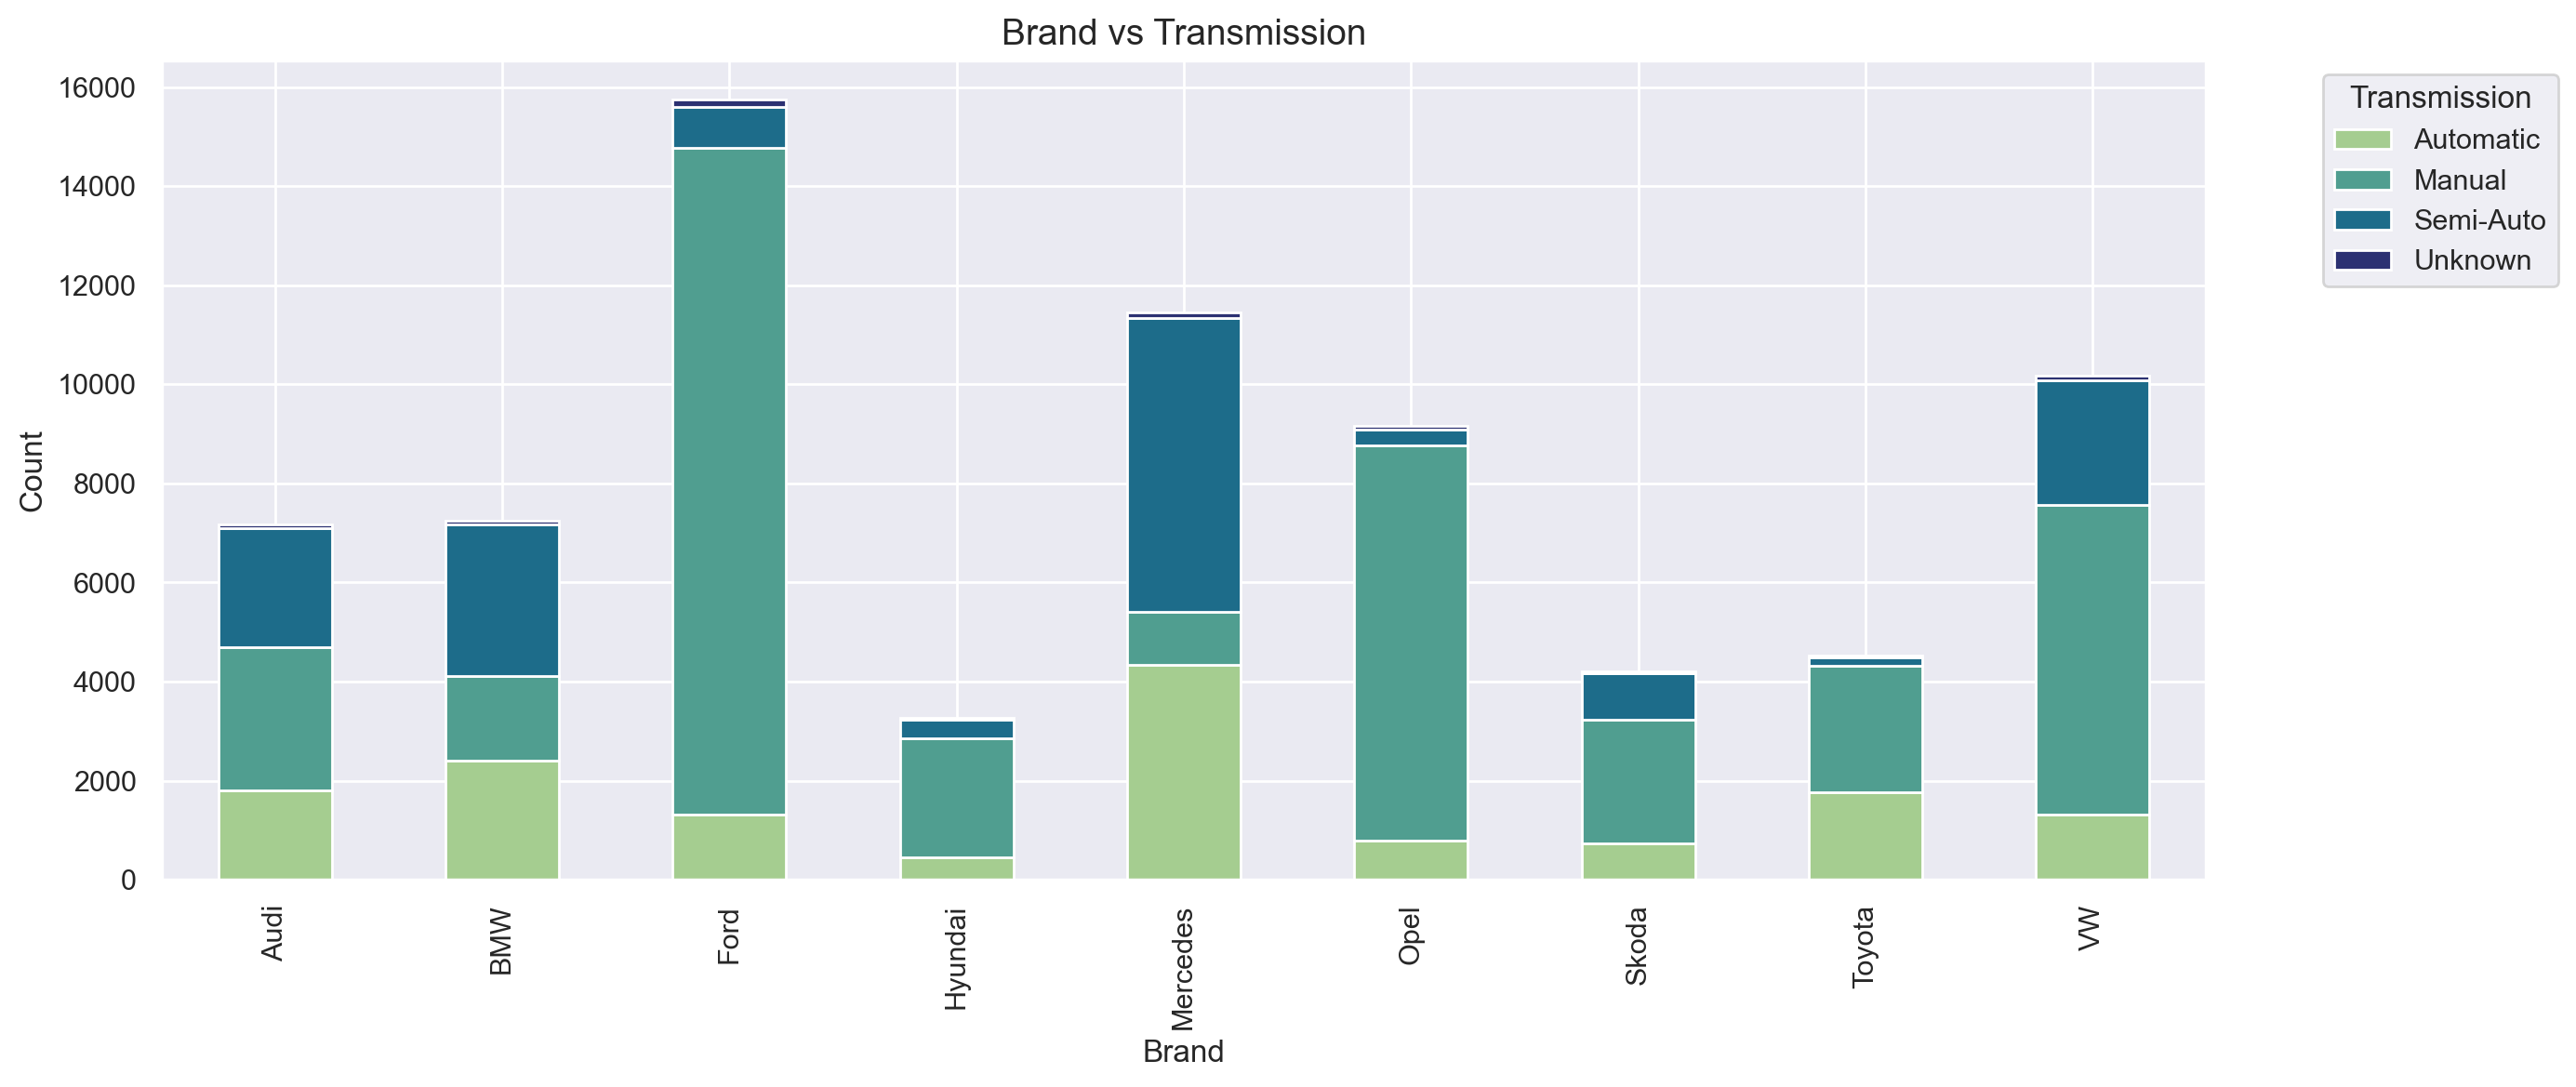

In [21]:
ct1 = pd.crosstab(df["Brand"], df["transmission"])
ct1.plot(kind="bar", stacked=True, figsize=(14, 6), colormap="crest")

plt.title("Brand vs Transmission", fontsize=14)
plt.xlabel("Brand")
plt.ylabel("Count")
plt.legend(title="Transmission", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()


- There is a clear predominance of **Manual Transmission** across most brands, particularly **Ford**, **Opel**, and **Volkswagen**.  
  
- **Mercedes** stands out with a predominance of **Semi-Automatic** and **Automatic** transmissions, while **Manual** is almost residual — the opposite of the overall trend.  
- **Hyundai** has very few **Semi-Automatic** or **Automatic** cars, showing a strong bias toward **Manual** transmissions.  
- In **Audi**, the distribution is more balanced across the different transmission types.

## 4.2  Brand vs Fuel Type

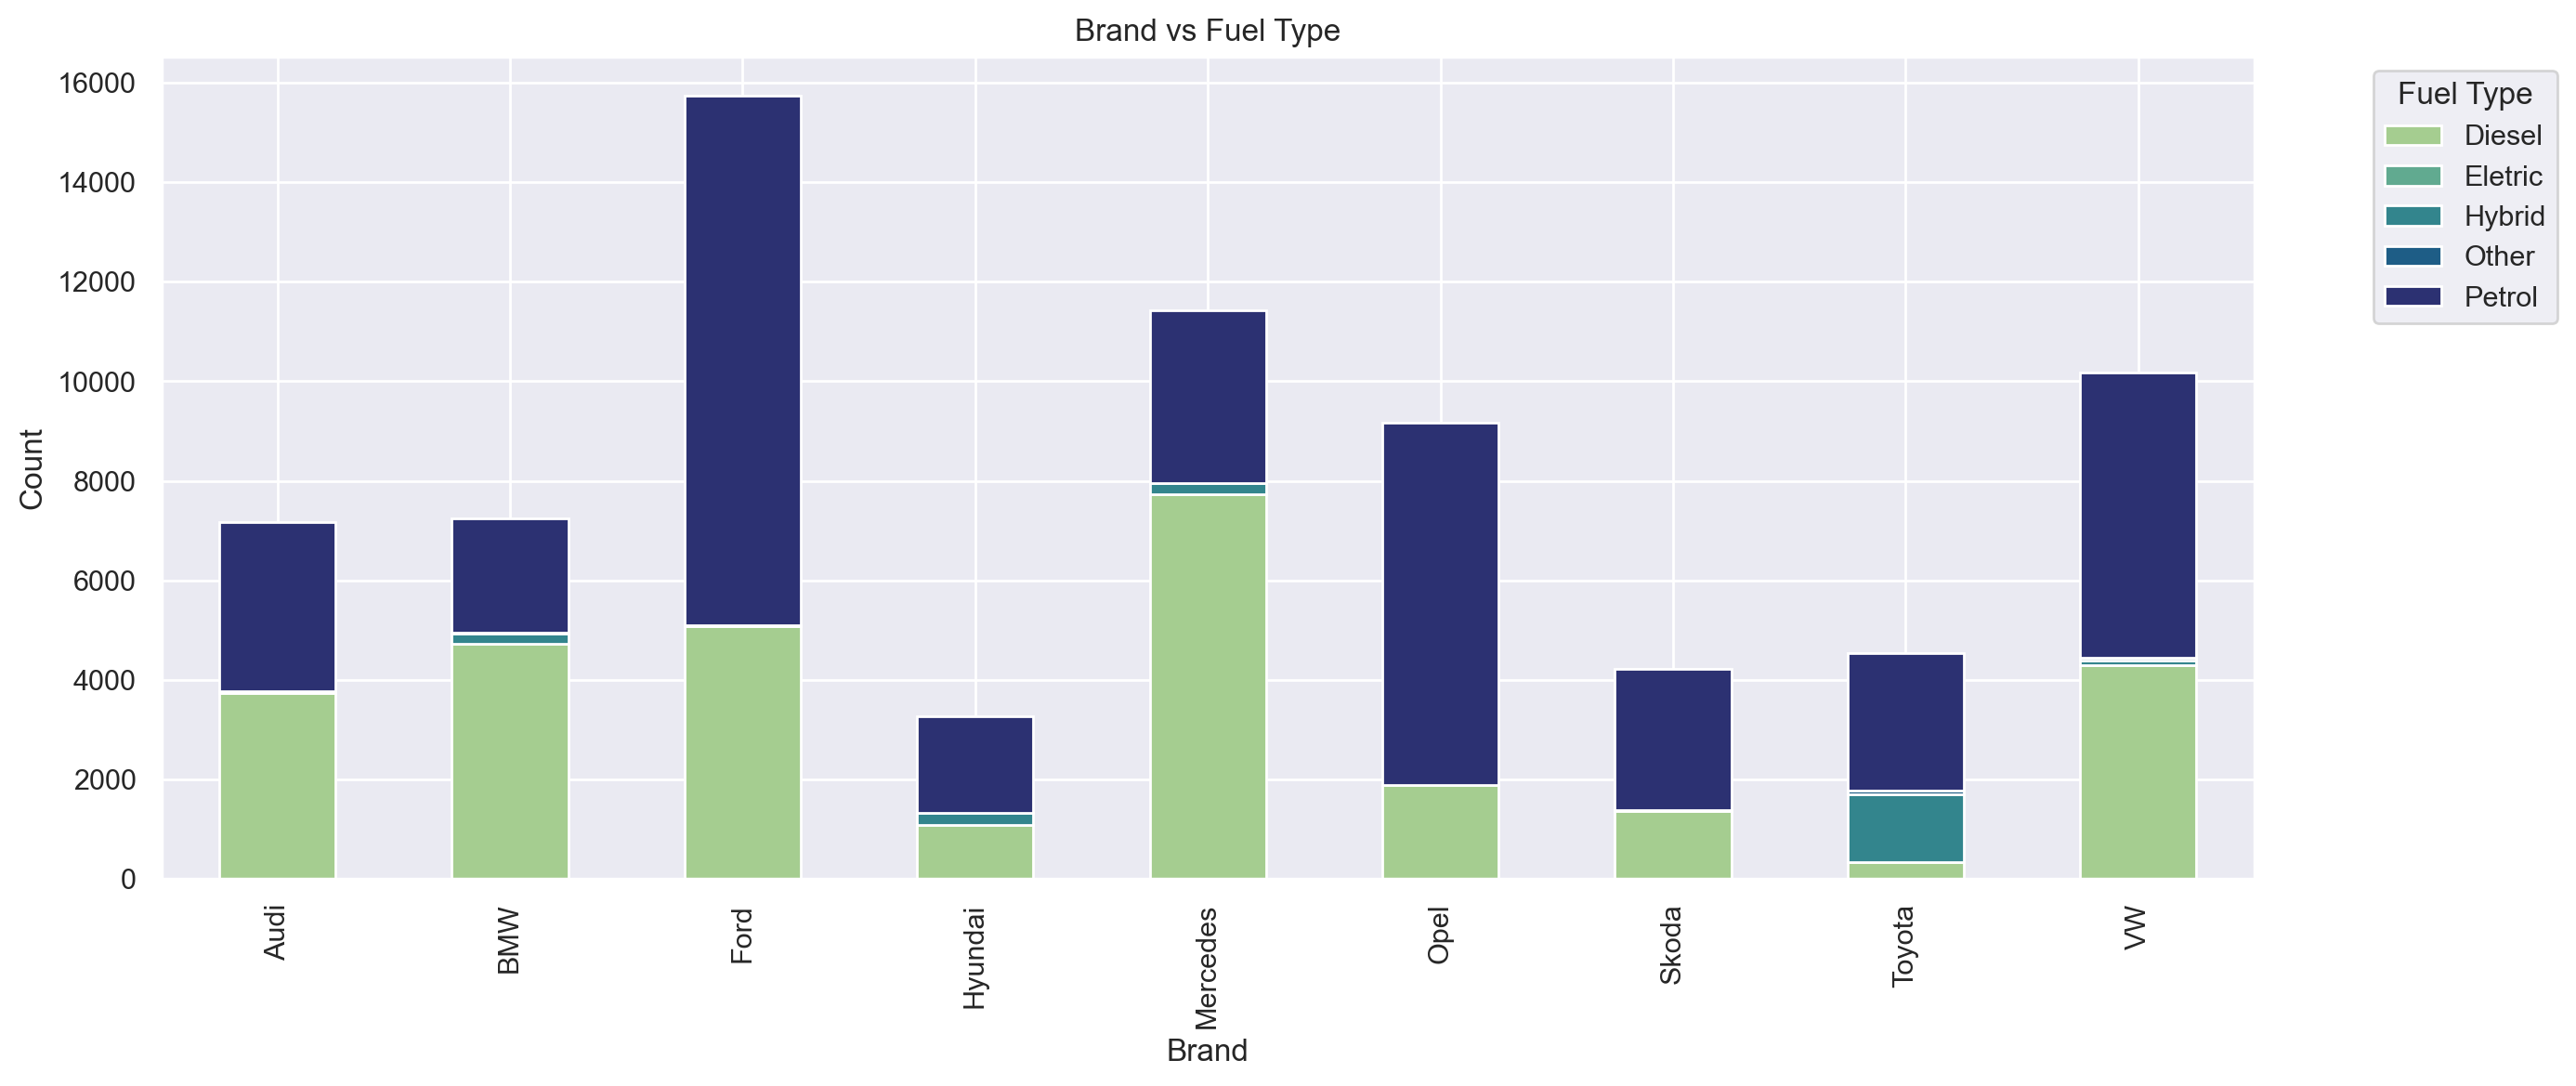

In [22]:
ct2 = pd.crosstab(df["Brand"], df["fuelType"])
ct2.plot(kind="bar", stacked=True, figsize=(14, 6), colormap="crest")
plt.title("Brand vs Fuel Type")
plt.xlabel("Brand")
plt.ylabel("Count")
plt.legend(title="Fuel Type", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

- **Hybrid** vehicles have a meaningful presence primarily within **Toyota**; beyond that, they appear only modestly in **BMW**, **Hyundai**, and **Mercedes**.  
  
- As with transmission types, **Audi** shows the most **balanced** distribution across fuel types.  
- **Petrol** predominates especially in **Ford**, **Opel**, and **Volkswagen** — the same brands where **Manual Transmission** also dominated in the previous chart.  
- **Diesel** is most prevalent in **Mercedes**, followed by **BMW**, mirroring the earlier pattern where **Semi-Automatic** transmissions were more common.  
- We therefore expect a **positive association** between **Manual Transmission** and **Petrol**, and between **Diesel** and **Semi-Automatic**. We will assess this formally below.

## 4.3  Transmission vs Fuel Type

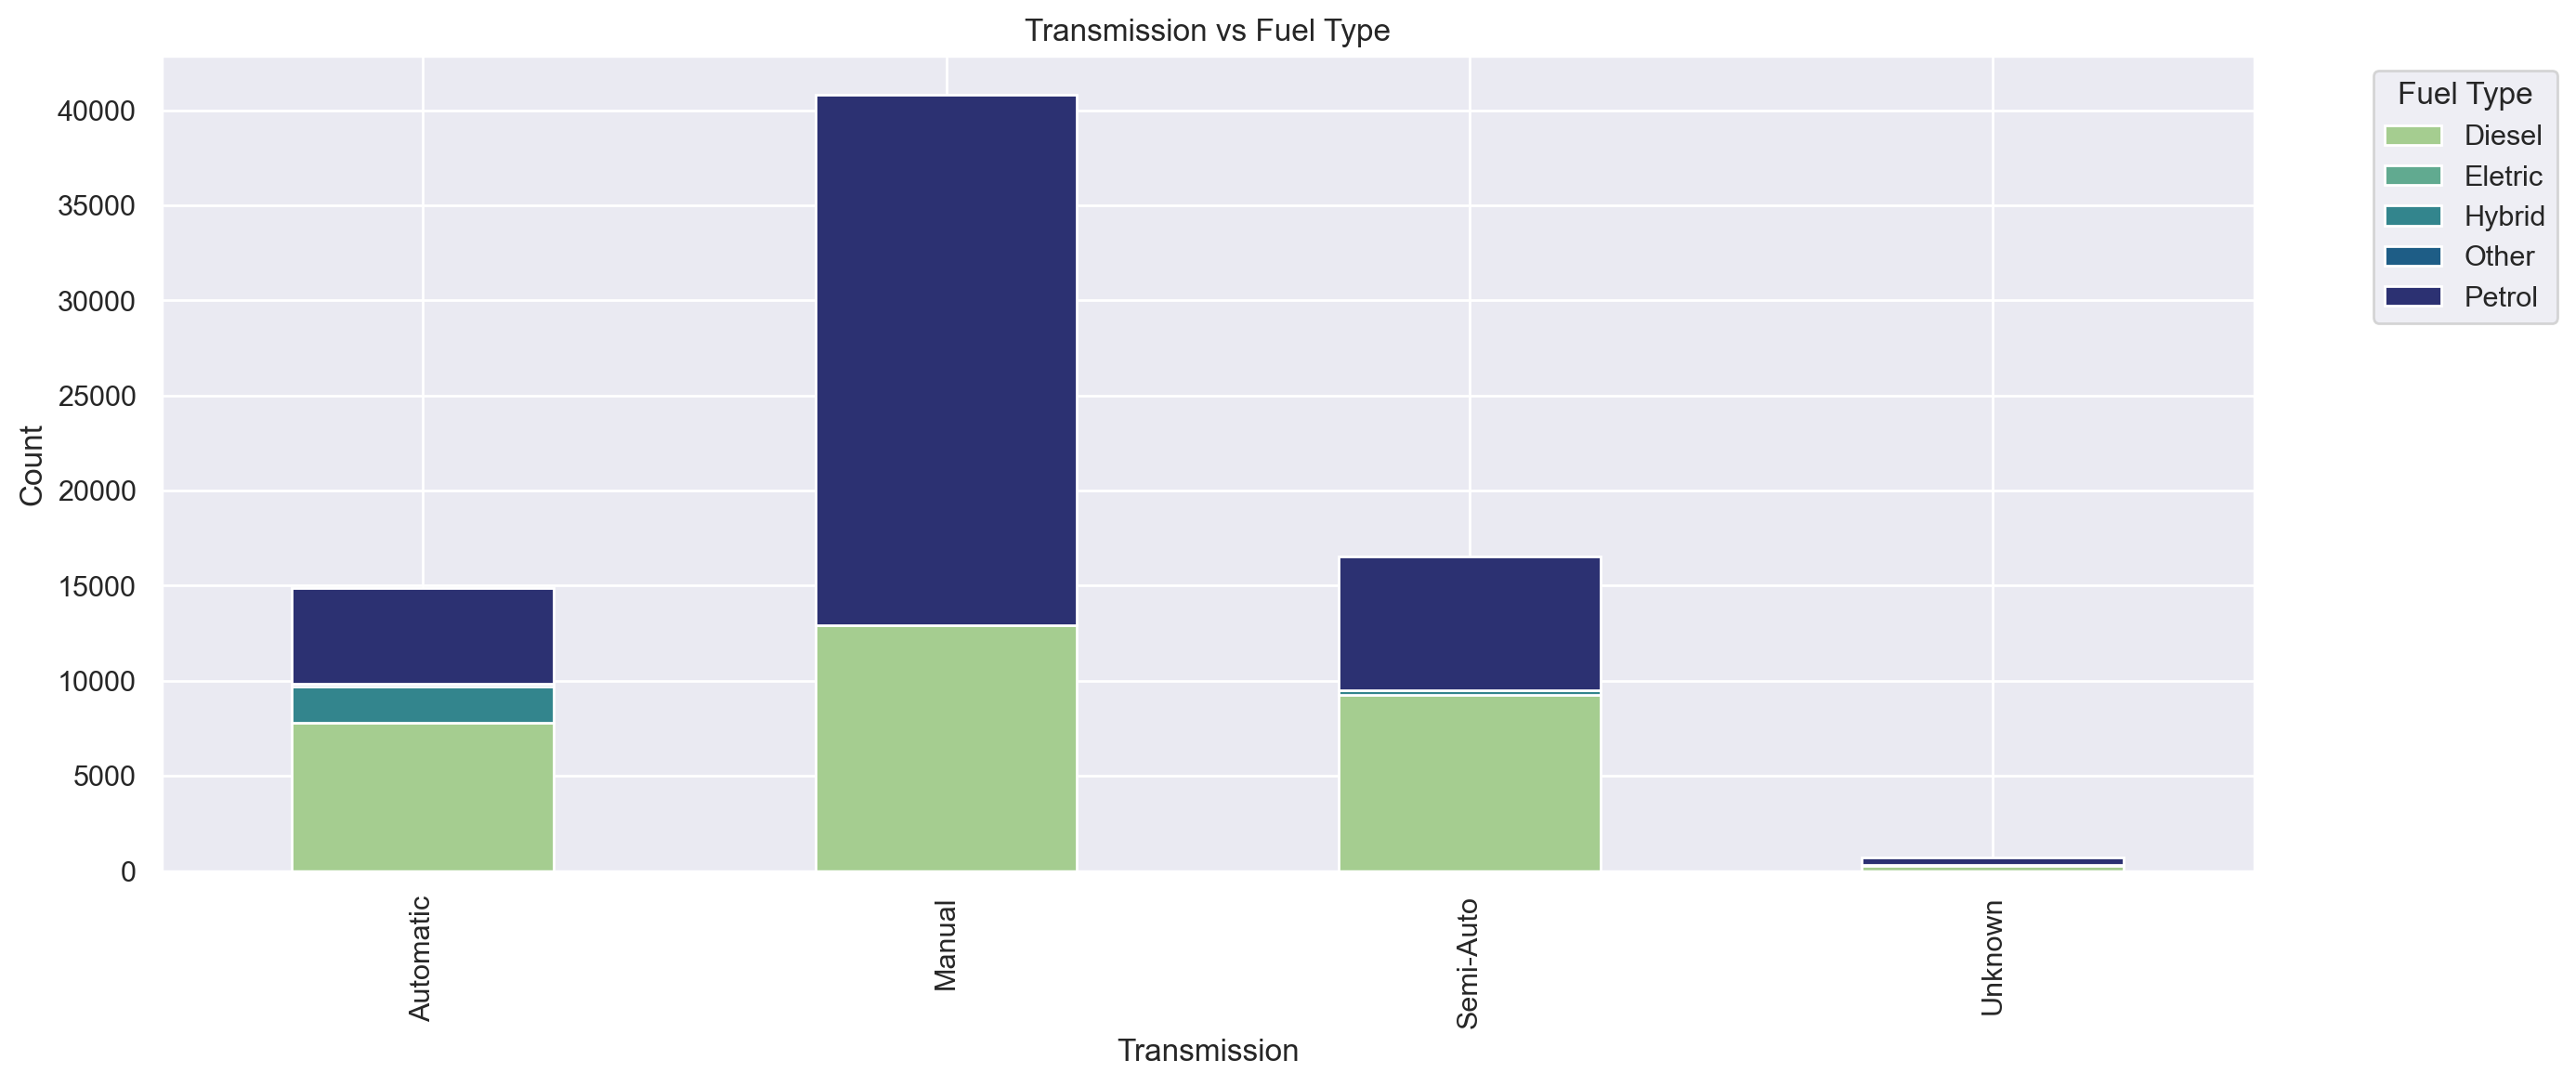

In [23]:
ct3 = pd.crosstab(df["transmission"], df["fuelType"])
ct3.plot(kind="bar", stacked=True, figsize=(14, 6), colormap="crest")
plt.title("Transmission vs Fuel Type")
plt.xlabel("Transmission")
plt.ylabel("Count")
plt.legend(title="Fuel Type", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

- As expected, there is a high proportion of **Manual Transmission** cars that are also **Petrol** vehicles. However, the proportion of **Manual Diesel** cars is also non-negligible.  
 
- For **Semi-Automatic** cars, although **Diesel** is slightly predominant, the proportions across fuel types are relatively balanced.
- While a correlation mentioned above can be observed, it appears weaker than initially expected.
- **Hybrid** cars are only statistically significant within the **Automatic** transmission group, although they remain less common than both **Diesel** and **Petrol** vehicles.

# 5. Bivariate Analysis (Categorical vs. Numeric)

## 5.1 Categorical Against the Target

### 5.1.1 Fuel Type

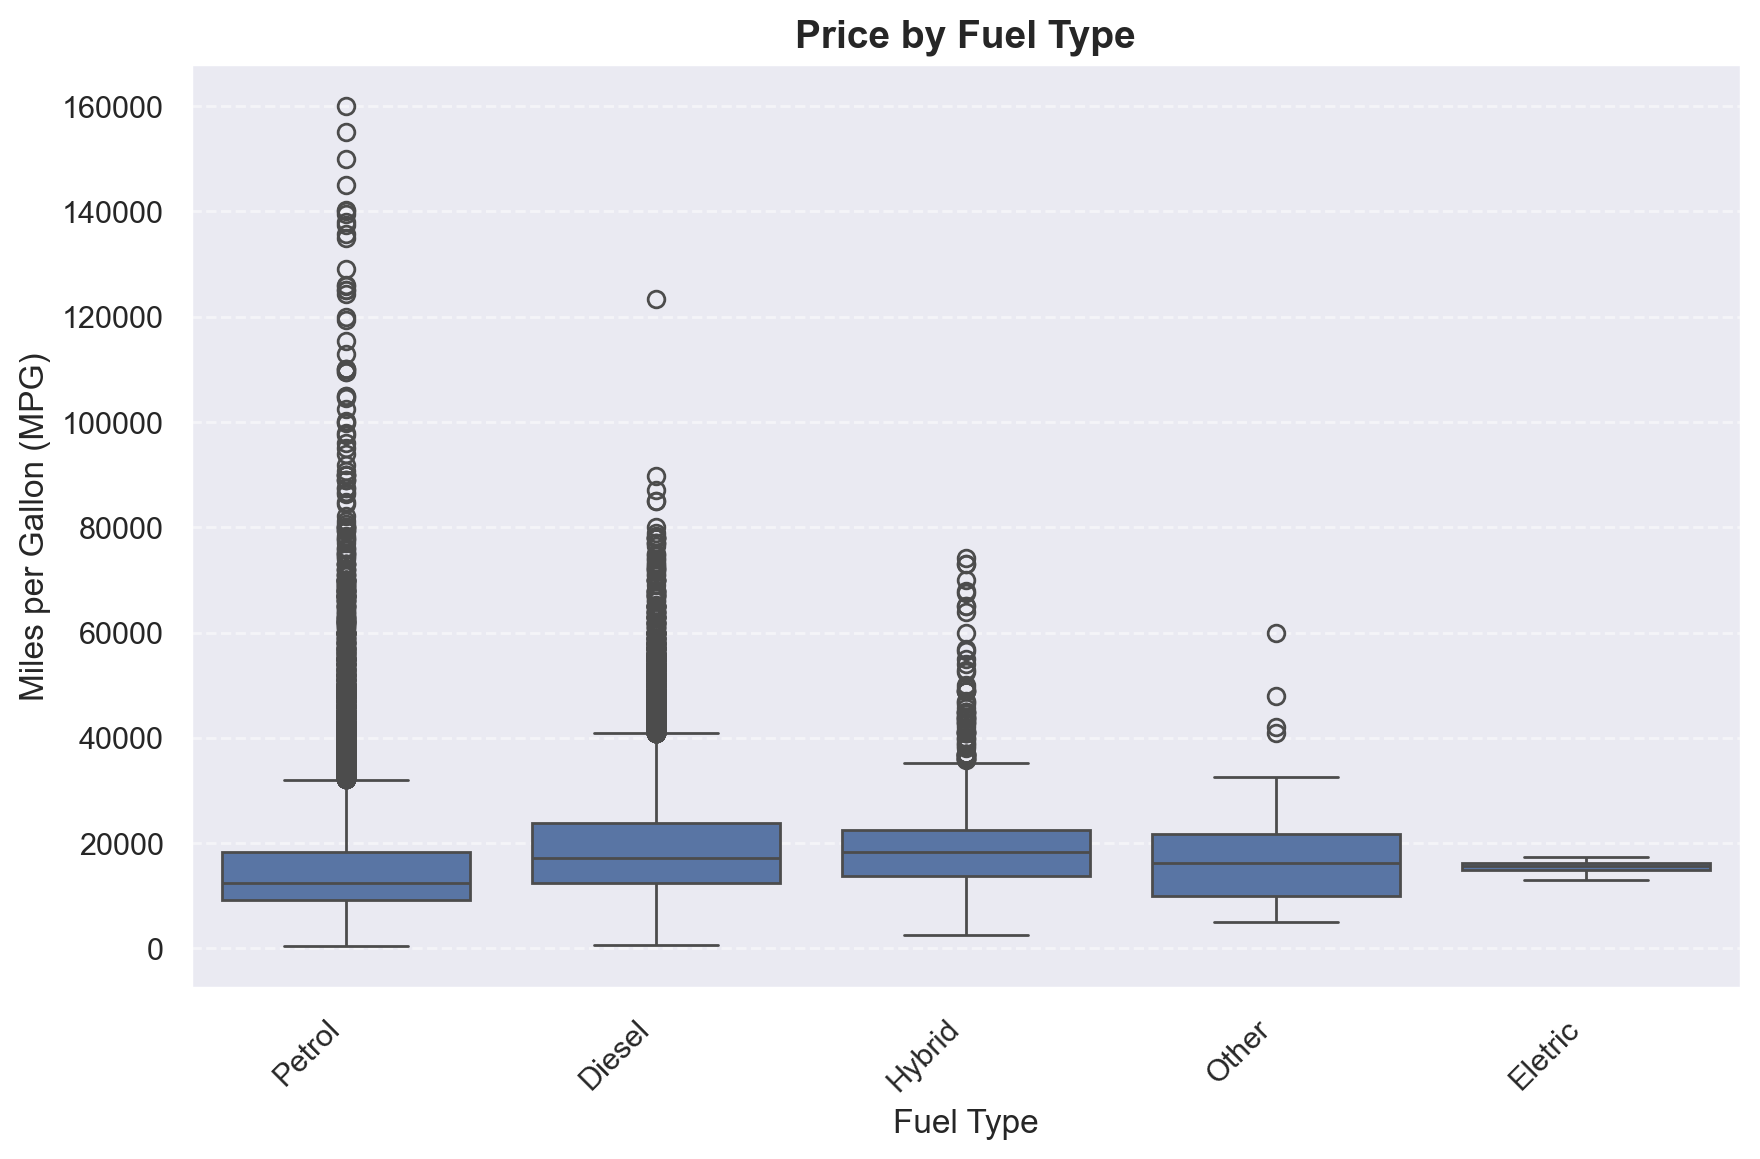

In [24]:
plt.figure(figsize=(10, 6))

sns.boxplot(
    x="fuelType",
    y="price",
    data=df
)

plt.title("Price by Fuel Type", fontsize=14, fontweight="bold")
plt.xlabel("Fuel Type", fontsize=12)
plt.ylabel("Miles per Gallon (MPG)", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y", linestyle="--", alpha=0.5)

plt.show()


- Electric cars show **very low standard deviation**, with prices **tightly clustered** around the median
- The **median price** of electric vehicles is **similar to other fuel types**
- Petrol cars have a **slightly lower median price** compared to other fuel types, but exhibit **significantly more outliers**, indicating greater price variability
- The **tight distribution** in electric cars suggests **more standardized pricing**
- The **wide spread** in petrol cars reflects a **broader range of models** across different price segments

### 5.1.2 Transmission

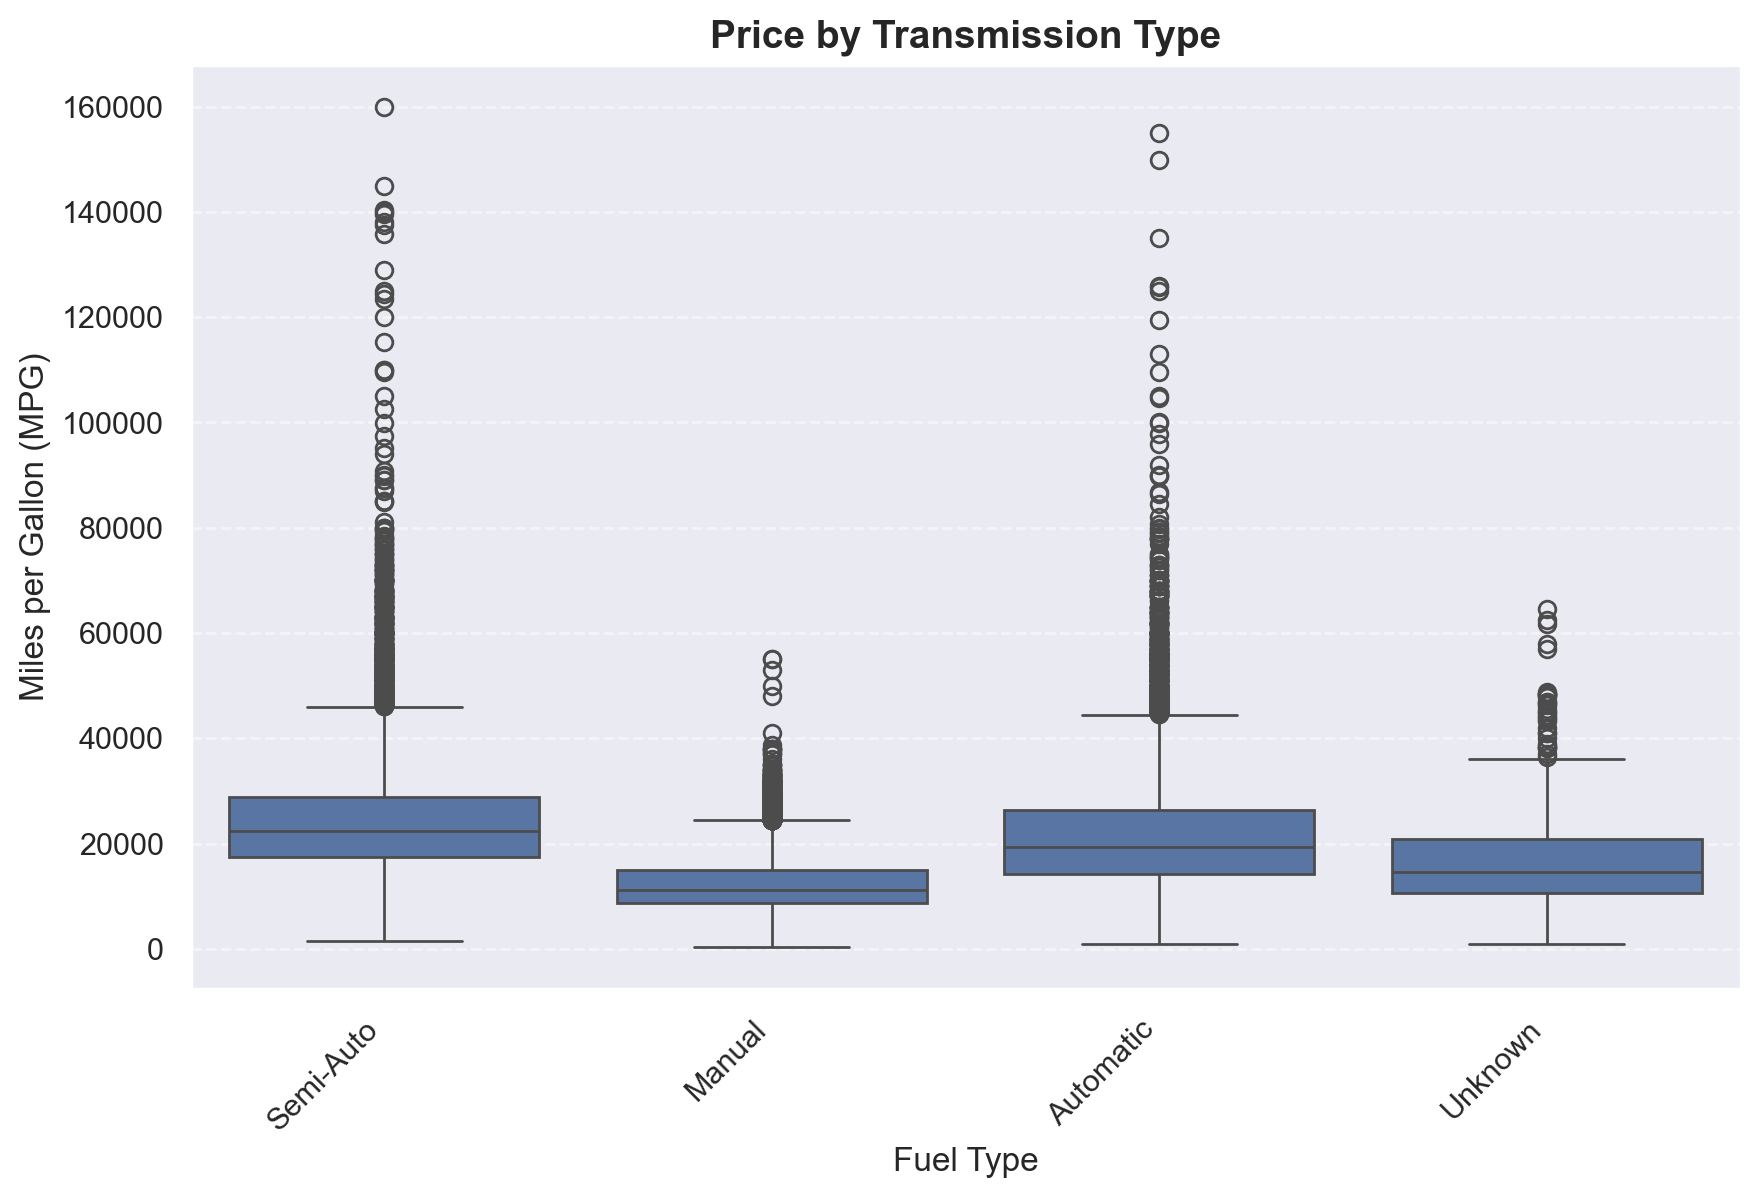

In [25]:
plt.figure(figsize=(10, 6))

sns.boxplot(
    x="transmission",
    y="price",
    data=df
)

plt.title("Price by Transmission Type", fontsize=14, fontweight="bold")
plt.xlabel("Fuel Type", fontsize=12)
plt.ylabel("Miles per Gallon (MPG)", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y", linestyle="--", alpha=0.5)

plt.show()


- **Manual transmission vehicles** have a **noticeably lower median price** compared to other transmission types
- **Semi-automatic and automatic transmissions** exhibit **nearly identical price distributions**
- The **price difference** suggests manual transmissions are associated with **more budget-oriented models**
- **Automatic and semi-automatic vehicles** cluster at **similar price points**, indicating **comparable market positioning**

### 5.1.3 Brand

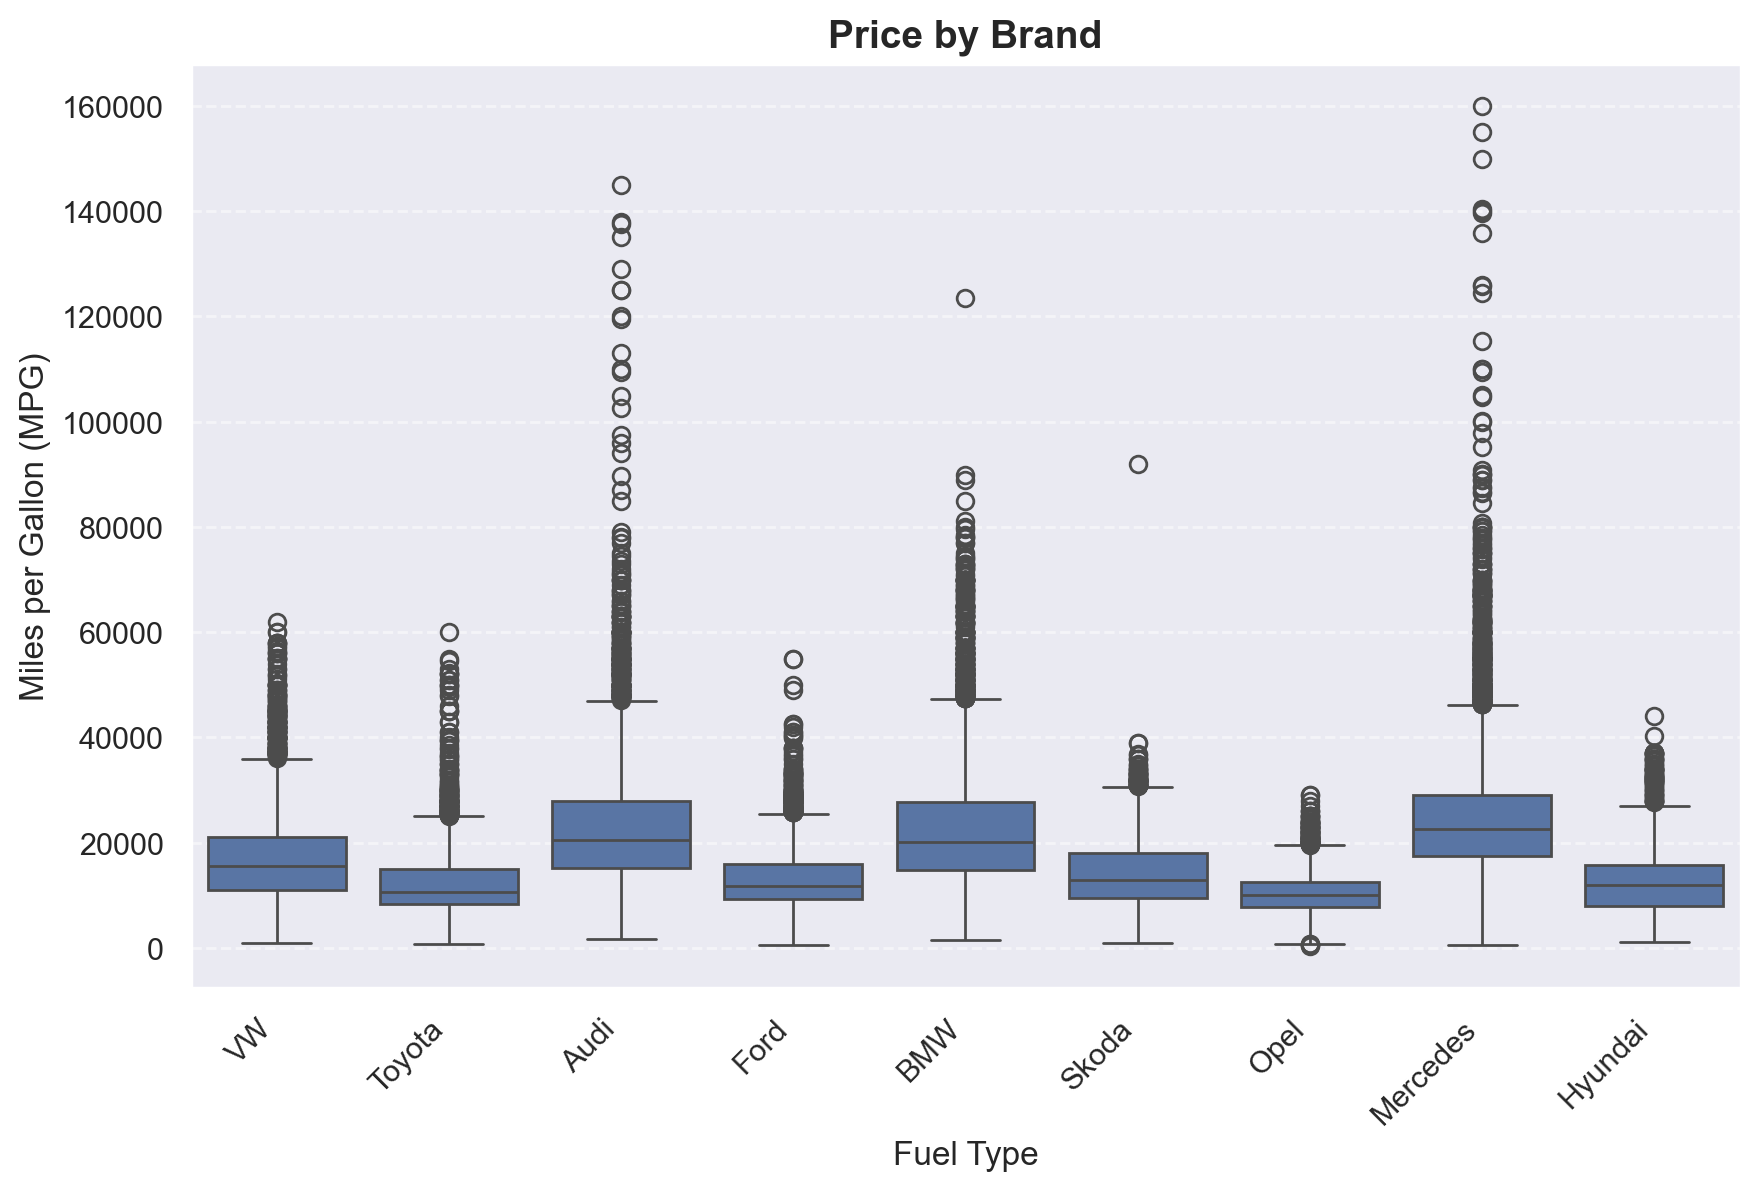

In [26]:
plt.figure(figsize=(10, 6))

sns.boxplot(
    x="Brand",
    y="price",
    data=df
)

plt.title("Price by Brand", fontsize=14, fontweight="bold")
plt.xlabel("Fuel Type", fontsize=12)
plt.ylabel("Miles per Gallon (MPG)", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y", linestyle="--", alpha=0.5)

plt.show()


- **Clear price segmentation** exists across brands, reflecting their **market positioning**
- **Audi, BMW, and Mercedes** consistently show the **highest median prices**, representing the **premium/luxury segment**
- **Ford, Toyota, and Opel** cluster at the **lower end of the price spectrum**, targeting **budget-conscious consumers**
- **Volkswagen, Hyundai, and Skoda** occupy the **mid-range segment**, balancing **affordability and features**
- This distribution mirrors **real-world market hierarchies** and **brand perceptions**
- **Brand** is expected to be a **strong predictor** in our regression model due to these **distinct price tiers**

### 5.1.4 Model

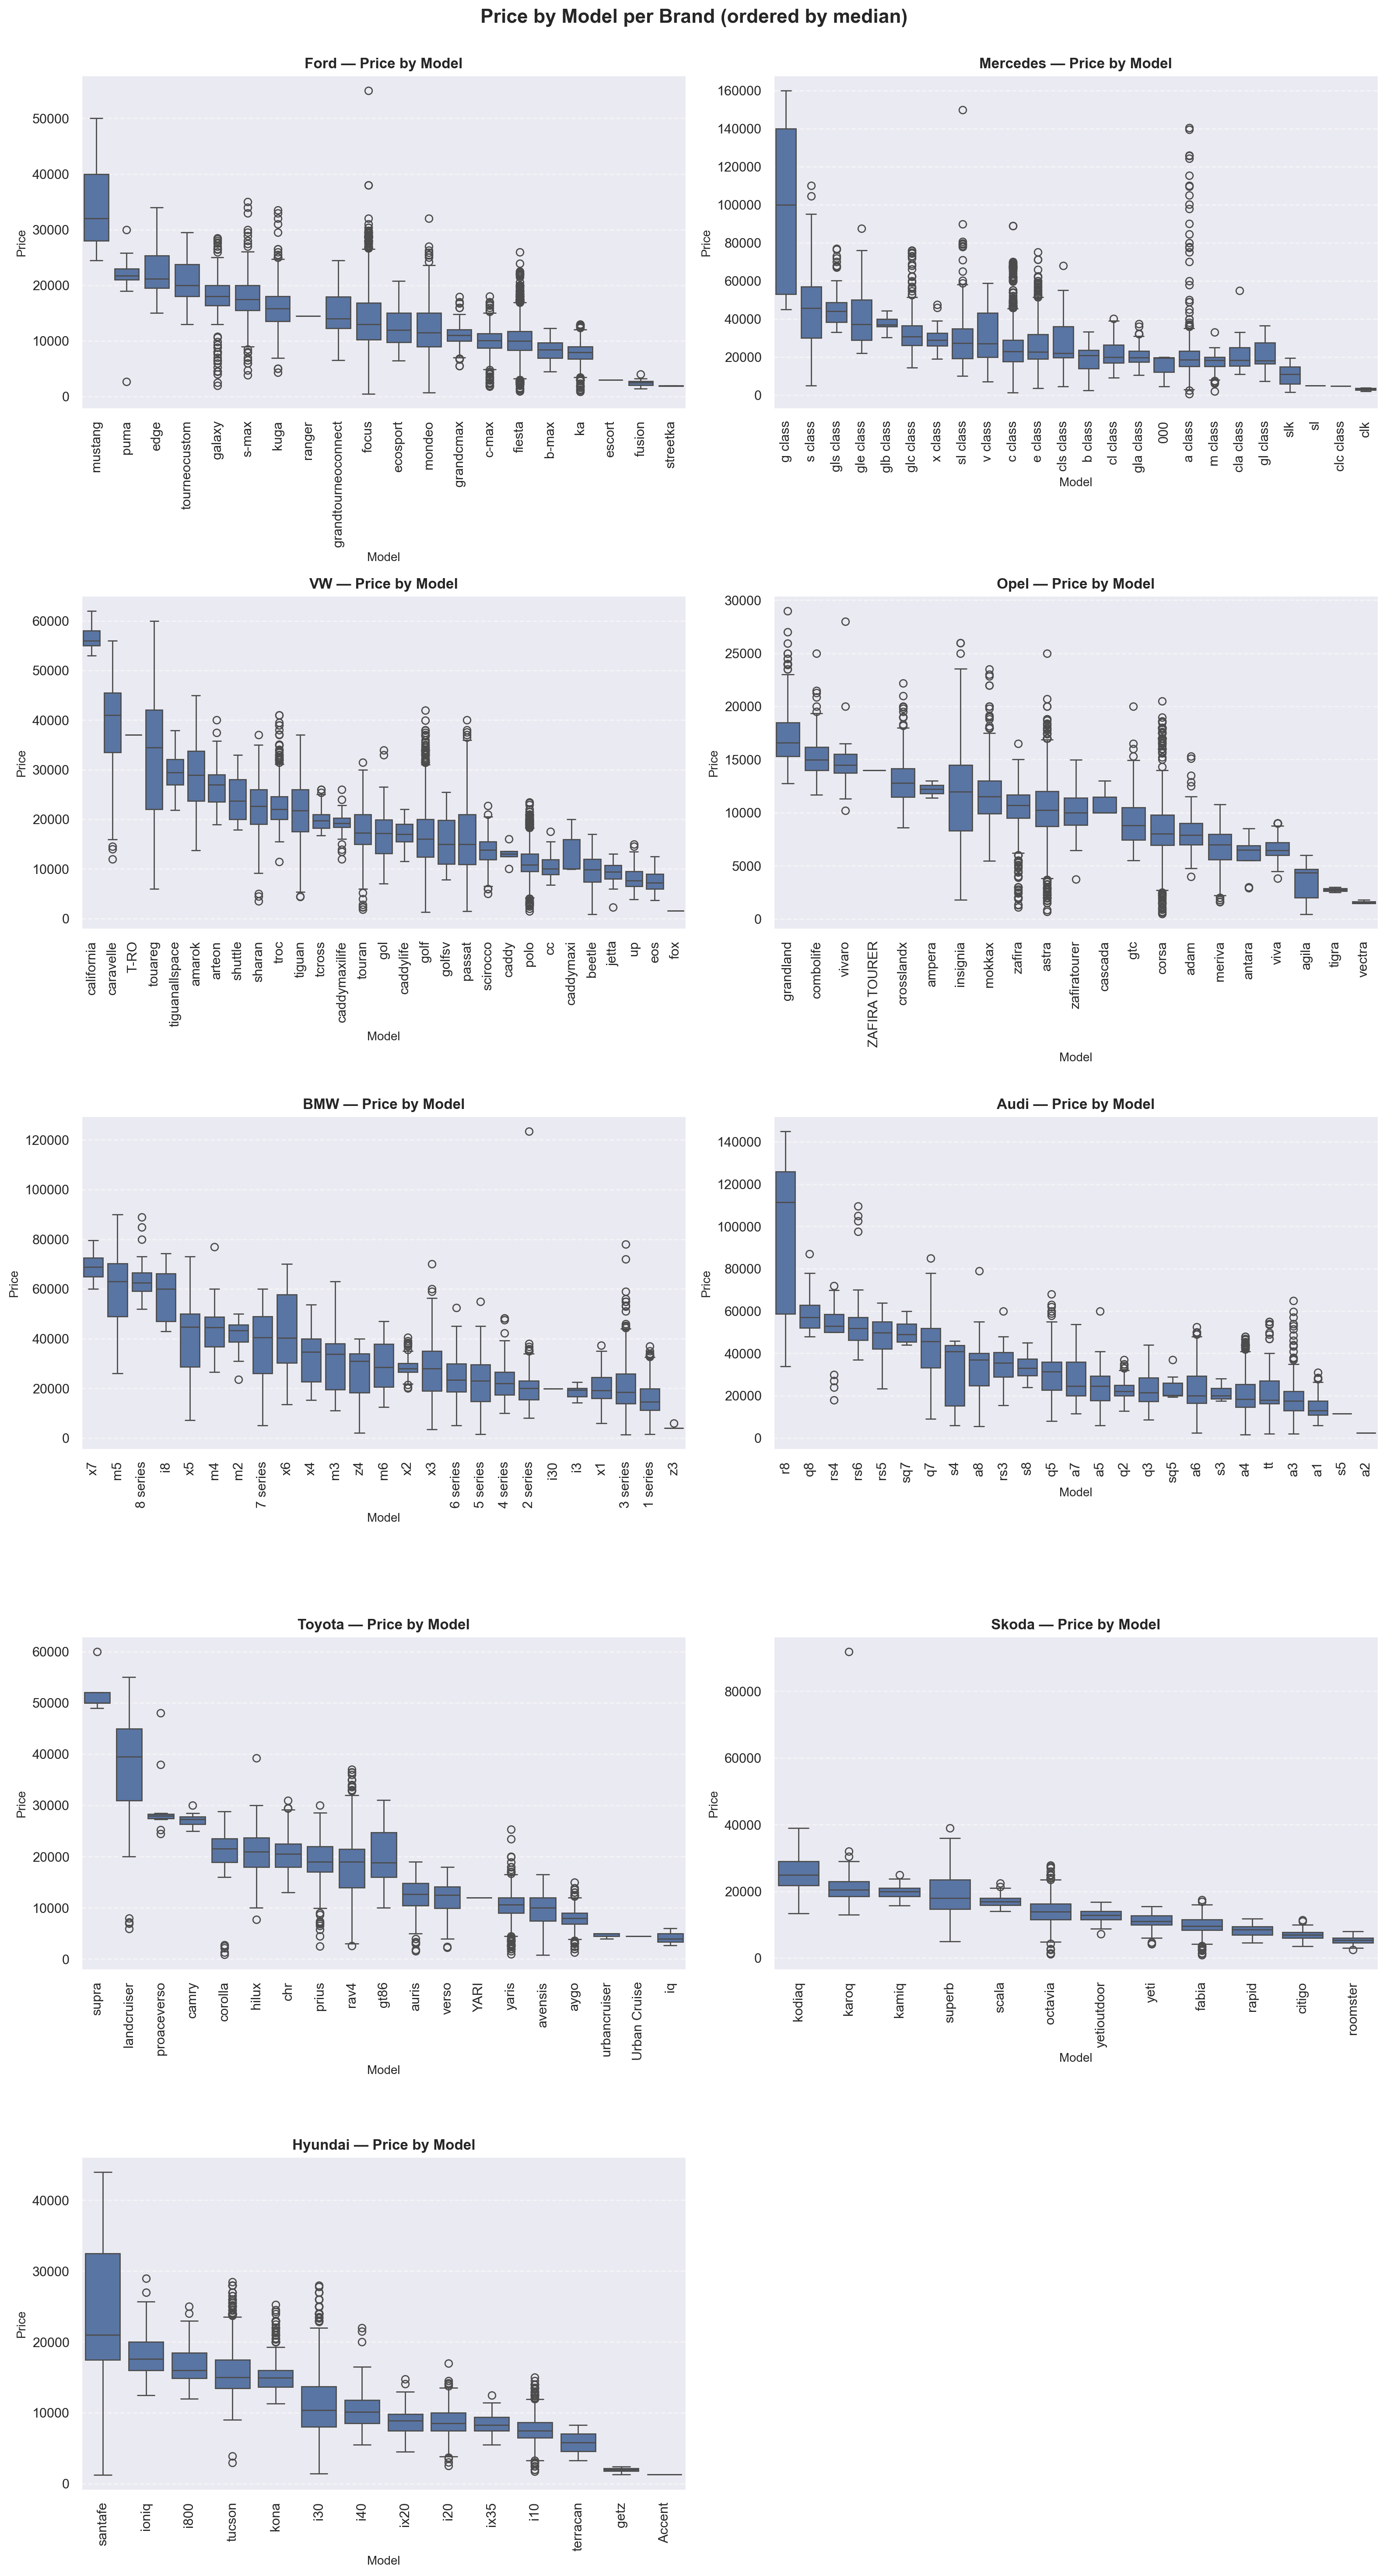

In [27]:
brands = df["Brand"].value_counts().index

cols = 2
rows = ceil(len(brands) / cols)

fig, axes = plt.subplots(
    rows,
    cols,
    figsize=(16, 6 * rows)  
)
axes = axes.flatten()

for i, (ax, brand) in enumerate(zip(axes, brands)):
    brand_data = df[df["Brand"] == brand]
    
    model_order = brand_data.groupby("model")["price"].median().sort_values(ascending=False).index
    
    sns.boxplot(
        x="model",
        y="price",
        data=brand_data,
        order=model_order,
        ax=ax
    )
    
    ax.set_title(f"{brand} — Price by Model", fontsize=12, fontweight="bold")
    ax.set_xlabel("Model", fontsize=10)
    ax.set_ylabel("Price", fontsize=10)
    plt.setp(ax.xaxis.get_majorticklabels(), rotation=90)  
    ax.grid(axis="y", linestyle="--", alpha=0.5)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle("Price by Model per Brand (ordered by median)", fontsize=16, fontweight="bold")
plt.tight_layout(rect=[0, 0, 1, 0.98])  
plt.show()

We can observe an significant price heterogeneity across models within the same brand. Each brand maintains distinct price tiers, from entry-level to premium offerings. We expect this to be reflected in our model

## 5.2 Categorical vs Other Numeric

### 5.2.1 Brand vs Mileage

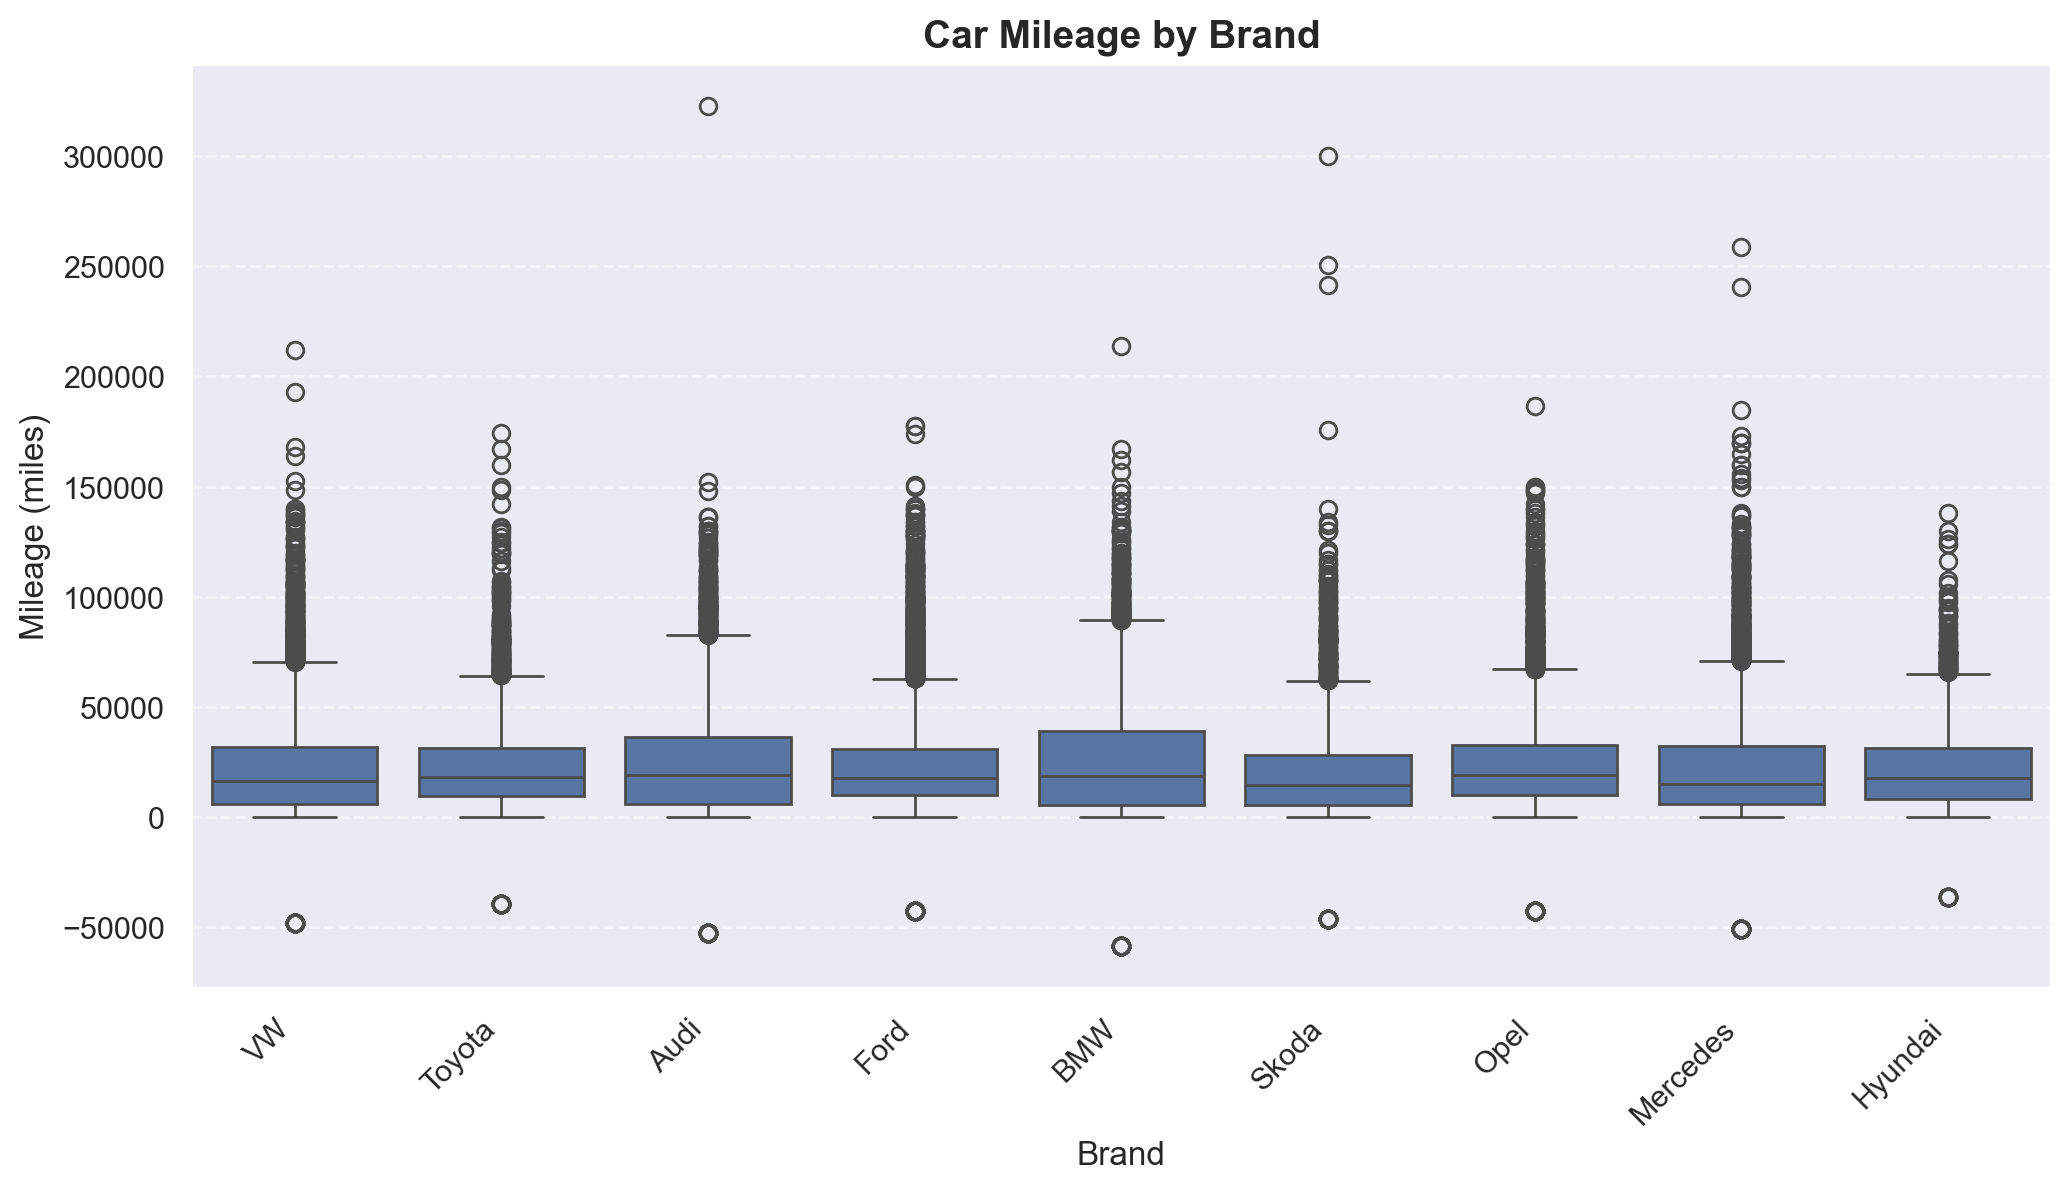

In [28]:
plt.figure(figsize=(12, 6)) 

sns.boxplot(
    x="Brand",
    y="mileage",
    data=df
)

plt.title("Car Mileage by Brand", fontsize=14, fontweight="bold")
plt.xlabel("Brand", fontsize=12)
plt.ylabel("Mileage (miles)", fontsize=12)
plt.xticks(rotation=45, ha="right")  
plt.grid(axis="y", linestyle="--", alpha=0.5)

plt.show()


- The plot shows no strong brand-specific pattern in mileage distribution, most brands have similar medians around 30,000–40,000 miles, suggesting that vehicle usage is fairly consistent across brands

- Several extreme outliers are present, with some cars exceeding 200,000 miles and a few reaching over 300,000 miles.

- A few negative mileage values appear, which are clearly invalid and must be removed during data cleaning.

Overall, the distribution confirms that mileage does not vary significantly by brand, meaning that differences in price between brands are likely driven by brand value and quality perception rather than usage levels.

### 5.2.2 MPG vs Fuel Type

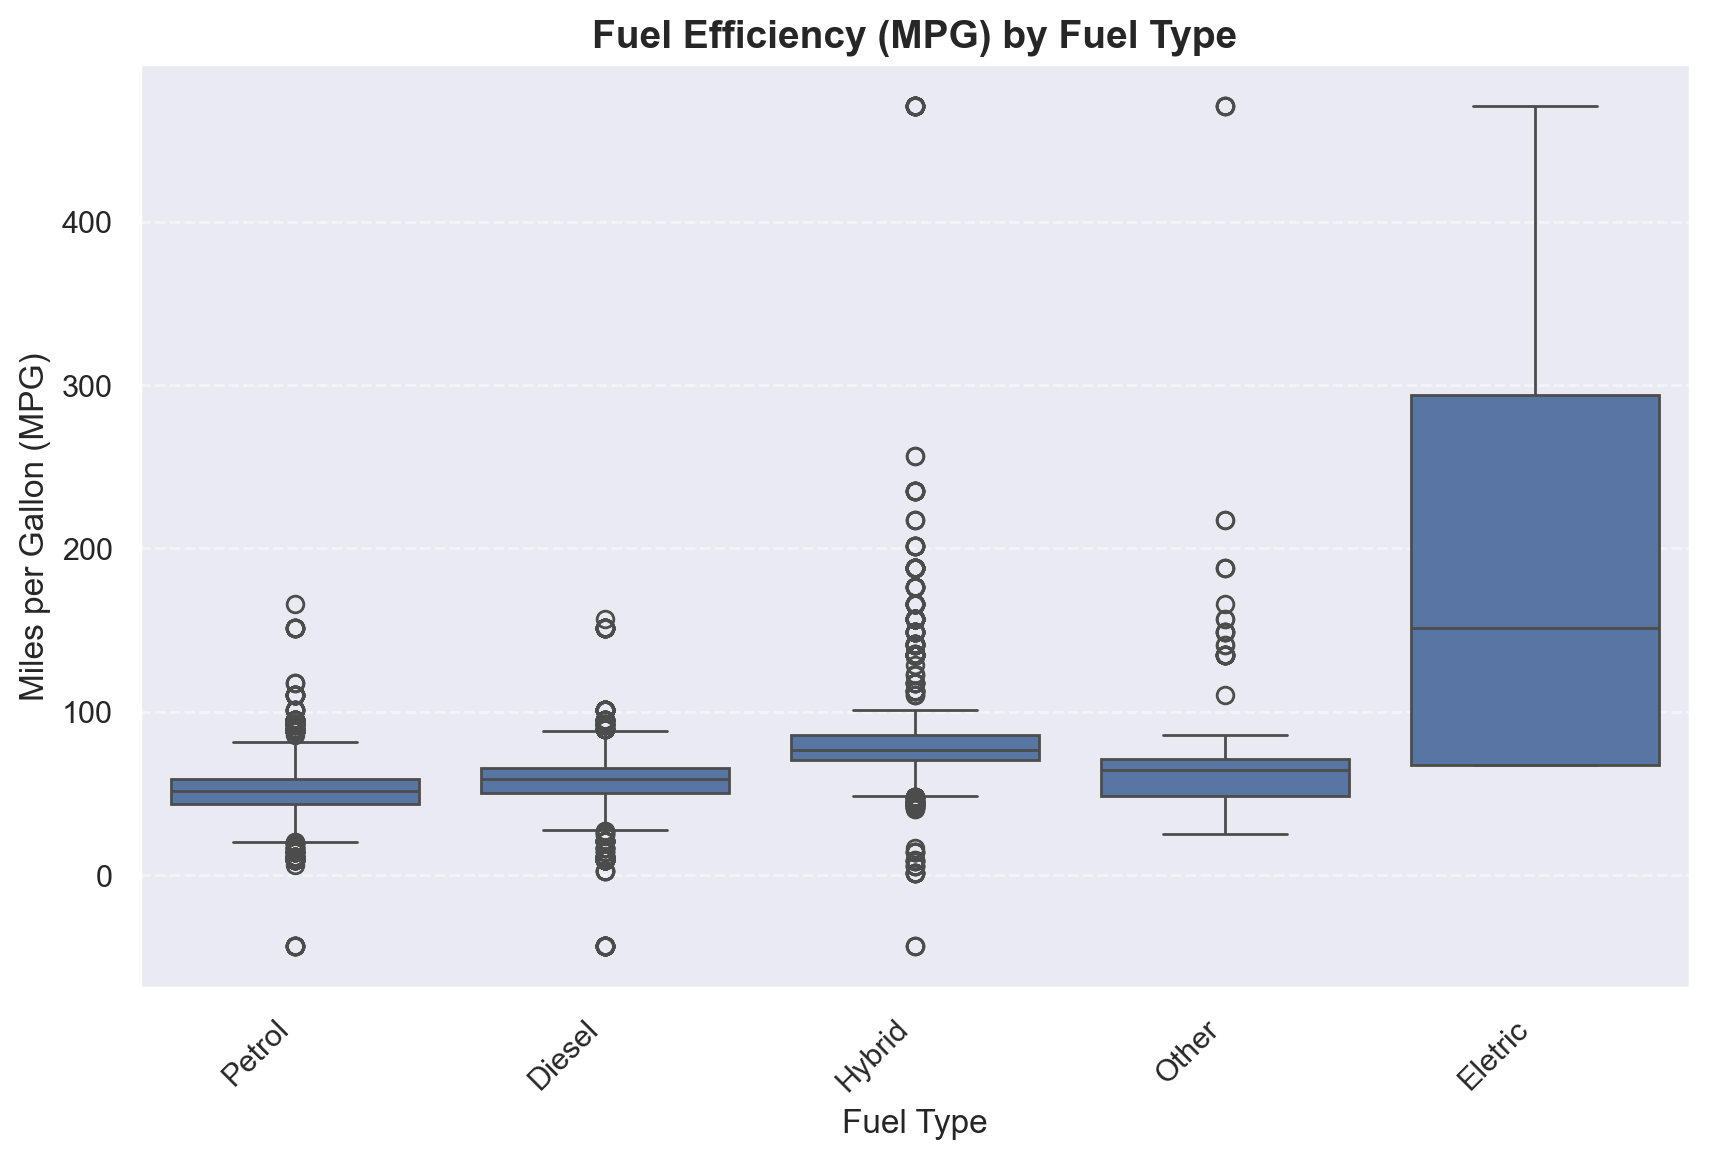

In [29]:
plt.figure(figsize=(10, 6))

sns.boxplot(
    x="fuelType",
    y="mpg",
    data=df
)

plt.title("Fuel Efficiency (MPG) by Fuel Type", fontsize=14, fontweight="bold")
plt.xlabel("Fuel Type", fontsize=12)
plt.ylabel("Miles per Gallon (MPG)", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y", linestyle="--", alpha=0.5)

plt.show()


- The plot shows a clear distinction in fuel efficiency across categories: Hybrid and Diesel vehicles achieve higher MPG on average than Petrol or Other types, which aligns with expectations.

- Electric vehicles display exceptionally high and widely dispersed MPG values, which is likely due to conversion or measurement inconsistencies, as MPG is not a meaningful metric for fully electric cars.

Overall, the results confirm the expected hierarchy in fuel economy (Hybrid > Diesel > Petrol), while the anomalous electric MPG values highlight a need for careful treatment or exclusion of this group in efficiency-based analyses.

# 6. Multivariable Analysis

## 6.1 Multivariable Analysis Against the Target

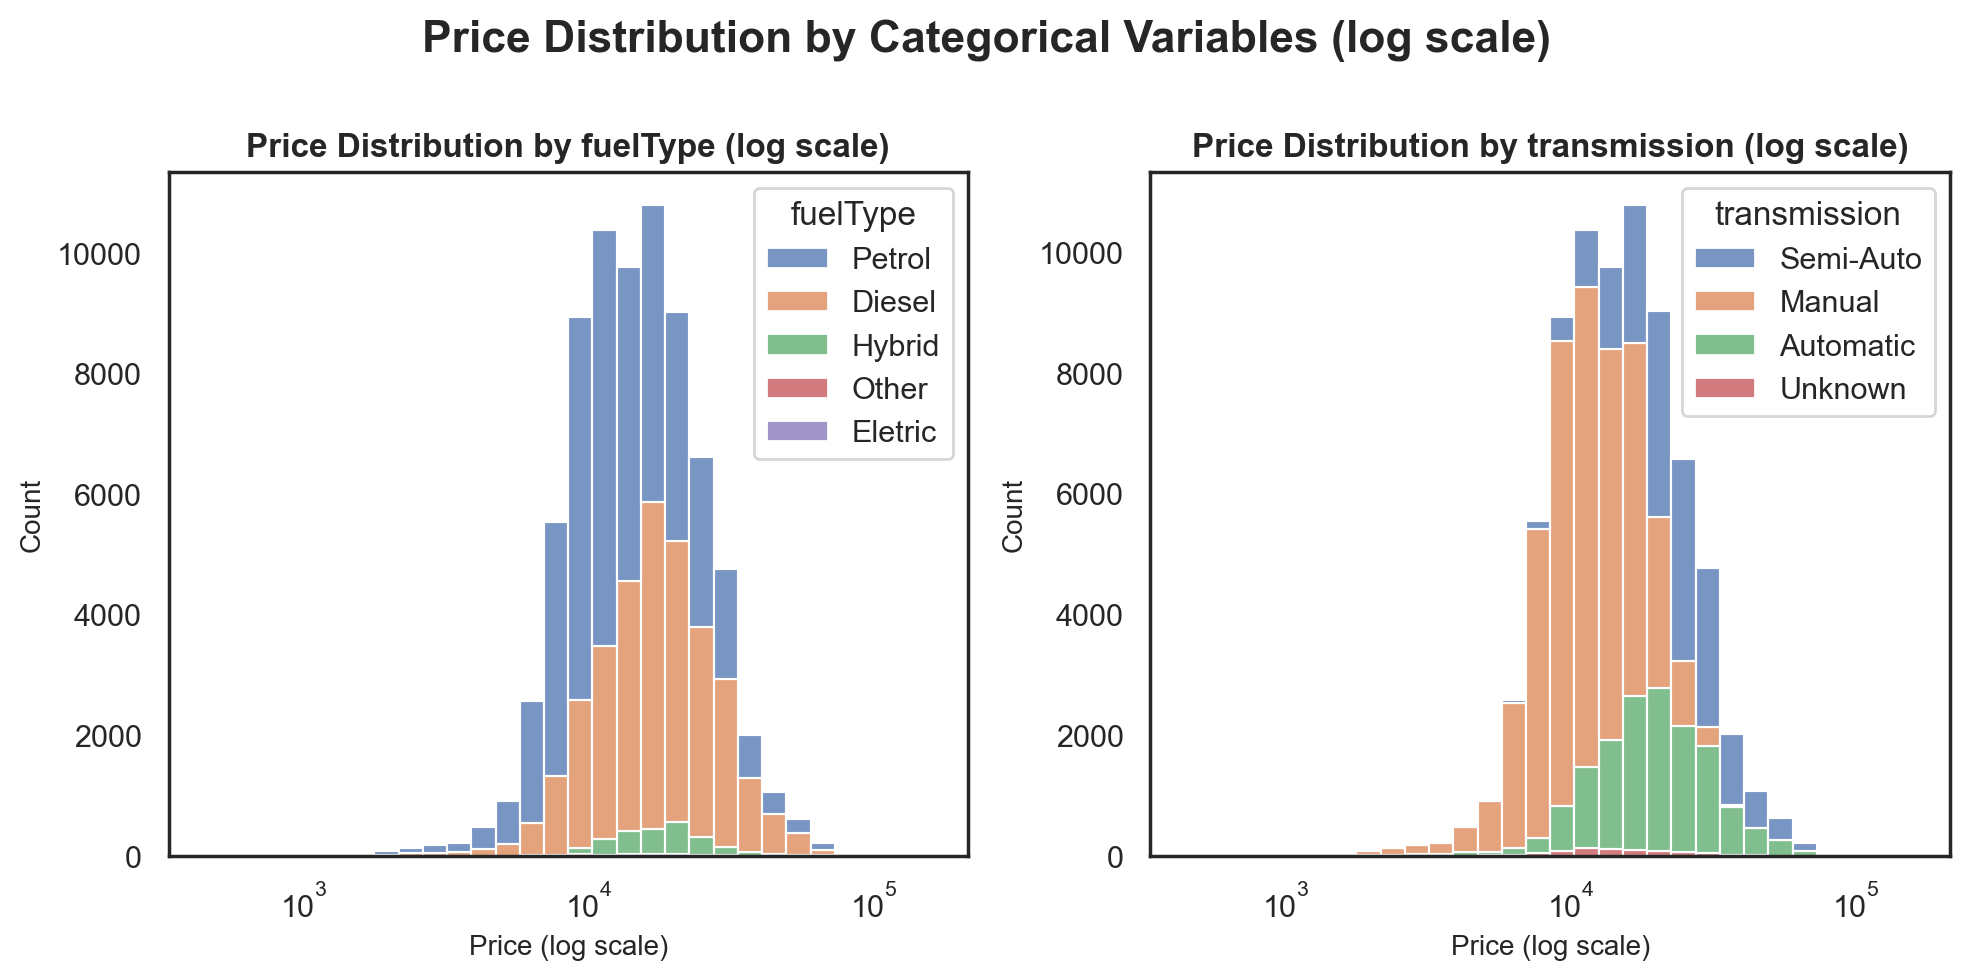

In [30]:
sns.set(style="white")
categorical_vars = ['fuelType', 'transmission']

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

for ax, cat_var in zip(axes, categorical_vars):
    sns.histplot(
        data=df, 
        x='price', 
        ax=ax, 
        bins=30, 
        hue=cat_var,
        multiple="stack",
        log_scale=True  
    )
    ax.set_title(f"Price Distribution by {cat_var} (log scale)", fontsize=12, fontweight="bold")
    ax.set_xlabel("Price (log scale)", fontsize=10)
    ax.set_ylabel("Count", fontsize=10)

plt.suptitle("Price Distribution by Categorical Variables (log scale)", fontsize=16, fontweight="bold")
plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.show()

## 6.2 Other Multivariable Analysis

### 6.2.1 Mileage vs Price vs Year

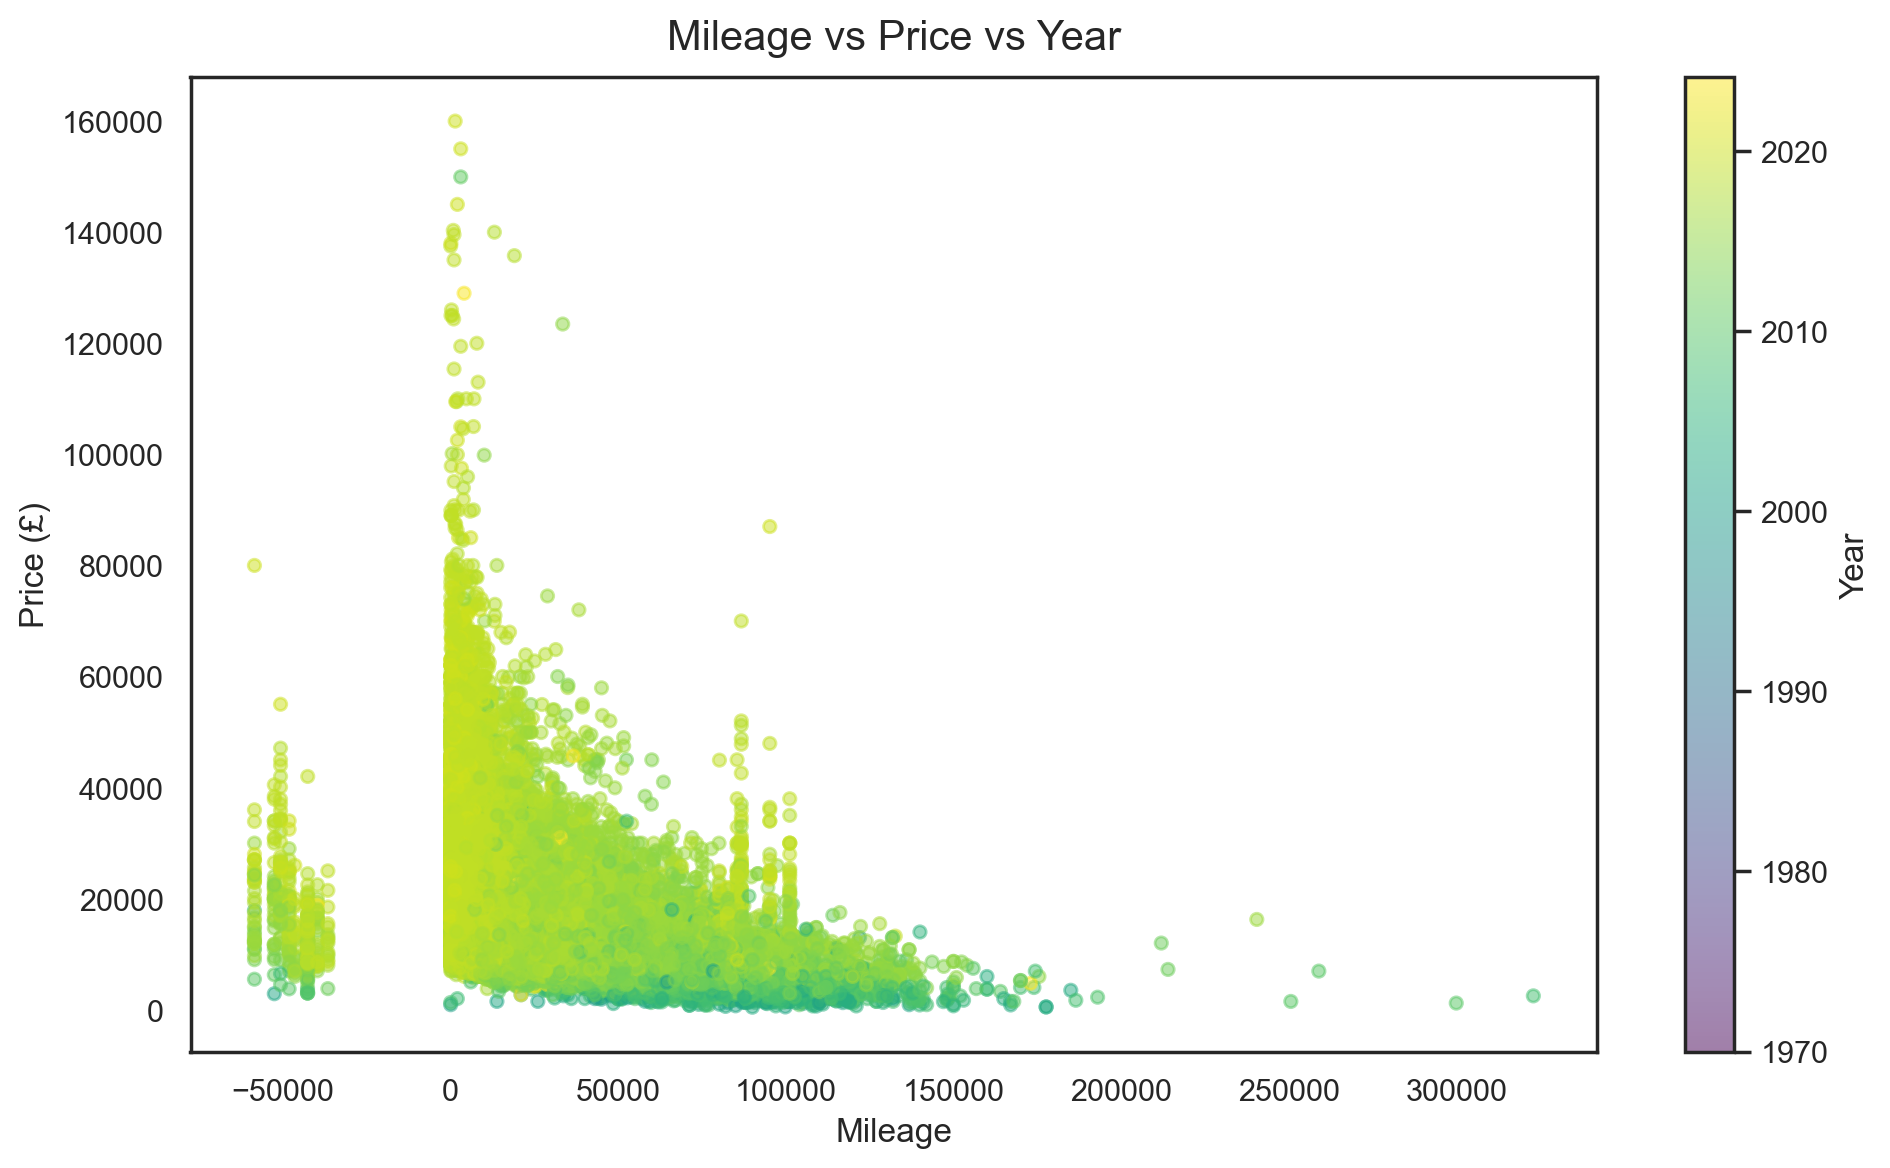

In [31]:
data = df.dropna(subset=["mileage", "price", "year"])

plt.figure(figsize=(10, 6))
sc = plt.scatter(data["mileage"], data["price"],
                 c=data["year"], cmap="viridis", alpha=0.5, s=20)

plt.colorbar(sc, label="Year")
plt.title("Mileage vs Price vs Year", fontsize=15, pad=10)
plt.xlabel("Mileage")
plt.ylabel("Price (£)")
plt.tight_layout()
plt.show()


- The plot confirms a clear inverse relationship between mileage and price, as expected -> cars with higher mileage tend to be cheaper.

- However, there is an unusual concentration of vehicles from around 2020 (light yellow tones) showing extremely low mileage, which is unexpected for cars that "new".

- Older cars (darker tones) follow the typical trend of higher mileage and lower price, matching natural depreciation.

Overall, while the relationships between year, mileage, and price are consistent with expectations, the large cluster of 2020 cars with unrealistically low mileage is anomalous and should be further investigated before drawing conclusions.

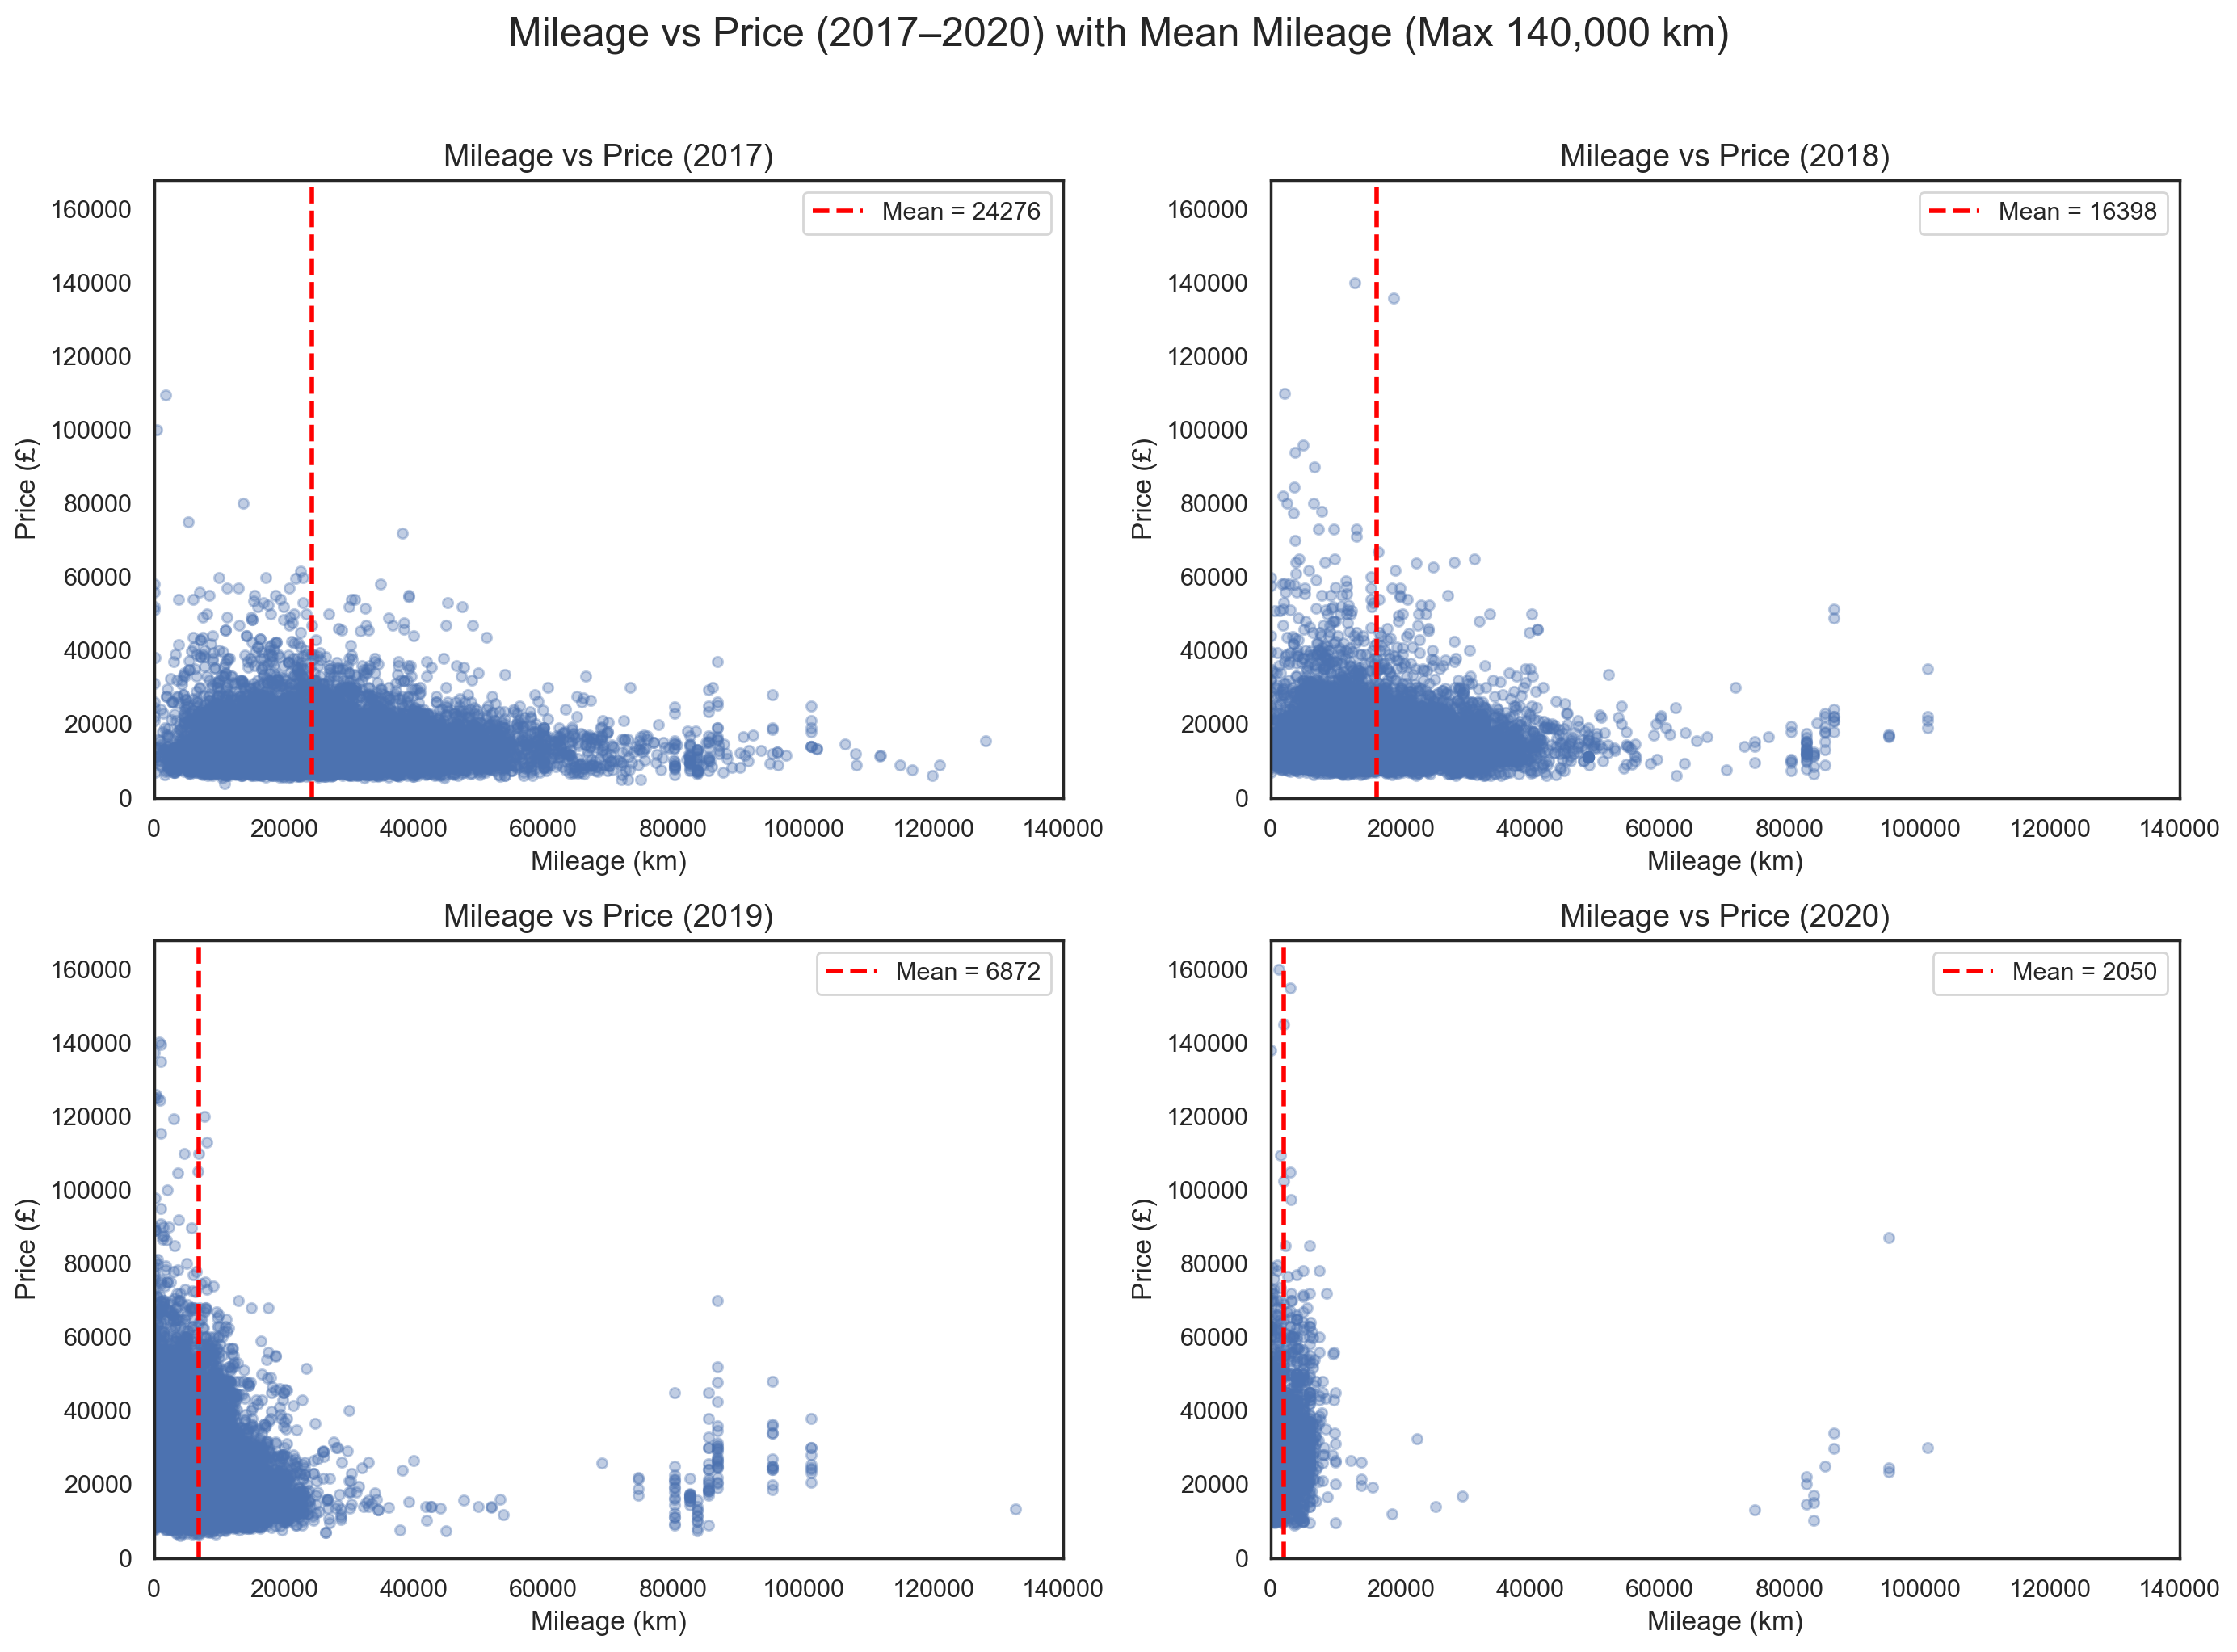

In [32]:
years = [2017, 2018, 2019, 2020]

fig, axes = plt.subplots(2, 2, figsize=(14, 10), tight_layout=True)
axes = axes.flatten()

for i, year in enumerate(years):
    df_year = df[df["year"] == year].dropna(subset=["mileage", "price"])
    
    axes[i].scatter(df_year["mileage"], df_year["price"], alpha=0.35, s=20)
    
    mean_mileage = df_year["mileage"].mean()
    axes[i].axvline(mean_mileage, color="red", linestyle="--", linewidth=2, label=f"Mean = {mean_mileage:.0f}")
    
    axes[i].set_title(f"Mileage vs Price ({year})", fontsize=14)
    axes[i].set_xlabel("Mileage (km)")
    axes[i].set_ylabel("Price (£)")
    axes[i].legend()
    
    axes[i].set_xlim(0, 140000)
    axes[i].set_ylim(0, df["price"].max() * 1.05)

for j in range(len(years), len(axes)):
    axes[j].axis("off")

plt.suptitle("Mileage vs Price (2017–2020) with Mean Mileage (Max 140,000 km)", fontsize=18, y=1.02)
plt.tight_layout()
plt.show()


- The charts reveal a steady decline in average mileage from 2017 to 2020, which follows the expected trend of newer cars having lower mileage.

- However, the extremely low mileage values for 2020 vehicles appear unusually concentrated near zero, which we consider strange for cars that should have already accumulated some distance.

Since the data still respects the logical relationship between age and mileage, with older cars showing higher usage, we chose not to alter or remove these records at this stage.